# DESCRIPTIVE STATISTICS:

### This code will begin similar to the one for the main model, but will not feature a train test split or a model building; wrangling will continue until one step before model building and then will focus on the dataframe's descriptive statistics
### These steps as they are present here would induce data leakage if they were to feed a model

Data ingestion<br>

Data wrangling and feature engineering
- Outlier removal<br>
- Tokenization and cleanup of job titles<br>
- Creation of dummies for all categorical variables<br>
- Feature selection and database cleanup<br>
- Independent variable normalization<br>

### Data description
- Categorical entries' volumes<br>
- Dummies' impacts charts and tables<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from scipy.stats import boxcox, normaltest, kstest

In [2]:
sns.set() # makes all charts look better by default

## Data Ingestion

In [3]:
aijobs = pd.read_csv(r'https://ai-jobs.net/salaries/download/salaries.csv')
# Last accessed at 2024-03-23

In [4]:
aijobs # first look at the data

work_year experience_level employment_type                   job_title  \
0           2024               SE              FT  Machine Learning Scientist   
1           2024               SE              FT  Machine Learning Scientist   
2           2024               MI              FT              Data Scientist   
3           2024               MI              FT              Data Scientist   
4           2024               EN              FT                Data Science   
...          ...              ...             ...                         ...   
14709       2020               SE              FT              Data Scientist   
14710       2021               MI              FT    Principal Data Scientist   
14711       2020               EN              FT              Data Scientist   
14712       2020               EN              CT       Business Data Analyst   
14713       2021               SE              FT        Data Science Manager   

        salary salary_currency  salary_in_usd employee_residence  \
0       196350             USD         196350                 US   
1       127500             USD         127500                 US   
2       116259             USD         116259                 AU   
3        88995             USD          88995                 AU   
4        46080             USD          46080                 US   
...        ...             ...            ...                ...   
14709   412000             USD         412000                 US   
14710   151000             USD         151000                 US   
14711   105000             USD         105000                 US   
14712   100000             USD         100000                 US   
14713  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
0               100               US            M  
1               100               US            M  
2                 0               AU            M  
3                 0               AU            M  
4                 0               US            M  
...             ...              ...          ...  
14709           100               US            L  
14710           100               US            L  
14711           100               US            S  
14712           100               US            L  
14713            50               IN            L  

[14714 rows x 11 columns]

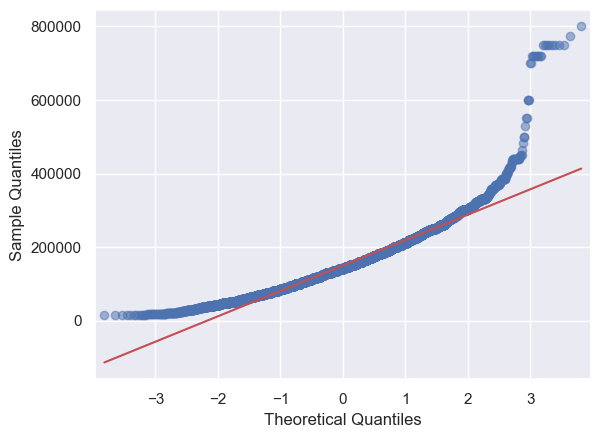

In [5]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

# Common data wrangling
These steps would be equally done for train and test bases with no population or sampled information, only individual ones, so no data leakage will occur if done now.

### Outlier removal

In [6]:
# The first outliers are extremely out of touch with the remainder of the database.
# They will skew the results too much and must be removed.
# According to Hair, from 2.5 to 4 standards deviations might be used to remove outliers.
# Visually, 4 deviations cover the worst cases.

mean = aijobs['salary_in_usd'].mean()
std = mean = aijobs['salary_in_usd'].std()
outmax = mean + 4 * std
print(outmax)
outliers = aijobs[aijobs['salary_in_usd'] > outmax].index
print(outliers)

aijobs.drop(outliers, inplace=True)
aijobs.reset_index(drop=True, inplace=True)
aijobs.sort_values('salary_in_usd', ascending=False).head()

345502.2452106102
Index([   66,    70,   233,   323,   341,   368,   370,   482,   506,   530,
       ...
       13008, 13351, 13366, 13545, 14439, 14444, 14496, 14641, 14706, 14709],
      dtype='int64', length=140)


work_year experience_level employment_type                  job_title  \
1831       2024               SE              FT  Machine Learning Engineer   
914        2024               SE              FT         Analytics Engineer   
2360       2024               SE              FT  Machine Learning Engineer   
9825       2023               SE              FT         Research Scientist   
499        2024               SE              FT         Research Scientist   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1831  345400             USD         345400                 US             0   
914   345400             USD         345400                 US             0   
2360  345400             USD         345400                 US             0   
9825  345000             USD         345000                 US             0   
499   345000             USD         345000                 US             0   

     company_location company_size  
1831               US            M  
914                US            M  
2360               US            M  
9825               US            M  
499                US            M

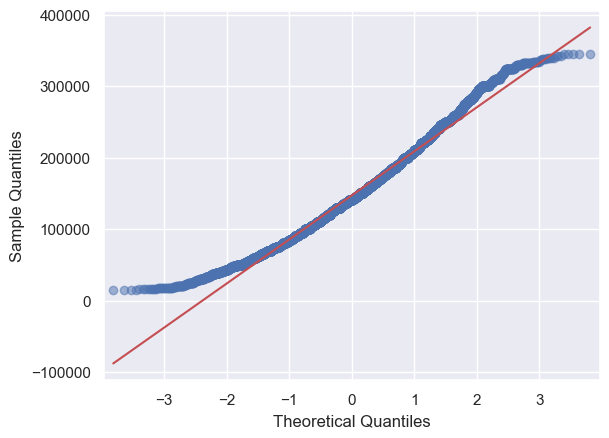

In [7]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

## Feature Engineering

In [8]:
# There is no value in local currency salaries as they're not scaled.
# Salary in USD conveys the same useful information in a scaled manner.
aijobs.drop('salary', axis=1, inplace=True)

In [9]:
# An interesting variable to research
aijobs['work_abroad'] = aijobs['employee_residence'] != aijobs['company_location']
aijobs['work_abroad'] = aijobs['work_abroad'].astype(int)
aijobs.tail(10)

work_year experience_level employment_type                  job_title  \
14564       2020               MI              FT              Data Engineer   
14565       2020               SE              FT  Machine Learning Engineer   
14566       2021               SE              FT   Director of Data Science   
14567       2021               MI              FT             Data Scientist   
14568       2021               MI              FT              Data Engineer   
14569       2021               SE              FT            Data Specialist   
14570       2021               MI              FT   Principal Data Scientist   
14571       2020               EN              FT             Data Scientist   
14572       2020               EN              CT      Business Data Analyst   
14573       2021               SE              FT       Data Science Manager   

      salary_currency  salary_in_usd employee_residence  remote_ratio  \
14564             USD         130800                 ES           100   
14565             EUR          45618                 HR           100   
14566             USD         168000                 JP             0   
14567             SGD         119059                 SG           100   
14568             EUR          28369                 MT            50   
14569             USD         165000                 US           100   
14570             USD         151000                 US           100   
14571             USD         105000                 US           100   
14572             USD         100000                 US           100   
14573             INR          94665                 IN            50   

      company_location company_size  work_abroad  
14564               US            M            1  
14565               HR            S            0  
14566               JP            S            0  
14567               IL            M            1  
14568               MT            L            0  
14569               US            L            0  
14570               US            L            0  
14571               US            S            0  
14572               US            L            0  
14573               IN            L            0

In [10]:
# remote_ratio is categorical; the correct way to interpret those numbers is:
#   0 == On Site (less than 20% remote)
#  50 == Partially remote/hybird
# 100 == Fully remote (more than 80% remote)
# therefore using it as numerical would be creating a spurious relationship.
# It has to be dummified and will be switched for easier interpretation.

aijobs.loc[aijobs['remote_ratio'] == 0, 'remote_ratio'] = 'On_Site'
aijobs.loc[aijobs['remote_ratio'] == 50, 'remote_ratio'] = 'Hybrid'
aijobs.loc[aijobs['remote_ratio'] == 100, 'remote_ratio'] = 'Remote'

aijobs['remote_ratio']

0         Remote
1         Remote
2        On_Site
3        On_Site
4        On_Site
          ...   
14569     Remote
14570     Remote
14571     Remote
14572     Remote
14573     Hybrid
Name: remote_ratio, Length: 14574, dtype: object

In [11]:
# Categorical columns will receive appropriate treatment
categorical_columns = ['experience_level', 'employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 
                       'company_location', 'company_size']

In [12]:
# Quick look at job titles. This will receive a quick NLP method for processing.
print(len(aijobs.job_title.unique()), "different job titles \n")
print(aijobs.job_title.unique())

149 different job titles 

['Machine Learning Scientist' 'Data Scientist' 'Data Science'
 'Business Intelligence Analyst' 'Data Architect' 'Data Engineer'
 'Business Intelligence Engineer' 'Analytics Engineer' 'Data Analyst'
 'Data Science Consultant' 'Data Manager' 'Machine Learning Engineer'
 'Applied Scientist' 'BI Analyst' 'Data Integration Engineer'
 'ML Engineer' 'Research Engineer' 'Data Integration Specialist'
 'Machine Learning Operations Engineer'
 'Machine Learning Infrastructure Engineer' 'Research Scientist'
 'Data Developer' 'Business Intelligence' 'AI Engineer' 'CRM Data Analyst'
 'ETL Developer' 'Business Intelligence Manager' 'Data Science Engineer'
 'Data Analytics Manager' 'Data Specialist' 'AI Architect'
 'Robotics Engineer' 'Research Analyst' 'BI Developer' 'Head of Data'
 'Data Science Manager' 'Data Modeler' 'Cloud Database Engineer'
 'Data Operations Analyst' 'Data Science Analyst'
 'Data Science Practitioner' 'Data Management Analyst' 'BI Data Analyst'
 'Applie

In [13]:
# Work on the terms contained in job titles.
terms = []
for title in aijobs.job_title.unique():
    for word in title.split():
        terms.append(word)
terms = sorted(set(terms))
print(len(terms), "different terms in these titles \n")
print(terms)

78 different terms in these titles 

['&', 'AI', 'AWS', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Autonomous', 'Azure', 'BI', 'Big', 'Biologist', 'Business', 'CRM', 'Cloud', 'Compliance', 'Computational', 'Computer', 'Consultant', 'Data', 'Database', 'Decision', 'Deep', 'DevOps', 'Developer', 'Director', 'ETL', 'Engineer', 'Finance', 'Financial', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Intelligence', 'Lead', 'Learning', 'ML', 'MLOps', 'Machine', 'Management', 'Manager', 'Managing', 'Marketing', 'Modeler', 'Modeller', 'NLP', 'Operations', 'Ops', 'Owner', 'Pipeline', 'Power', 'Practitioner', 'Principal', 'Product', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Research', 'Researcher', 'Robotics', 'Sales', 'Science', 'Scientist', 'Software', 'Specialist', 'Staff', 'Strategist', 'Strategy', 'Technician', 'Vehicle', 'Vision', 'Visualization', 'of']


In [14]:
stop_words = ['&', 'of', 'Data', 'Learning', 'Consultant', 'Computational', 'Computer', 'Managing', 'Power', 'Sales', 'Tech', 'Technician', 
              'Vehicle', 'Autonomous', 'Compliance', 'DevOps', 'Marketing']
# Justification: '&', 'of' and 'Data' are too generic for this project.
# 'Learning' has two contexts: Machine Learning and Deep Learning, yet both "Machine" and "Deep" are unique to them,
# so there's nothing to be gained from adding it.
# "Autonomous Vehicle Technician" is a job title whose words are all unique, so a single one is enough.
# "Computational Biologist" shares the same issue.
# "Computer Vision" is present in more than one job, but all of them use this same sequence, so it's the same situation.
# All other ones present themselves only at most in a couple of entries and therefore are prone to overfitting.

In [15]:
synonym_terms = ['ML','Machine','MLOps', 'Operations','Business','BI','Intelligence','AWS','Cloud','Azure','Modeller','Modeler',
                 'Engineering','Engineer','Financial','Finance','Researcher','Research','Science','Scientist',
                 'Strategy','Strategist','Management','Manager']

In [16]:
# this uses the same pressupositions as above, but some words will mean the same thing.
synonyms = {'Machine': 'Machine|ML|MLOps',      # ML is short for Machine Learning
            'Operations':'MLOps|Operations',    # Ops is short for Operations
            'Intelligence':'Intelligence|BI',   # BI is short for Business Intelligence (Intelligence is exclusive to BI)
            'Business':'Business|BI',           # For consistency (Business is not exclusive to BI)
            'Cloud':'Cloud|AWS|Azure',          # There is a single instance for AWS and for Azure; both specific cloud tools
            'Modeler':'Modeler|Modeller',       # Typo
            'Engineer':'Engineer|Engineering',
            'Finance':'Finance|Financial',
            'Research':'Research|Researcher',
            'Scientist':'Scientist|Science',
            'Strategist':'Strategist|Strategy',
            'Manager':'Management|Manager'}

In [17]:
clean_terms = terms.copy()                                                   # copy method to keep the original list
[clean_terms.remove(term) for term in stop_words if term in clean_terms]     # remove stop words
[clean_terms.remove(term) for term in synonym_terms if term in clean_terms]  # synonyms will be processed differently
print(len(clean_terms), "terms after cleaning \n\n", clean_terms)

39 terms after cleaning 

 ['AI', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Big', 'Biologist', 'CRM', 'Database', 'Decision', 'Deep', 'Developer', 'Director', 'ETL', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Lead', 'NLP', 'Ops', 'Owner', 'Pipeline', 'Practitioner', 'Principal', 'Product', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Robotics', 'Software', 'Specialist', 'Staff', 'Vision', 'Visualization']


In [18]:
# dummization for all chosen job keywords
for job_string in clean_terms:
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(job_string, case=False).astype(int)
for job_string in synonyms.keys():
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(f'{synonyms[job_string]}', case=False).astype(int)
aijobs

work_year experience_level employment_type                   job_title  \
0           2024               SE              FT  Machine Learning Scientist   
1           2024               SE              FT  Machine Learning Scientist   
2           2024               MI              FT              Data Scientist   
3           2024               MI              FT              Data Scientist   
4           2024               EN              FT                Data Science   
...          ...              ...             ...                         ...   
14569       2021               SE              FT             Data Specialist   
14570       2021               MI              FT    Principal Data Scientist   
14571       2020               EN              FT              Data Scientist   
14572       2020               EN              CT       Business Data Analyst   
14573       2021               SE              FT        Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 USD         196350                 US       Remote   
1                 USD         127500                 US       Remote   
2                 USD         116259                 AU      On_Site   
3                 USD          88995                 AU      On_Site   
4                 USD          46080                 US      On_Site   
...               ...            ...                ...          ...   
14569             USD         165000                 US       Remote   
14570             USD         151000                 US       Remote   
14571             USD         105000                 US       Remote   
14572             USD         100000                 US       Remote   
14573             INR          94665                 IN       Hybrid   

      company_location company_size  ...  job_name_Intelligence  \
0                   US            M  ...                      0   
1                   US            M  ...                      0   
2                   AU            M  ...                      0   
3                   AU            M  ...                      0   
4                   US            M  ...                      0   
...                ...          ...  ...                    ...   
14569               US            L  ...                      0   
14570               US            L  ...                      0   
14571               US            S  ...                      0   
14572               US            L  ...                      0   
14573               IN            L  ...                      0   

       job_name_Business  job_name_Cloud  job_name_Modeler  job_name_Engineer  \
0                      0               0                 0                  0   
1                      0               0                 0                  0   
2                      0               0                 0                  0   
3                      0               0                 0                  0   
4                      0               0                 0                  0   
...                  ...             ...               ...                ...   
14569                  0               0                 0                  0   
14570                  0               0                 0                  0   
14571                  0               0                 0                  0   
14572                  1               0                 0                  0   
14573                  0               0                 0                  0   

       job_name_Finance  job_name_Research  job_name_Scientist  \
0                     0                  0                   1   
1                     0                  0                   1   
2                     0                  0                   1   
3                     0                  0                   1   
4                     0                  0                   

In [19]:
df_dummies = pd.get_dummies(aijobs[categorical_columns], dtype=int)
aijobs = pd.concat([aijobs, df_dummies], axis=1)

aijobs

work_year experience_level employment_type                   job_title  \
0           2024               SE              FT  Machine Learning Scientist   
1           2024               SE              FT  Machine Learning Scientist   
2           2024               MI              FT              Data Scientist   
3           2024               MI              FT              Data Scientist   
4           2024               EN              FT                Data Science   
...          ...              ...             ...                         ...   
14569       2021               SE              FT             Data Specialist   
14570       2021               MI              FT    Principal Data Scientist   
14571       2020               EN              FT              Data Scientist   
14572       2020               EN              CT       Business Data Analyst   
14573       2021               SE              FT        Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 USD         196350                 US       Remote   
1                 USD         127500                 US       Remote   
2                 USD         116259                 AU      On_Site   
3                 USD          88995                 AU      On_Site   
4                 USD          46080                 US      On_Site   
...               ...            ...                ...          ...   
14569             USD         165000                 US       Remote   
14570             USD         151000                 US       Remote   
14571             USD         105000                 US       Remote   
14572             USD         100000                 US       Remote   
14573             INR          94665                 IN       Hybrid   

      company_location company_size  ...  company_location_SI  \
0                   US            M  ...                    0   
1                   US            M  ...                    0   
2                   AU            M  ...                    0   
3                   AU            M  ...                    0   
4                   US            M  ...                    0   
...                ...          ...  ...                  ...   
14569               US            L  ...                    0   
14570               US            L  ...                    0   
14571               US            S  ...                    0   
14572               US            L  ...                    0   
14573               IN            L  ...                    0   

       company_location_TH  company_location_TR  company_location_UA  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14569                    0                    0                    0   
14570                    0                    0                    0   
14571                    0                    0                    0   
14572                    0                    0                    0   
14573                    0                    0                    0   

       company_location_US  company_location_VN  company_location_ZA  \
0                        1                    0                    0   
1                        1                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        1                    0                    0   
...                    ...                  ...                  ...   
14569              

In [20]:
aijobs[categorical_columns].describe().loc['unique']

experience_level       4
employment_type        4
salary_currency       22
employee_residence    87
remote_ratio           3
company_location      77
company_size           3
Name: unique, dtype: object

In [21]:
# To establish the features, categorical columns that are not dummies will need to be removed. Target variable too.
# NOTE: COMPREHENSIVE DUMMIES WILL NOT HAVE AN INSTANCE REMOVED FOR STATISTICAL ANALYSIS
# AS THIS IS NOT FOR MODEL BUILDING, THERE IS NO INTERCEPT IMPLIED STANDARD FOR DUMMY VARIABLES

X_vars = aijobs.columns.tolist()
[X_vars.remove(col) for col in categorical_columns if col in X_vars]
X_vars.remove('job_title')
X_vars.remove('salary_in_usd')
X_vars

['work_year',
 'work_abroad',
 'job_name_AI',
 'job_name_Admin',
 'job_name_Analyst',
 'job_name_Analytics',
 'job_name_Applied',
 'job_name_Architect',
 'job_name_Associate',
 'job_name_Big',
 'job_name_Biologist',
 'job_name_CRM',
 'job_name_Database',
 'job_name_Decision',
 'job_name_Deep',
 'job_name_Developer',
 'job_name_Director',
 'job_name_ETL',
 'job_name_Head',
 'job_name_Infrastructure',
 'job_name_Insight',
 'job_name_Integration',
 'job_name_Lead',
 'job_name_NLP',
 'job_name_Ops',
 'job_name_Owner',
 'job_name_Pipeline',
 'job_name_Practitioner',
 'job_name_Principal',
 'job_name_Product',
 'job_name_Programmer',
 'job_name_Prompt',
 'job_name_Quality',
 'job_name_Quantitative',
 'job_name_Reporting',
 'job_name_Robotics',
 'job_name_Software',
 'job_name_Specialist',
 'job_name_Staff',
 'job_name_Vision',
 'job_name_Visualization',
 'job_name_Machine',
 'job_name_Operations',
 'job_name_Intelligence',
 'job_name_Business',
 'job_name_Cloud',
 'job_name_Modeler',
 'job_n

In [22]:
# Hair says 5 entries is a minimum threshold; any dummy with less than 5 examples is too prone to overfitting.
# They would be excluded from any model anyway, so they will not be part of the statistical analysis.
# This was adapted from a function created for the built models.

def del_vars(X_train, printing=False):
    """
    This function deletes all columns in training base that have too few instances and will result in overfitting
    It also deletes every row that had an instance in such columns in order to prevent assumptions implied in the intecept
    """
    
    if printing == True:
        print("Before:", X_train.shape)
    deletions = 1 #just to enter the loop
    train_dropped = []
    while deletions > 0:
        deletions = X_train.shape[0] # store the dataframe size for later comparison
        X_sum = X_train.sum()
        exclusion_list = X_sum[X_sum < 5].index # create the exclusion column list

        # deleting all rows with any positive value in those variables
        X_delete = X_train[exclusion_list].sum(axis=1)
        rows_to_delete = X_delete[X_delete != 0]
        X_train.drop(rows_to_delete.index, inplace=True)
        
        [train_dropped.append(item) for item in rows_to_delete.index] # list all deleted rows for later consistency wity y array
        deletions = deletions - X_train.shape[0] # difference from previous dataframe size
        if printing == True:
            print('Rows deleted:', deletions) # deleted rows in this loop
            print('Columns dropped:', len(exclusion_list)) # cumulative columns to be deleted
        # loop until there are no more deleted rows
        
    X_train.drop(exclusion_list, axis=1, inplace=True) # dropping columns from train base now
    
    if printing == True:
        print("After:", X_train.shape)

In [23]:
new_X = aijobs[X_vars + ['salary_in_usd']].copy()

In [24]:
del_vars(new_X, printing=True)

Before: (14574, 254)
Rows deleted: 145
Columns dropped: 107
Rows deleted: 33
Columns dropped: 122
Rows deleted: 9
Columns dropped: 126
Rows deleted: 0
Columns dropped: 126
After: (14387, 128)


In [25]:
new_X

work_year  work_abroad  job_name_AI  job_name_Analyst  \
0           2024            0            0                 0   
1           2024            0            0                 0   
2           2024            0            0                 0   
3           2024            0            0                 0   
4           2024            0            0                 0   
...          ...          ...          ...               ...   
14569       2021            0            0                 0   
14570       2021            0            0                 0   
14571       2020            0            0                 0   
14572       2020            0            0                 1   
14573       2021            0            0                 0   

       job_name_Analytics  job_name_Applied  job_name_Architect  \
0                       0                 0                   0   
1                       0                 0                   0   
2                       0                 0                   0   
3                       0                 0                   0   
4                       0                 0                   0   
...                   ...               ...                 ...   
14569                   0                 0                   0   
14570                   0                 0                   0   
14571                   0                 0                   0   
14572                   0                 0                   0   
14573                   0                 0                   0   

       job_name_Associate  job_name_Big  job_name_Database  ...  \
0                       0             0                  0  ...   
1                       0             0                  0  ...   
2                       0             0                  0  ...   
3                       0             0                  0  ...   
4                       0             0                  0  ...   
...                   ...           ...                ...  ...   
14569                   0             0                  0  ...   
14570                   0             0                  0  ...   
14571                   0             0                  0  ...   
14572                   0             0                  0  ...   
14573                   0             0                  0  ...   

       company_location_PL  company_location_PT  company_location_SI  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14569                    0                    0                    0   
14570                    0                    0                    0   
14571                    0                    0                    0   
14572                    0                    0                    0   
14573                    0                    0                    0   

       company_location_UA  company_location_US  company_location_ZA  \
0                        0                    1                    0   
1                        0                    1                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    1                    0   
...                    ...                  ...                  ...   
14569                    0                    1                    0   
14570                    0                    1                    0   
14571                    0                    1                    0   
14572                    0                 

## Box-Cox transformation

Best Lambda Value: 0.5348


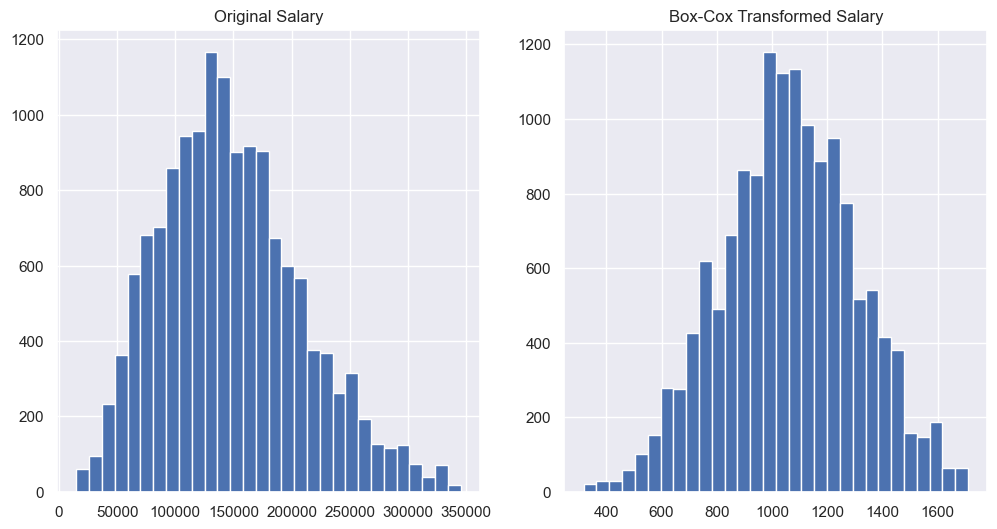

Normal test: NormaltestResult(statistic=44.35785712222913, pvalue=2.332457350829253e-10)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=318.074462441551, statistic_sign=-1)


In [26]:
# fit the lambda and transform the train dependent variable
new_X['transformed_salary'], lmbda = boxcox(new_X['salary_in_usd'])
print(f'Best Lambda Value: {lmbda:.4f}')

# plot

plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.hist(new_X['salary_in_usd'], bins=30)
plt.title('Original Salary')

# Transformed
plt.subplot(1, 2, 2)
plt.hist(new_X['transformed_salary'], bins=30)
plt.title('Box-Cox Transformed Salary')

plt.show()

print('Normal test:', normaltest(new_X['transformed_salary']))
print('Kolmogorov-Smirnov test:', kstest(new_X['transformed_salary'], "norm"))

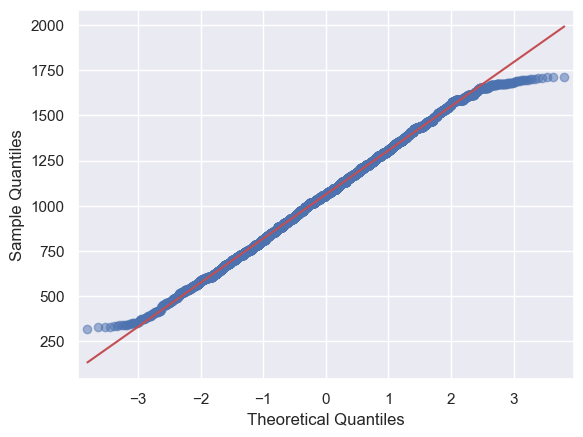

In [27]:
qqplot(new_X['transformed_salary'], line='s', alpha=0.5)
plt.show()

# DATA DESCRIPTION

In [28]:
pd.set_option('display.max_rows', None)

work_year
2023    8458
2024    4182
2022    1645
2021     216
2020      73
Name: count, dtype: int64


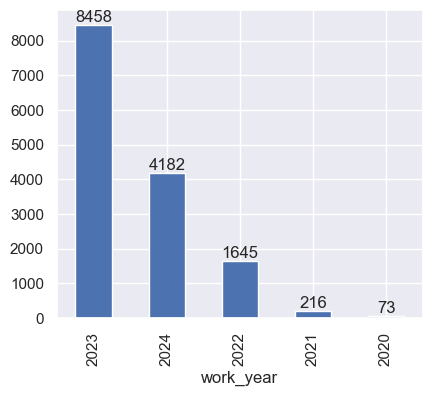

experience_level
SE    9532
MI    3479
EN    1140
EX     423
Name: count, dtype: int64


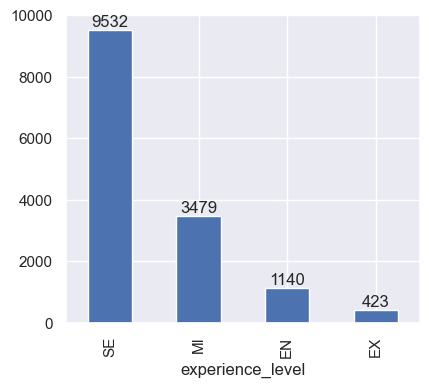

employment_type
FT    14511
PT       25
CT       25
FL       13
Name: count, dtype: int64


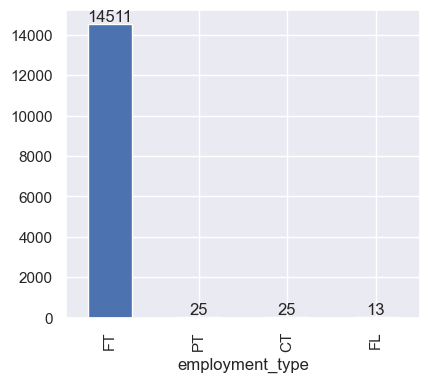

salary_currency
USD    13431
GBP      557
EUR      423
INR       53
CAD       51
AUD       12
CHF        7
PLN        7
SGD        6
JPY        4
BRL        4
DKK        3
HUF        3
TRY        3
NOK        2
THB        2
ZAR        1
HKD        1
PHP        1
NZD        1
MXN        1
CLP        1
Name: count, dtype: int64


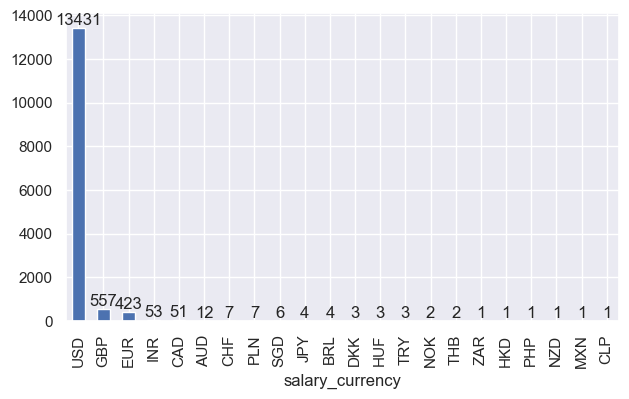

employee_residence
US    12685
GB      637
CA      381
ES      131
DE       90
IN       74
FR       65
AU       50
PT       30
NL       28
BR       23
IT       21
GR       17
CO       16
LT       16
PL       15
ZA       15
EG       14
LV       14
MX       13
IE       12
NG       12
AR       11
EE       11
UA       11
AT       10
PH        9
TR        8
JP        8
CH        7
BE        6
SI        6
VN        6
PK        6
RU        6
NZ        6
PR        5
AE        5
SG        5
HR        5
RO        5
TH        4
GH        4
HU        4
DK        3
FI        3
MT        3
UZ        3
SA        3
LB        2
SE        2
HK        2
NO        2
MD        2
BA        2
CF        2
CL        2
TN        2
KE        2
BO        2
KR        2
CZ        2
AM        2
ID        1
DO        1
RS        1
HN        1
DZ        1
IQ        1
BG        1
JE        1
MY        1
GE        1
CR        1
CN        1
AS        1
IR        1
CY        1
KW        1
PE        1
EC        1
AD       

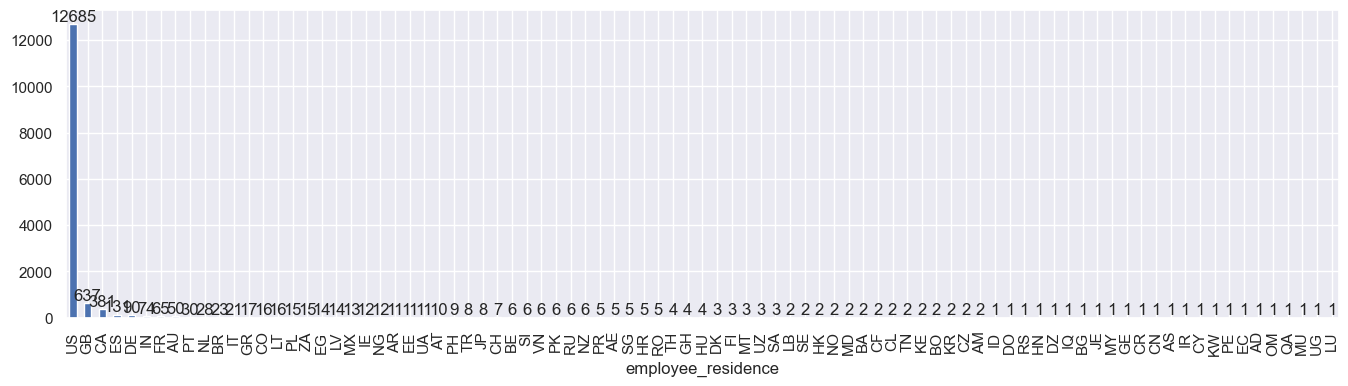

remote_ratio
On_Site    9644
Remote     4686
Hybrid      244
Name: count, dtype: int64


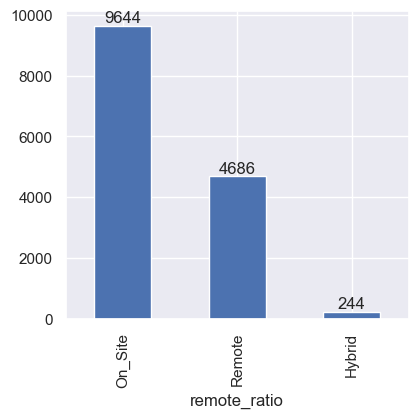

company_location
US    12734
GB      645
CA      383
ES      127
DE       97
FR       61
IN       59
AU       53
PT       28
NL       28
BR       21
CO       16
LT       16
ZA       15
LV       14
IT       14
MX       14
GR       14
PL       14
EG       13
EE       12
IE       12
AT       10
UA       10
NG        9
JP        8
CH        8
AR        7
RU        7
NZ        6
TR        6
PH        6
SI        6
DK        5
SG        5
AE        5
VN        4
PR        4
RO        4
BE        4
HU        4
FI        4
SA        3
CZ        3
SE        3
AS        3
TH        3
HR        3
LU        3
MT        3
GH        3
PK        2
ID        2
NO        2
CF        2
BA        2
IL        2
LB        2
KE        2
KR        2
CL        1
CN        1
IQ        1
DZ        1
HN        1
MY        1
OM        1
BS        1
GI        1
EC        1
IR        1
MU        1
AM        1
QA        1
AD        1
HK        1
MD        1
Name: count, dtype: int64


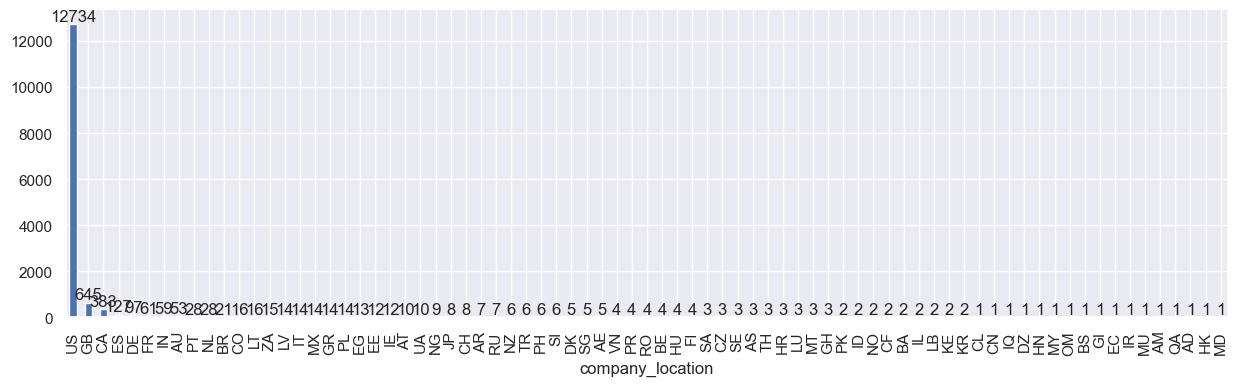

company_size
M    13424
L      971
S      179
Name: count, dtype: int64


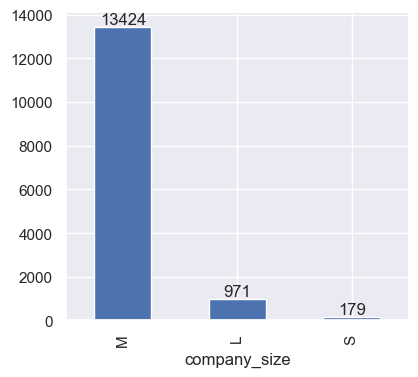

In [29]:
# Quick chart view of the raw base counts for all categorical columns. They're not present in the "new_X" dataframe.
for col in ['work_year'] + categorical_columns:
    group = aijobs[col].value_counts()
    print(group)
    ax = group.plot(kind='bar', figsize=(len(group)/7+4, 4))
    ax.bar_label(ax.containers[0])
    plt.show()

mean           std  count
work_year                                    
2023       151899.424568  61224.401227   8458
2024       146115.555476  62387.470092   4182
2022       133358.030395  55530.060875   1645
2021        96963.018519  59846.032207    216
2020        93244.041096  62758.863741     73

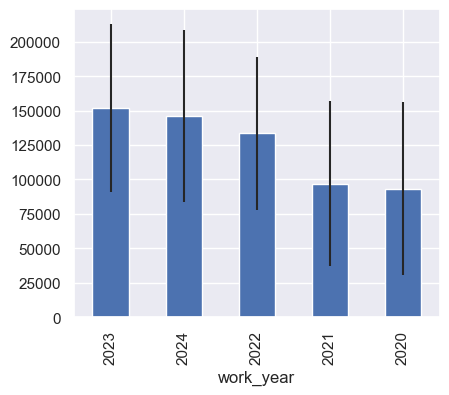

mean           std  count
experience_level                                    
SE                161293.620646  58293.771696   9532
MI                121307.393791  53837.918153   3479
EN                 90839.863158  47660.118366   1140
EX                188909.489362  63885.040971    423

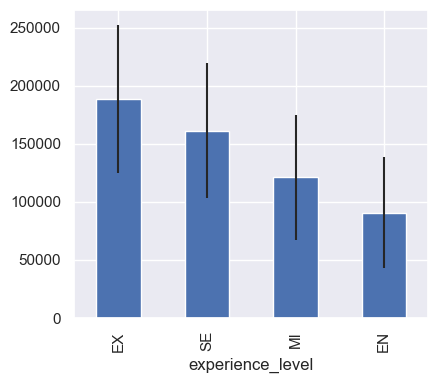

mean           std  count
employment_type                                    
FT               147351.800910  61468.409134  14511
CT                99847.800000  73737.839580     25
PT                62964.680000  42223.233108     25
FL                50236.769231  25715.401964     13

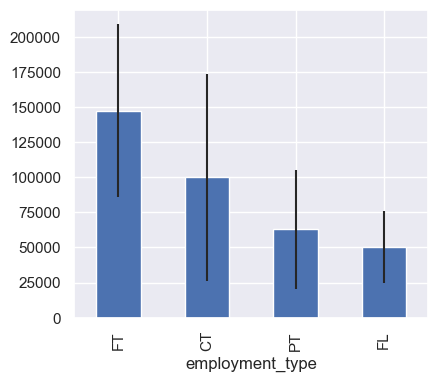

mean           std  count
salary_currency                                    
USD              153480.530713  58939.040829  13431
GBP               77514.438061  34430.879910    557
EUR               64242.827423  32825.973036    423
INR               34166.132075  19328.497632     53
CAD              110108.313725  52623.225644     51
AUD               78660.000000  26425.228393     12
CHF              137305.285714  85486.712402      7
PLN               36099.428571  10611.082962      7
SGD               81724.333333  20167.539718      6
BRL               26168.750000   8958.935330      4
JPY               56143.250000  17530.802765      4
DKK               31192.666667  13596.868475      3
TRY               22189.333333   5124.798370      3
HUF               29892.666667  10576.261170      3
NOK               88462.000000  16905.508925      2
THB               26957.000000   3314.916590      2
CLP               40038.000000           NaN      1
MXN               33511.000000           NaN      1
ZAR               34482.000000           NaN      1
HKD               65058.000000           NaN      1
NZD              125000.000000           NaN      1
PHP               15680.000000           NaN      1

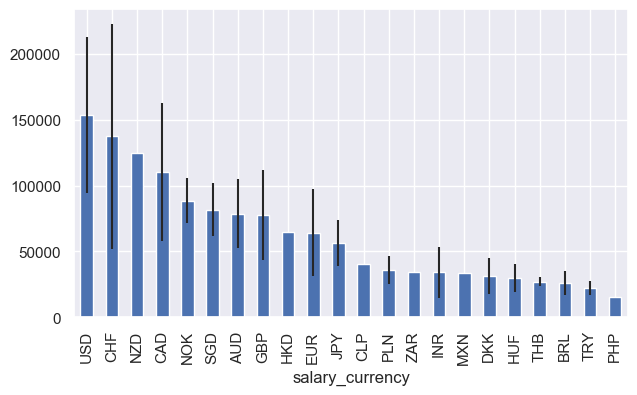

mean           std  count
employee_residence                                    
US                  154790.691368  58167.441772  12685
GB                   92755.142857  49947.697352    637
CA                  144464.472441  58514.556283    381
ES                   58715.763359  36634.980531    131
DE                   97797.688889  54469.243446     90
IN                   46953.837838  38285.993687     74
FR                   86244.538462  60449.184456     65
AU                  132666.760000  73636.422115     50
PT                   53920.966667  28464.722688     30
NL                   76752.964286  28581.497743     28
BR                   62594.565217  34877.168094     23
IT                   54867.666667  30538.948314     21
GR                   53866.235294  22454.590518     17
CO                   79115.250000  30019.544539     16
LT                   68553.062500  29287.497475     16
PL                   78104.266667  52873.394511     15
ZA                   55786.533333  23999.345401     15
LV                   54734.928571  19875.978577     14
EG                  135807.142857  70464.027531     14
MX                   84969.923077  71459.023786     13
IE                  104694.916667  33896.783252     12
NG                   52416.666667  49059.256069     12
EE                   43941.818182   8749.139716     11
AR                   62272.727273  18504.544896     11
UA                   98272.727273  71246.180121     11
AT                   68378.800000  15101.187082     10
PH                   53667.555556  31534.961452      9
TR                   34186.500000  27133.474781      8
JP                   95821.625000  78354.482667      8
CH                  137305.285714  85486.712402      7
VN                   56733.333333  17381.215915      6
PK                   38536.166667  15523.822602      6
SI                   56186.333333  28245.696958      6
BE                   95565.833333  61330.620765      6
RU                   79242.500000  77355.703329      6
NZ                  147681.666667  33334.636225      6
HR                   65702.200000  29349.702131      5
RO                   44338.000000  21513.207420      5
PR                  166000.000000  32672.618505      5
SG                   83092.600000  22234.453452      5
AE                   86000.000000  33800.887562      5
HU                   33169.500000  10840.760136      4
TH                   32228.500000  19447.737838      4
GH                   34250.000000  16977.926846      4
FI                   71900.000000   7808.233411      3
SA                  139999.333333  45824.884084      3
MT                   50423.000000  25803.230166      3
DK                   31192.666667  13596.868475      3
UZ                   82000.000000  36496.575182      3
CL                   72519.000000  45935.070719      2
KR                   47000.000000   9899.494937      2
CF                   49216.000000   8700.241836      2
SE                  105000.000000  35355.339059      2
TN                   90234.500000  84521.180662      2
NO                   88462.000000  16905.508925      2
CZ                   59999.500000  14141.428517      2
KE                   65000.000000  21213.203436      2
HK                   65540.000000    681.650937      2
AM                   33500.000000  23334.523779      2
BO                   75000.000000      0.000000      2
BA                   75000.000000  63639.610307      2
LB                   71750.000000  18738.329701      2
MD                   66500.000000  68589.357775      2
UG                   36000.000000           NaN      1
PE                   27000.000000           NaN      1
RS                   25532.000000           NaN      1
CR                   20000.000000           NaN      1
HN                   20000.000000           NaN      1
EC                   16000.000000           NaN      1
AS                   45555.000000           NaN      1
QA                  300000.000000           NaN      1
OM            

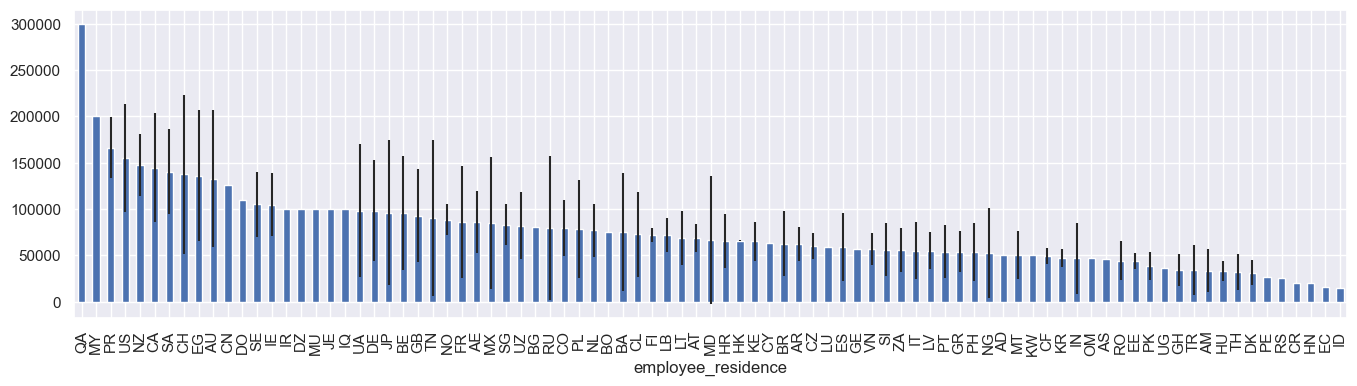

mean           std  count
remote_ratio                                    
On_Site       150469.718063  62320.075278   9644
Remote        143523.585787  58382.362642   4686
Hybrid         78950.364754  51242.922551    244

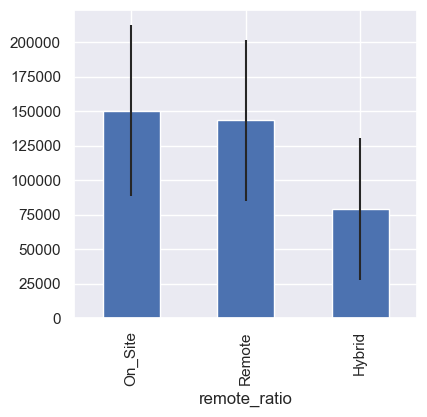

mean           std  count
company_location                                    
US                154504.586854  58343.141584  12734
GB                 92455.894574  49787.103678    645
CA                143979.597911  59275.940601    383
ES                 56817.149606  34411.411212    127
DE                 92426.824742  54676.325682     97
FR                 86310.508197  54807.149935     61
IN                 41995.423729  33807.618394     59
AU                130126.471698  73633.728412     53
PT                 50253.892857  22858.564127     28
NL                 76171.821429  30171.183921     28
BR                 56175.000000  27394.121950     21
CO                 79115.250000  30019.544539     16
LT                 68553.062500  29287.497475     16
ZA                 55786.533333  23999.345401     15
PL                 83083.357143  56366.124953     14
MX                 83186.357143  68979.186671     14
GR                 52260.857143  21279.818413     14
IT                 49600.428571  18169.006051     14
LV                 54734.928571  19875.978577     14
EG                140869.230769  70642.071796     13
EE                 45588.416667  10105.643270     12
IE                104694.916667  33896.783252     12
AT                 68479.300000  15045.888756     10
UA                105600.000000  70596.191273     10
NG                 60444.444444  54127.421680      9
JP                110821.625000  77624.356154      8
CH                123182.375000  88654.576852      8
RU                 78207.857143  74889.345696      7
AR                 69571.428571  17299.876135      7
PH                 49046.666667  29893.040439      6
SI                 56186.333333  28245.696958      6
TR                 23094.666667   4085.214495      6
NZ                147681.666667  33334.636225      6
AE                 86000.000000  33800.887562      5
SG                 62783.000000  27029.838836      5
DK                 49402.600000  28025.534202      5
VN                 63000.000000  18000.000000      4
HU                 39938.000000  18882.157310      4
RO                 44713.000000  15318.661865      4
PR                167500.000000  37527.767497      4
FI                 70833.750000   6722.590938      4
BE                 76864.750000  16763.859488      4
AS                 31684.333333  16480.592718      3
SE                 98791.333333  27214.750143      3
SA                139999.333333  45824.884084      3
LU                 47609.333333  23115.488516      3
TH                 22971.333333   7290.469967      3
GH                 27000.000000  10816.653826      3
MT                 50423.000000  25803.230166      3
HR                 76726.000000  32655.852217      3
CZ                 69478.666667  38752.120075      3
NO                 88462.000000  16905.508925      2
ID                 34208.000000  27164.214106      2
KE                 65000.000000  21213.203436      2
PK                 30000.000000  14142.135624      2
CF                 49216.000000   8700.241836      2
IL                117029.500000   2870.146425      2
LB                 71750.000000  18738.329701      2
KR                 47000.000000   9899.494937      2
BA                 75000.000000  63639.610307      2
HN                 20000.000000           NaN      1
MD                 18000.000000           NaN      1
MY                 40000.000000           NaN      1
CL                 40038.000000           NaN      1
QA                300000.000000           NaN      1
BS                 45555.000000           NaN      1
OM                 46848.000000           NaN      1
AM                 50000.000000           NaN      1
AD                 50745.000000           NaN      1
HK                 65058.000000           NaN      1
GI                 79976.000000           NaN      1
IQ                100000.000000           NaN      1
CN                100000.000000           NaN      1
IR                100000.000000           NaN      1

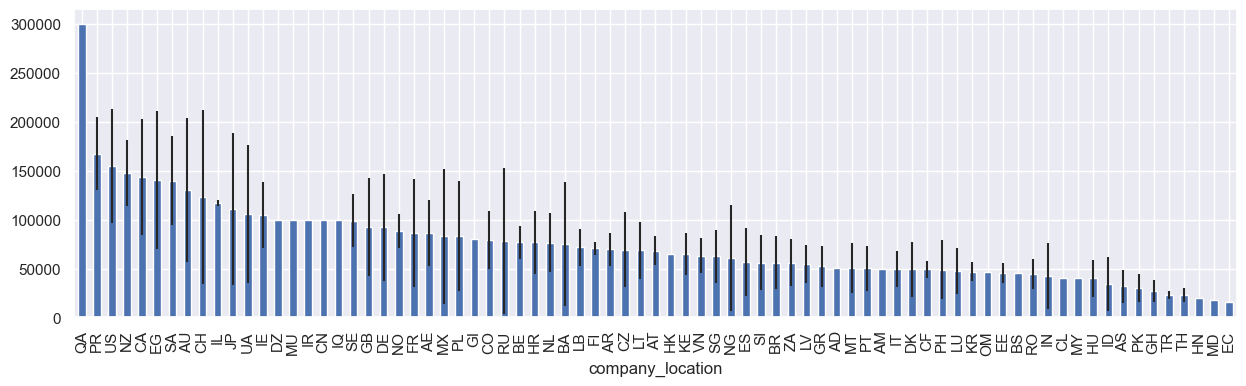

mean           std  count
company_size                                    
M             148581.969830  60568.904222  13424
L             137164.200824  70291.516389    971
S              84885.871508  53349.543180    179

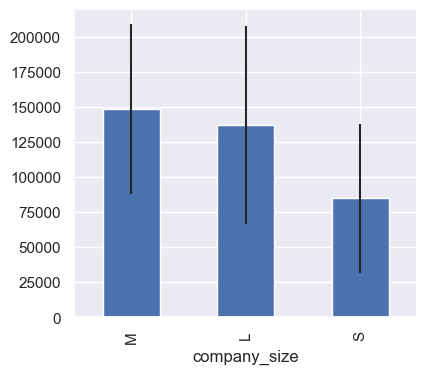

In [30]:
# Quick chart view of the salary range for all categorical columns.
for col in ['work_year'] + categorical_columns:
    group = aijobs.groupby(col)['salary_in_usd'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
    display(group.sort_values('count', ascending=False))
    group['mean'].sort_values(ascending=False).plot(kind='bar', yerr=group['std'], figsize=(len(group)/7+4, 4))
    plt.show()

#### Dummy detail comparison charts

In [31]:
# definition for plotting all post treatment dummies' counts, averages and deviation of target variable

def plotting(var):
    usd = new_X.groupby(var)['salary_in_usd']
    box = new_X.groupby(var)['transformed_salary']

    fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))
    ax.remove()

    ax1 = plt.subplot(1, 2, 1)
    rects = ax1.bar(1, usd.mean()[1].astype(int), 0.8, yerr=usd.std()[1].astype(int), color='mediumturquoise')
    ax1.bar_label(rects, label_type='center')
    rects = ax1.bar(2, usd.mean()[0].astype(int), 0.8, yerr=usd.std()[0].astype(int), color='salmon')
    ax1.bar_label(rects, label_type='center')
    ax1.set_xticks([1, 2], [var, 'not ' + var])
    ax1.set_title('Salary in USD')

    ax2 = plt.subplot(1, 2, 2)
    rects = ax2.bar(1, box.mean()[1].astype(int), 0.8, yerr=box.std()[1].astype(int), color='mediumaquamarine')
    ax2.bar_label(rects, label_type='center')
    rects = ax2.bar(2, box.mean()[0].astype(int), 0.8, yerr=box.std()[0].astype(int), color='lightcoral')
    ax2.bar_label(rects, label_type='center')
    ax2.set_xticks([1, 2], [var, 'not ' + var])
    ax2.set_title('Transformed Salary')

    plt.show()

In [32]:
avg = new_X[['transformed_salary']].mean()[0]
avg

1062.1914516788788

salary_in_usd              transformed_salary     
                   mean    std count               mean  std
work_year                                                   
2020              97244  62096    61                828  277
2021             103935  60429   177                860  280
2022             134772  54856  1607               1009  235
2023             152631  60830  8384               1081  239
2024             146414  62270  4158               1055  246

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
work_abroad                                                    
0                  148300  61020  14324               1063  243
1                   81138  57509     63                746  271

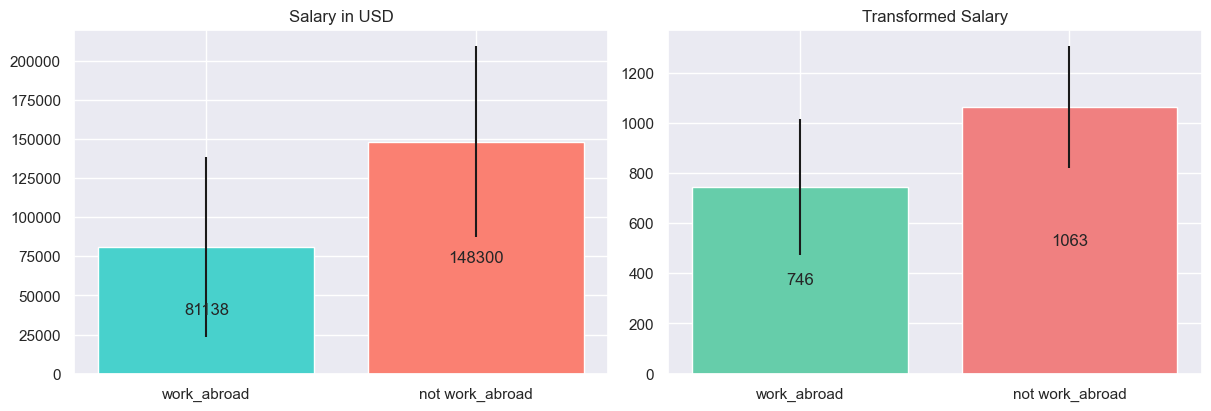

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
job_name_AI                                                    
0                  147875  61012  14227               1061  243
1                  159609  72671    160               1097  294

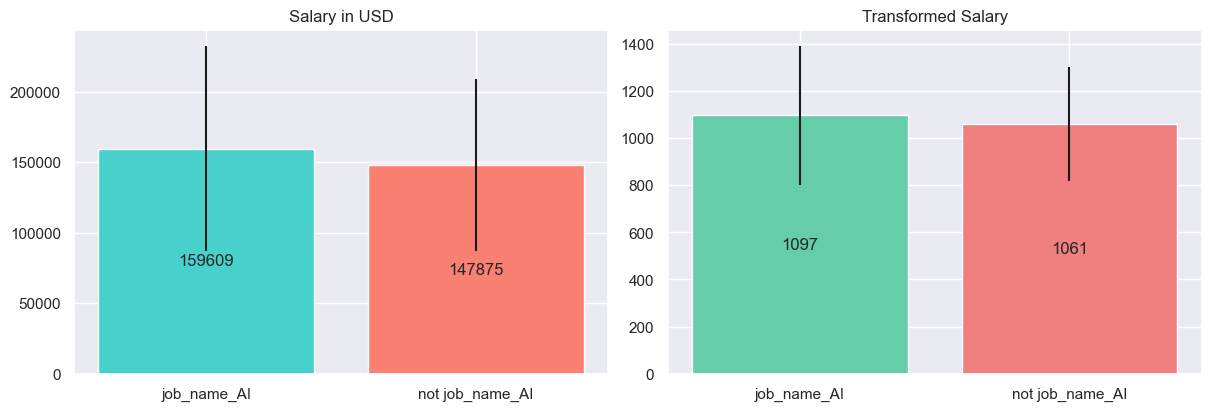

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Analyst                                                    
0                       157093  60881  11801               1099  238
1                       106536  42457   2586                892  194

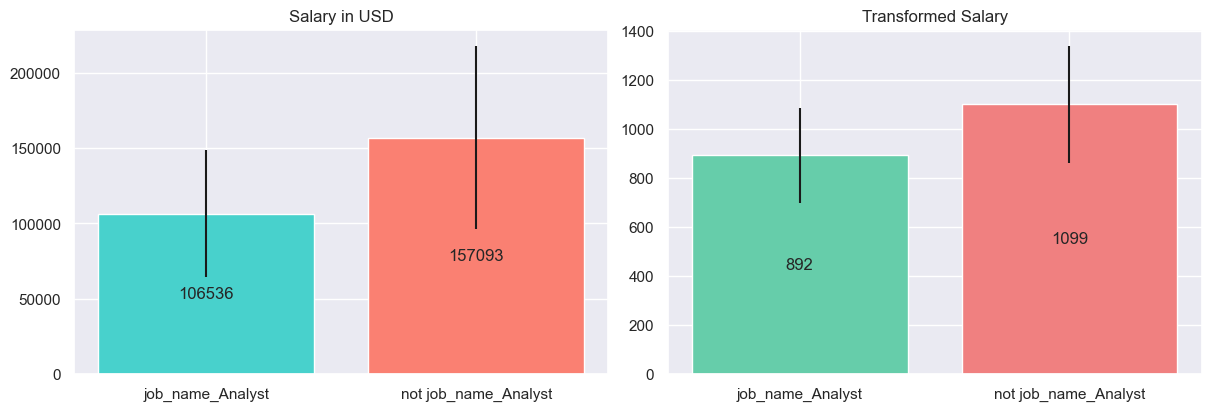

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Analytics                                                    
0                         147972  61485  13912               1061  245
1                         148976  50894    475               1074  198

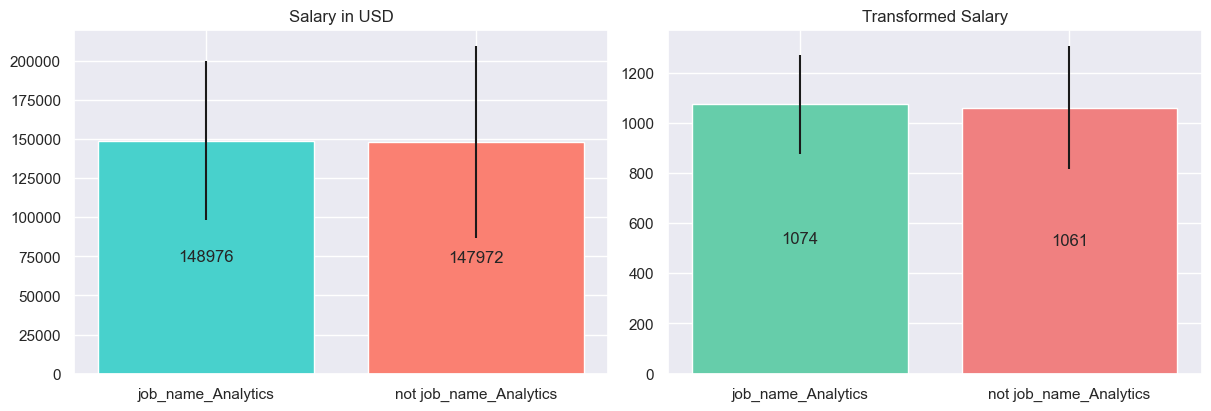

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Applied                                                    
0                       146963  61006  13985               1058  243
1                       184271  55358    402               1205  212

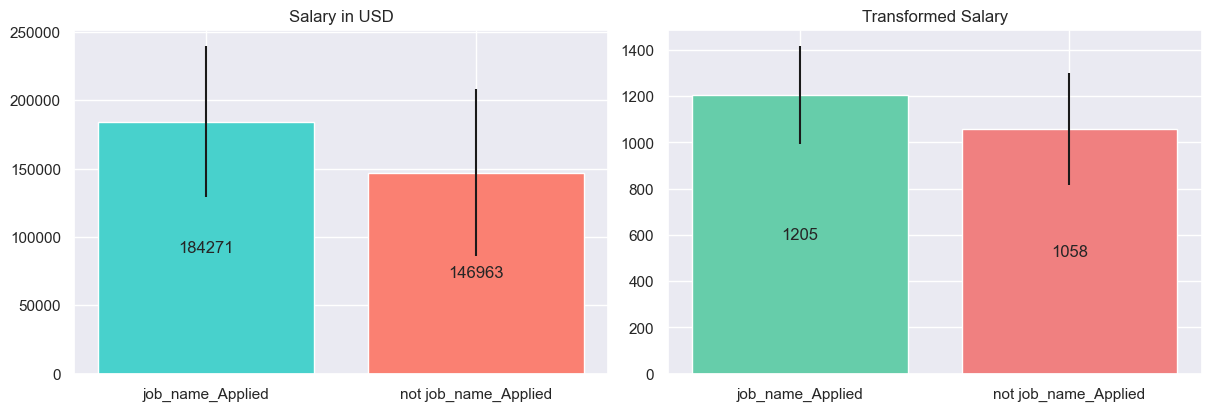

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Architect                                                    
0                         147558  61239  14001               1060  244
1                         164246  56053    386               1131  209

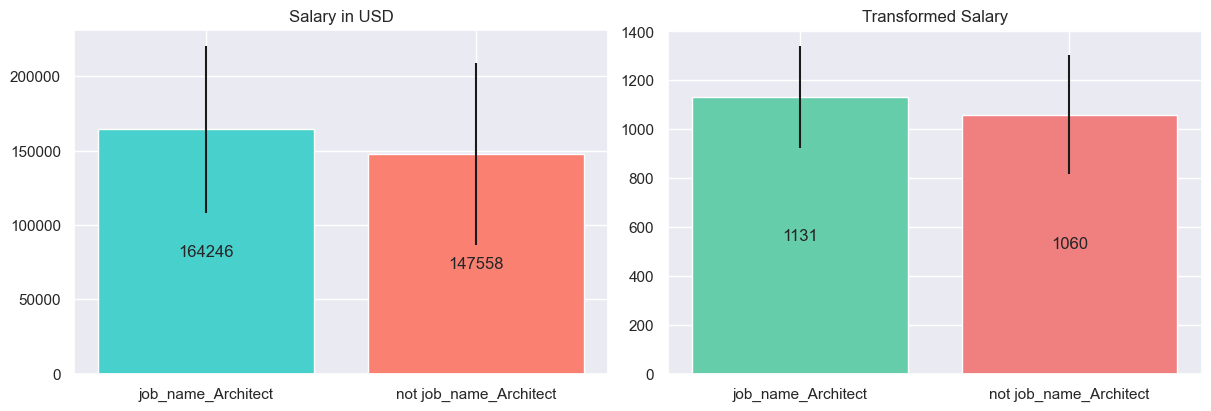

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Associate                                                    
0                         148034  61155  14382               1062  244
1                          67319  15618      5                708   87

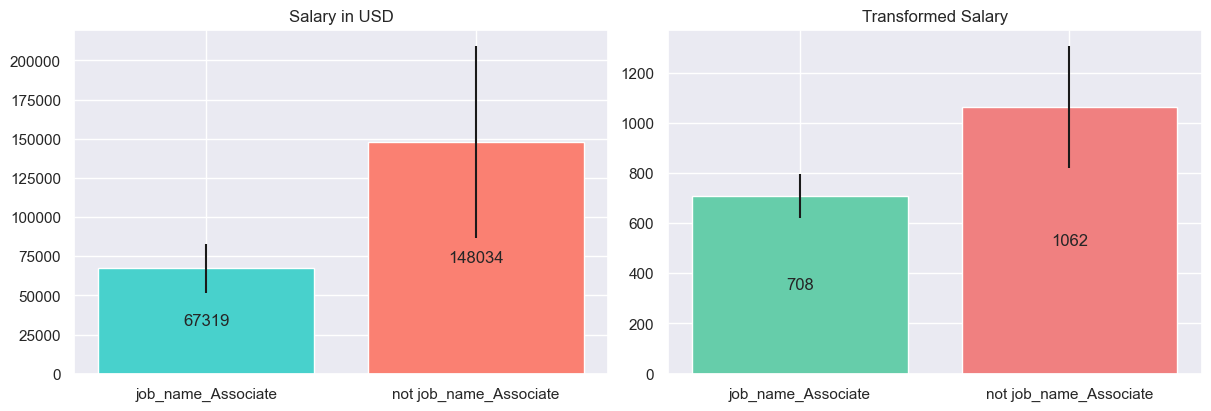

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Big                                                    
0                   148063  61140  14375               1062  244
1                    79793  53002     12                732  299

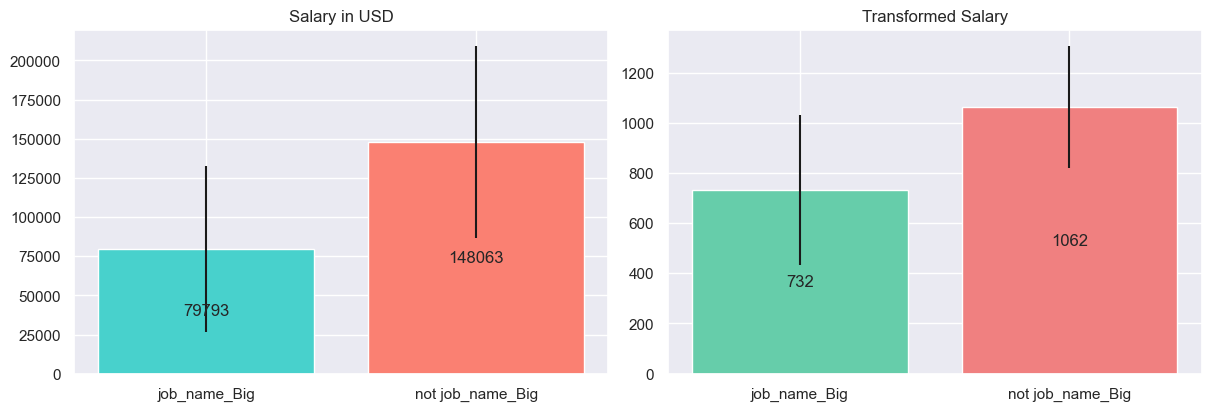

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Database                                                    
0                        148010  61181  14374               1062  244
1                        143538  37756     13               1059  154

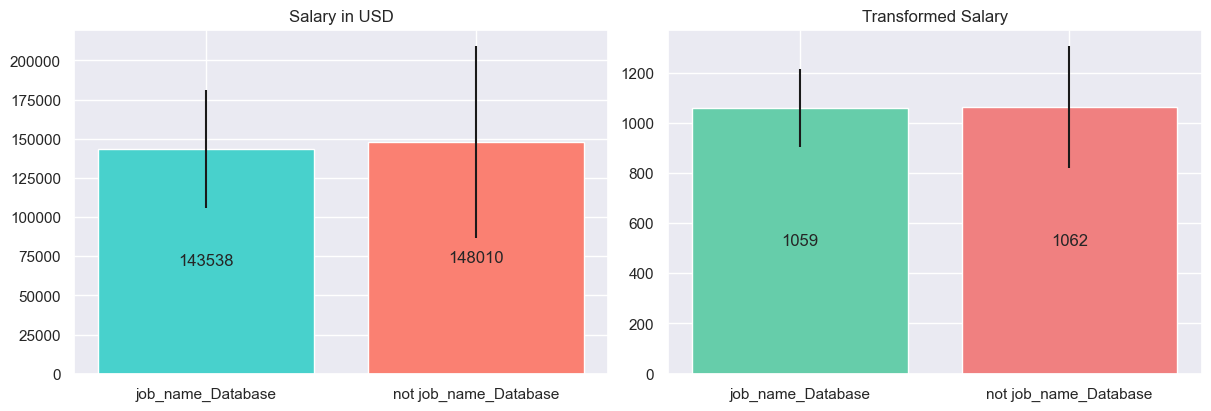

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Decision                                                    
0                        147958  61216  14349               1061  244
1                        166094  31969     38               1150  119

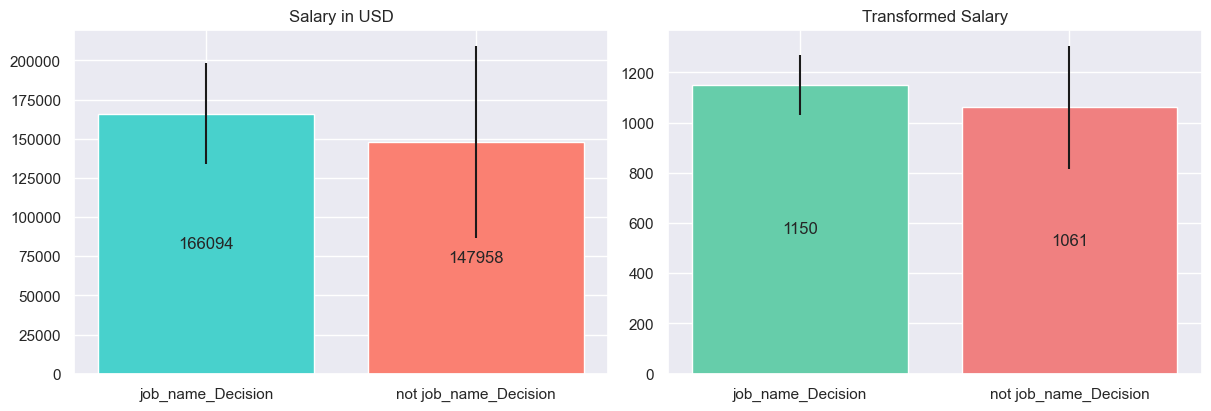

salary_in_usd                transformed_salary     
                       mean     std  count               mean  std
job_name_Deep                                                     
0                    147972   61107  14374               1062  244
1                    185681  103900     13               1180  372

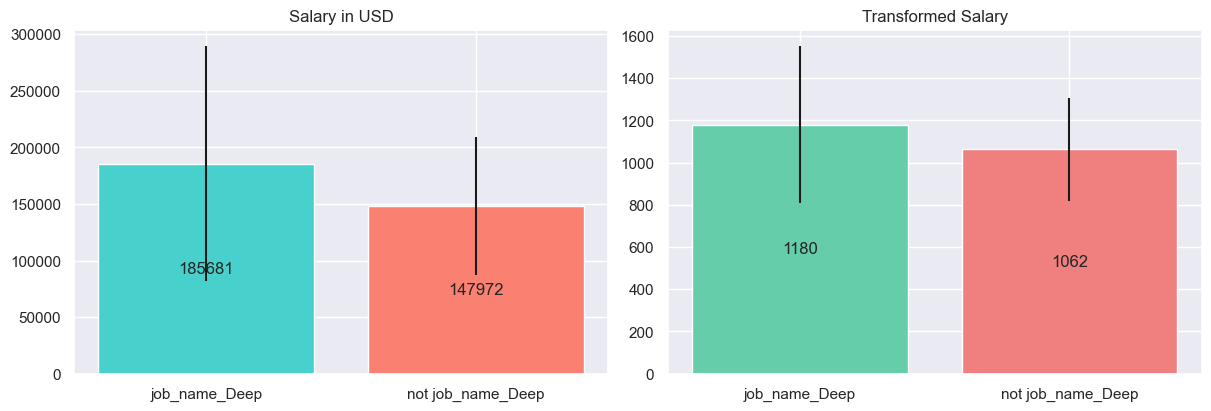

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Developer                                                    
0                         148585  61190  14172               1064  244
1                         109832  45410    215                907  199

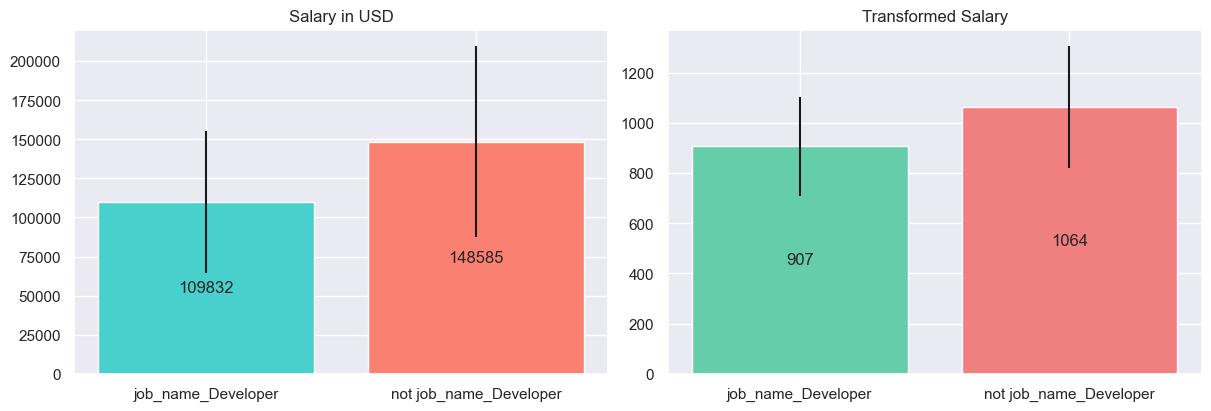

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Director                                                    
0                        147854  61101  14348               1061  244
1                        203820  59463     39               1274  211

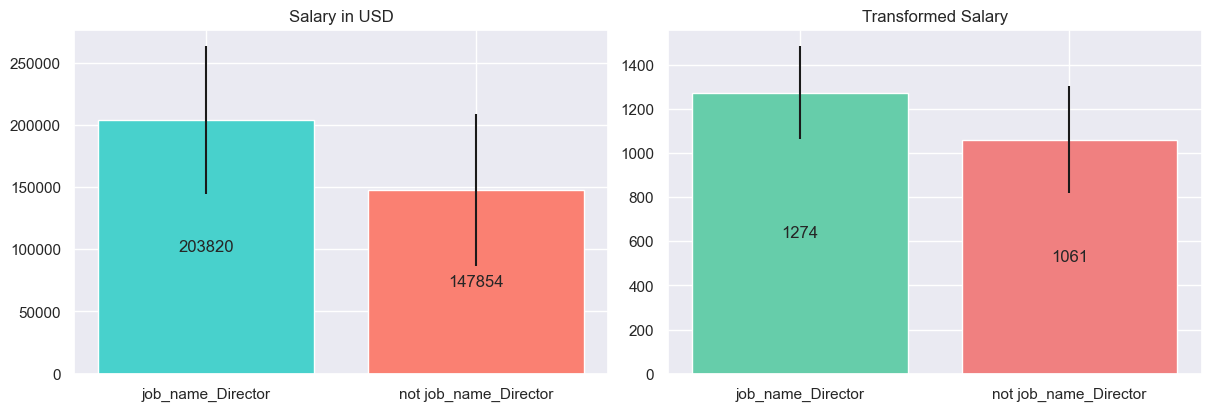

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_ETL                                                    
0                   148066  61157  14356               1062  244
1                   119922  58809     31                943  247

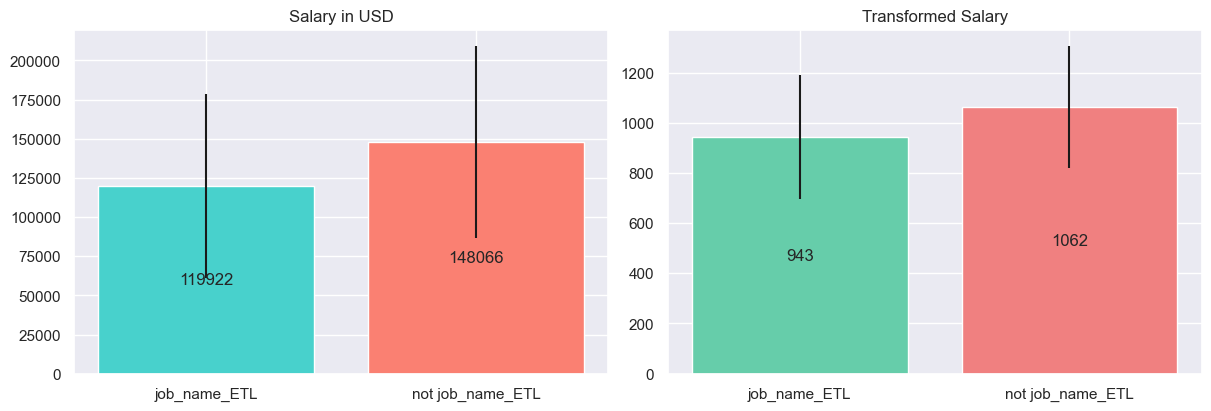

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Head                                                    
0                    147756  60977  14325               1061  243
1                    205735  75855     62               1270  275

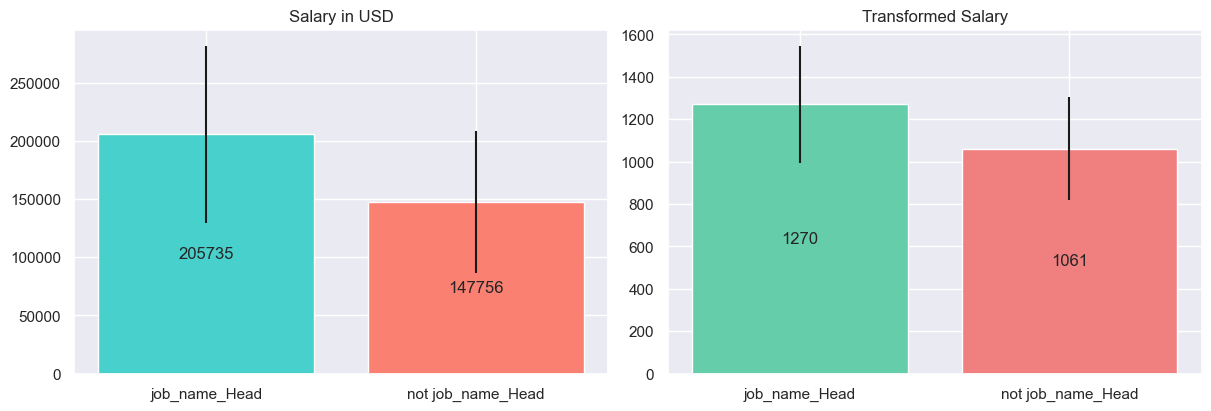

salary_in_usd               transformed_salary     
                                 mean    std  count               mean  std
job_name_Infrastructure                                                    
0                              147928  61174  14340               1061  244
1                              171731  53570     47               1160  205

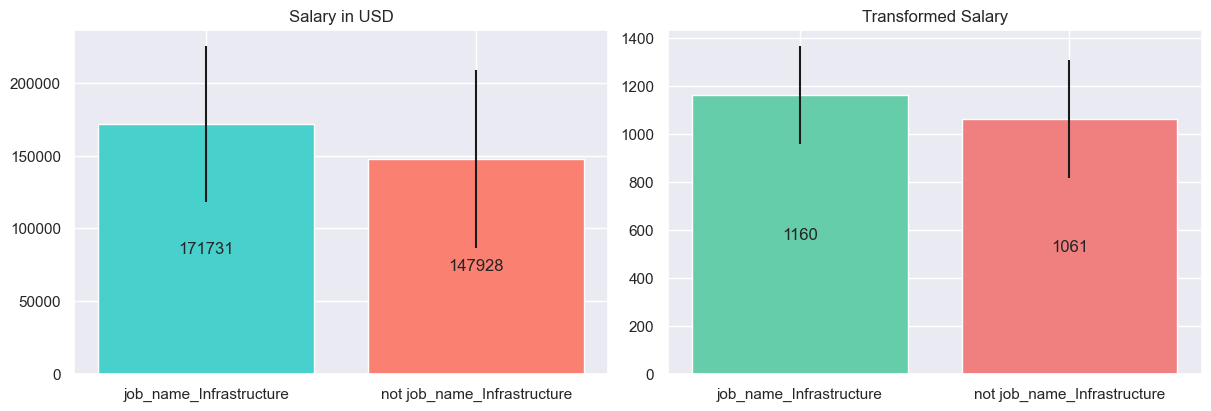

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Insight                                                    
0                       148090  61118  14375               1062  243
1                        46459   7158     12                582   49

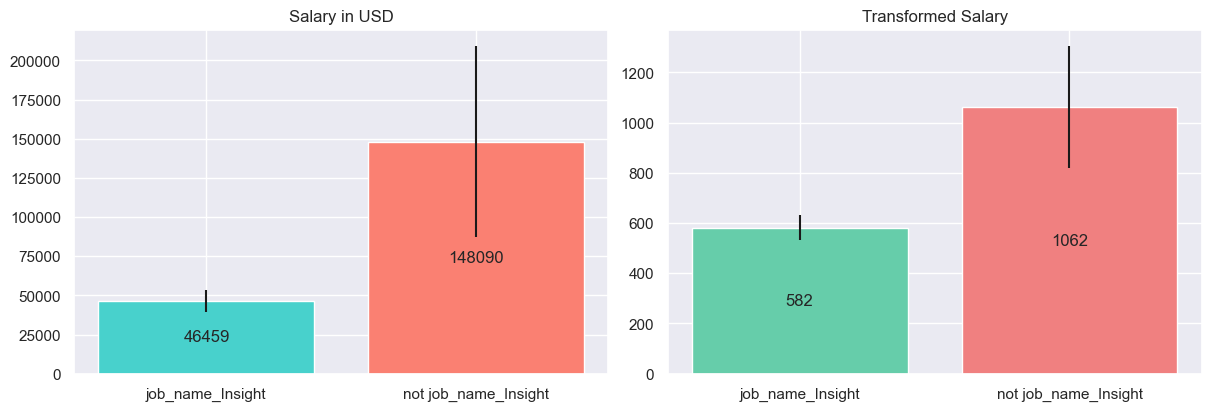

salary_in_usd               transformed_salary     
                              mean    std  count               mean  std
job_name_Integration                                                    
0                           148126  61170  14342               1062  244
1                           109595  45416     45                906  200

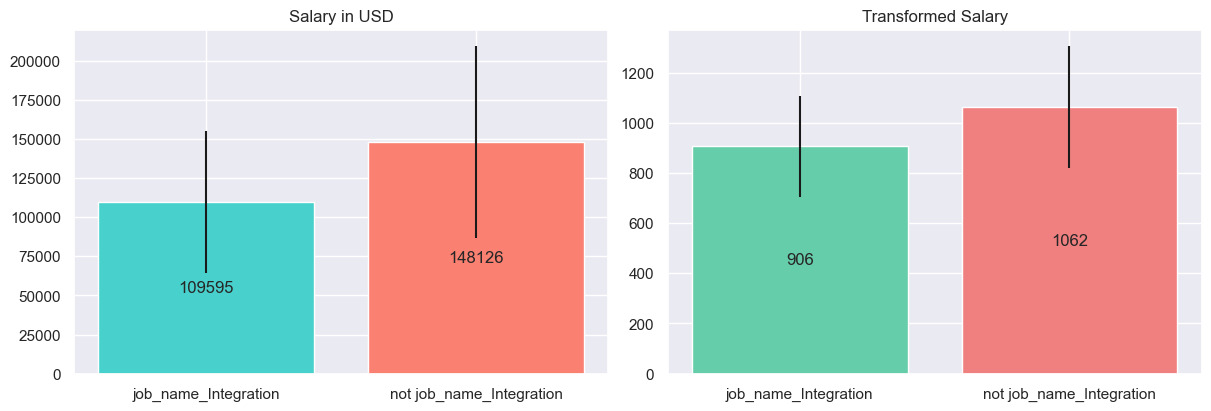

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Lead                                                    
0                    148034  61128  14295               1062  243
1                    143628  66687     92               1035  284

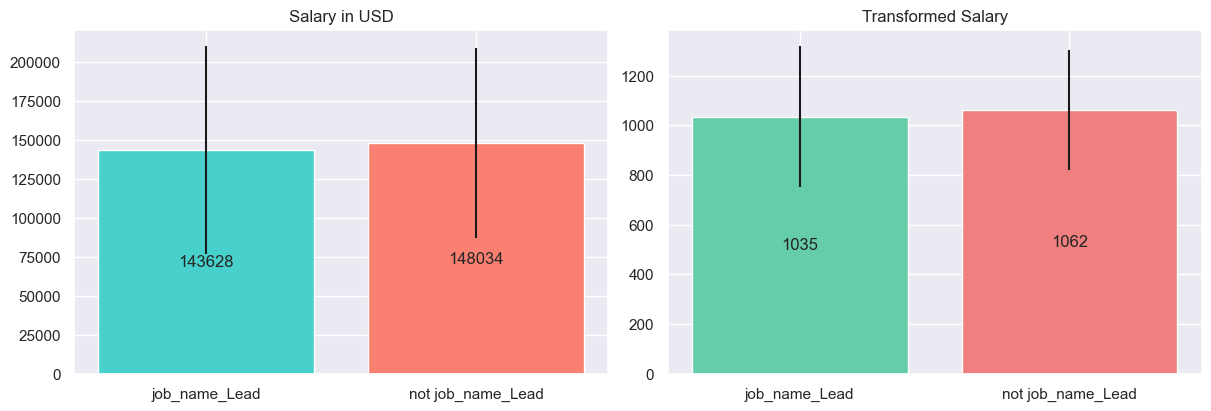

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_NLP                                                    
0                   148024  61145  14372               1062  244
1                   130002  77349     15                968  329

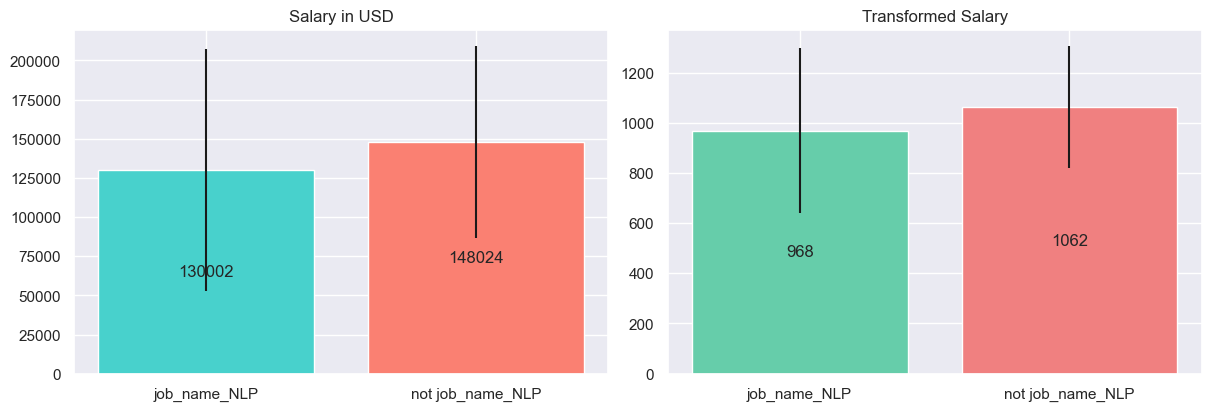

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Ops                                                    
0                   148022  61170  14364               1062  244
1                   137904  57511     23               1023  235

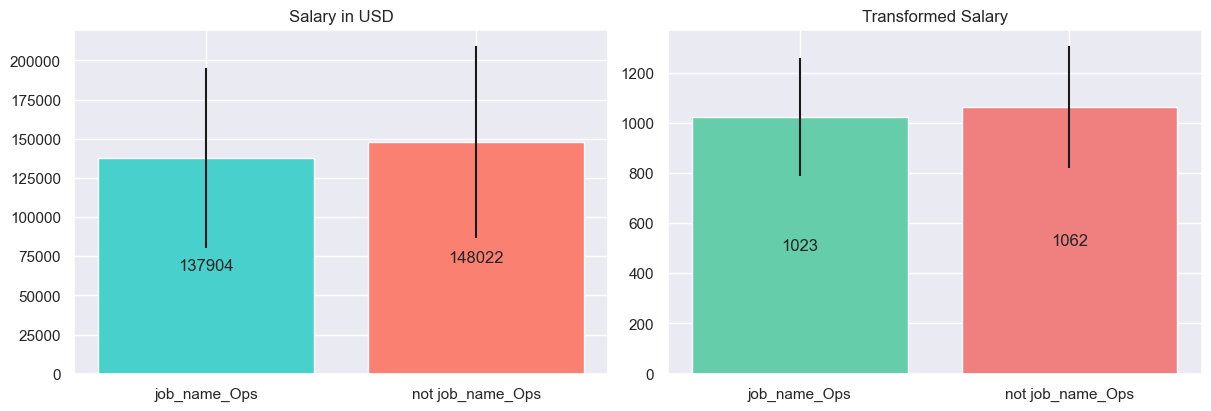

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Practitioner                                                    
0                            148022  61178  14371               1062  244
1                            133650  45759     16               1014  190

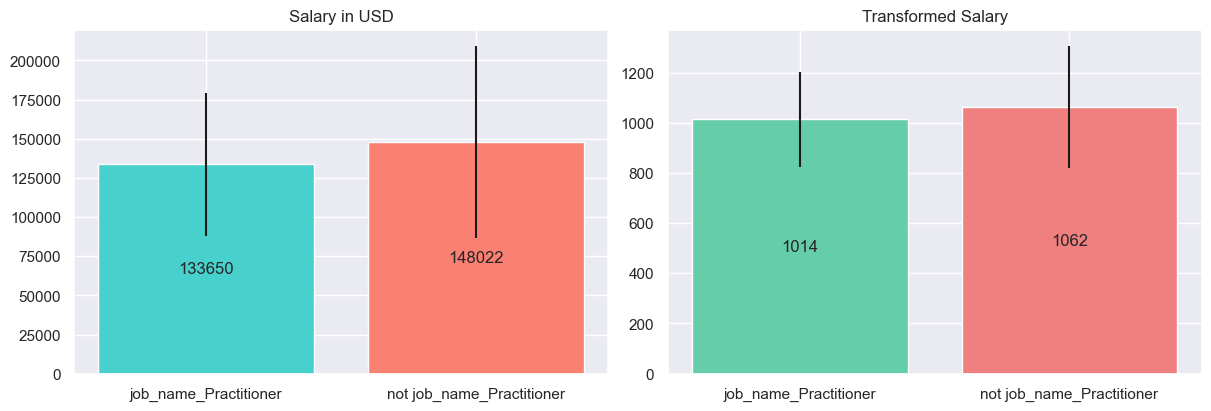

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Principal                                                    
0                         147997  61173  14370               1062  244
1                         154989  53516     17               1093  230

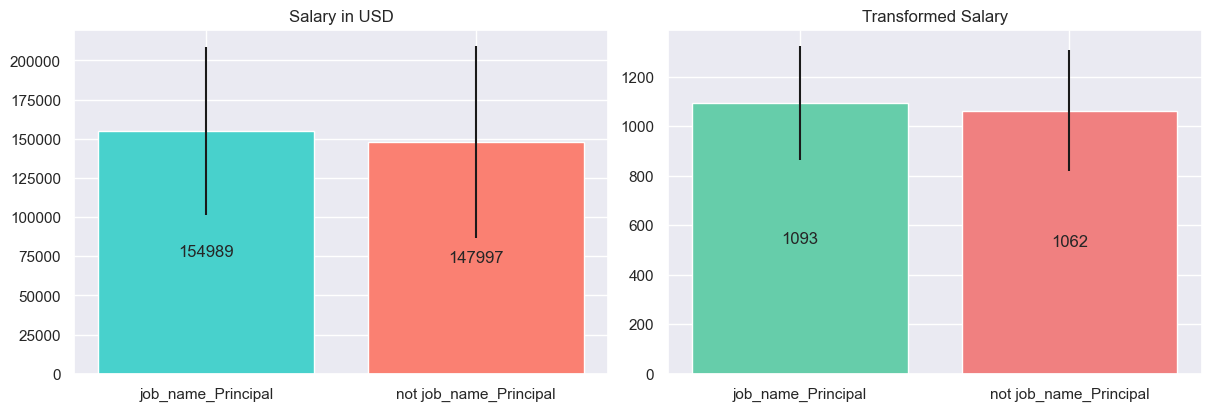

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Product                                                    
0                       148000  61195  14350               1062  244
1                       150021  48119     37               1077  207

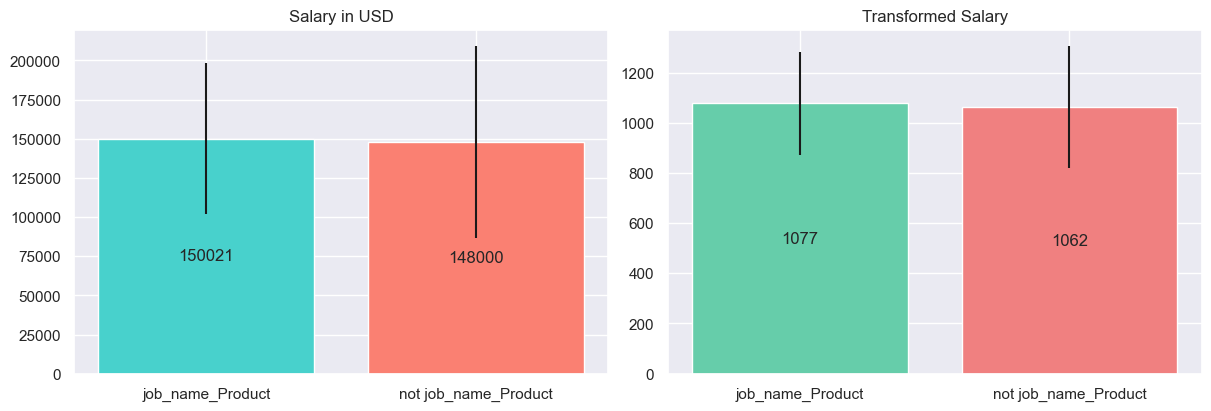

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Prompt                                                    
0                      147976  61161  14373               1062  244
1                      177937  58683     14               1181  225

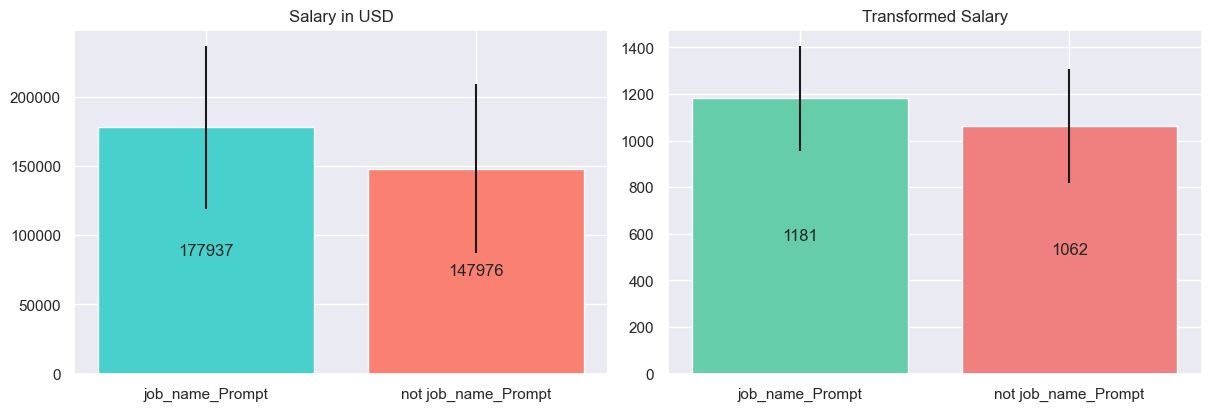

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Quality                                                    
0                       148132  61137  14358               1062  244
1                        85532  39020     29                789  195

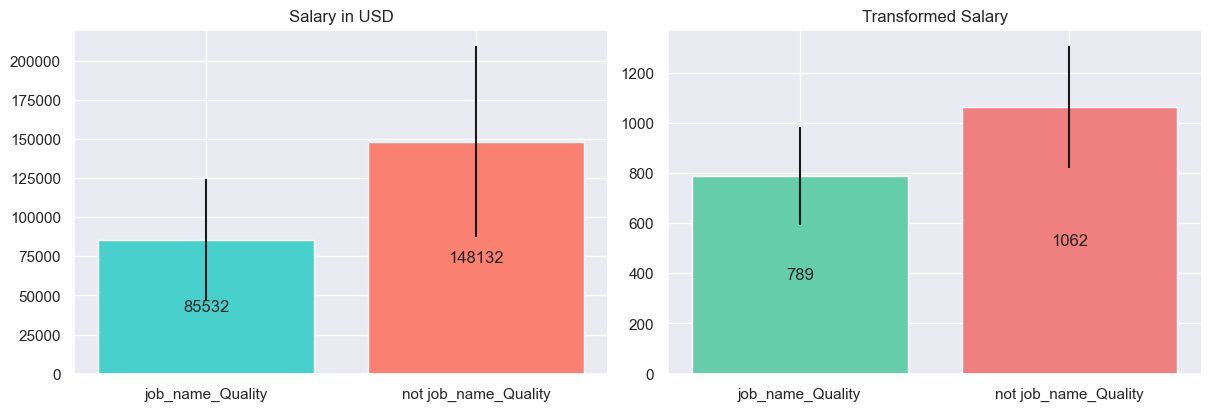

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Robotics                                                    
0                        147989  61165  14373               1062  244
1                        165071  59157     14               1133  228

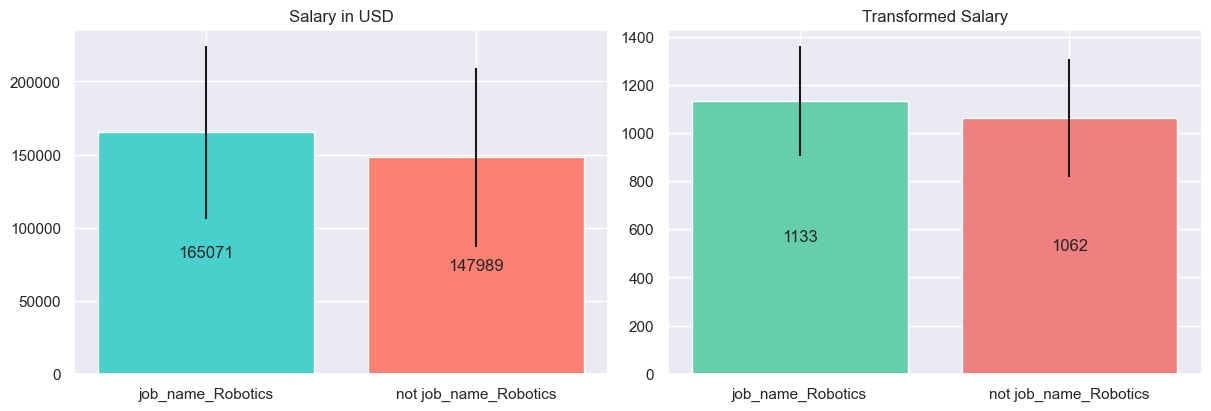

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Software                                                    
0                        147959  61134  14358               1062  244
1                        171312  71746     29               1143  292

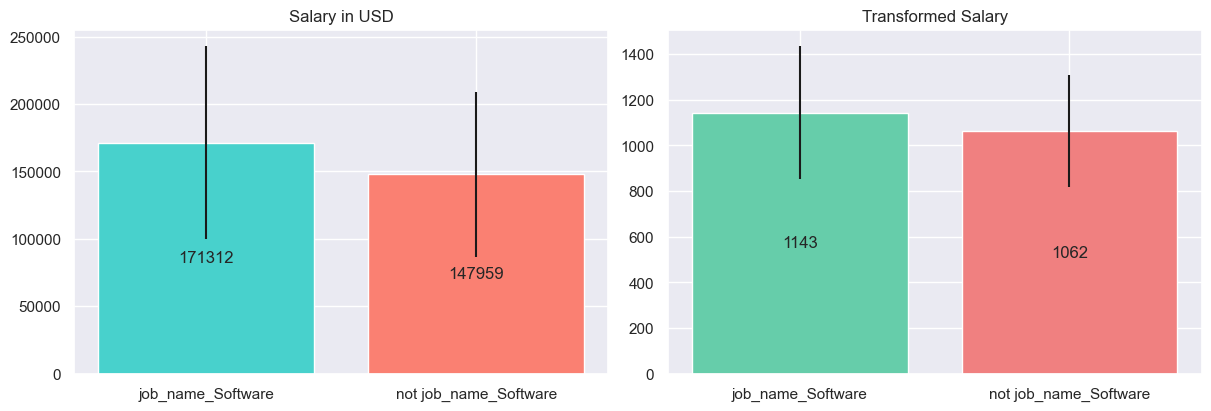

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Specialist                                                    
0                          148510  61093  14250               1064  243
1                           95537  43337    137                840  192

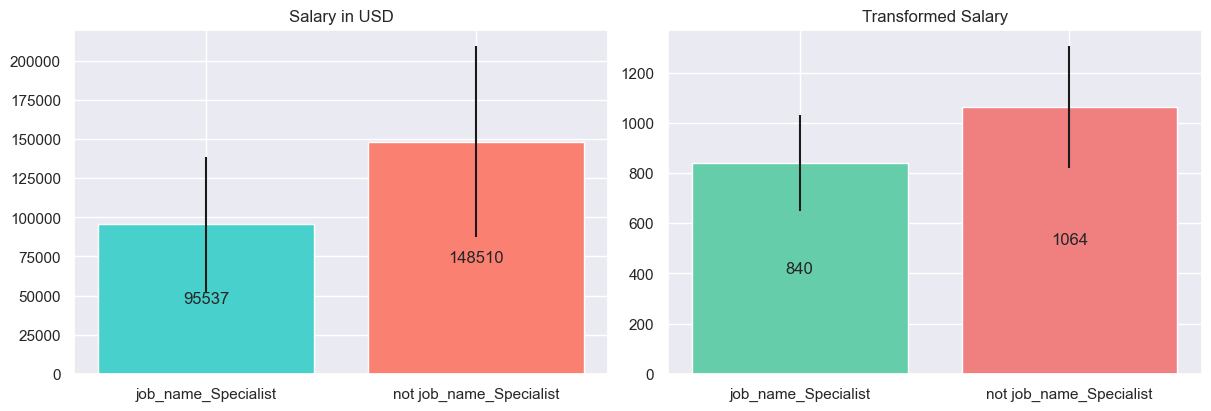

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Staff                                                    
0                     148021  61156  14382               1062  244
1                     102750  73459      5                833  384

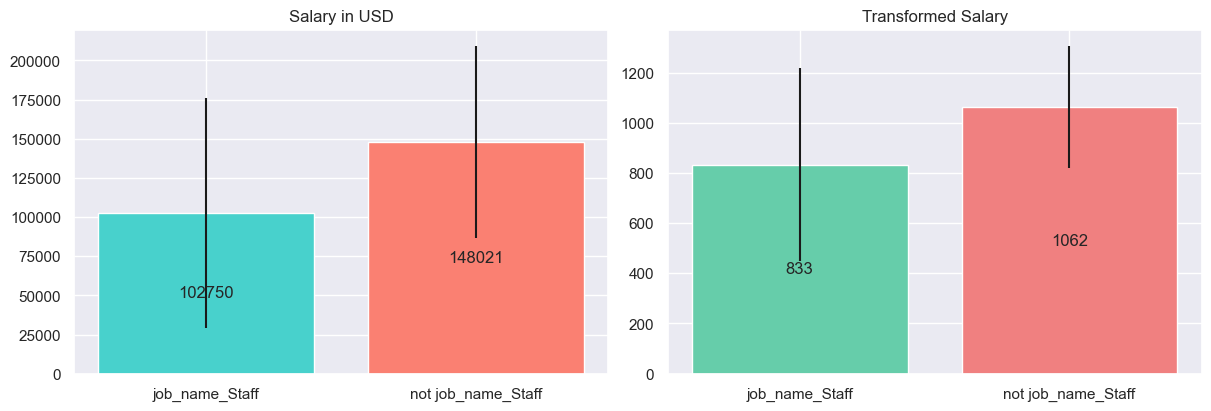

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Vision                                                    
0                      147957  61117  14355               1062  244
1                      169902  77681     32               1130  324

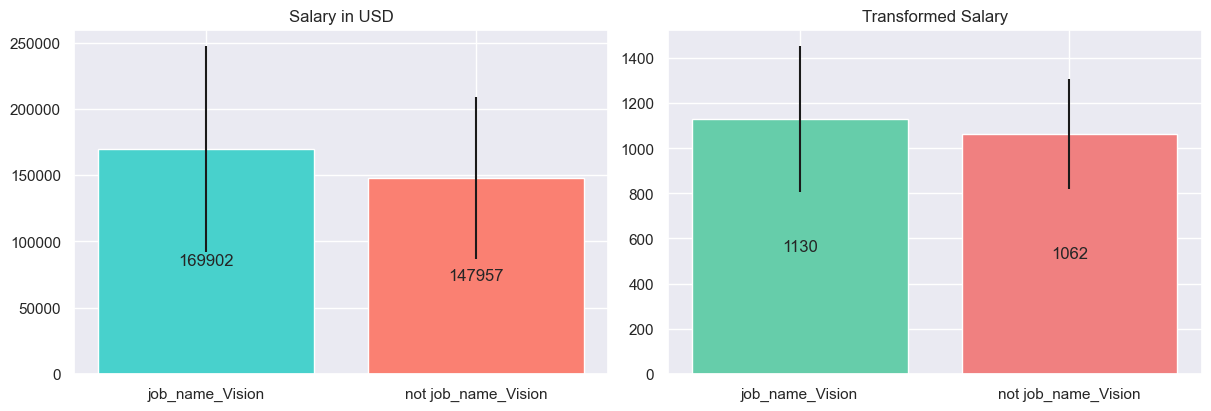

salary_in_usd               transformed_salary     
                                mean    std  count               mean  std
job_name_Visualization                                                    
0                             148042  61176  14369               1062  244
1                             119144  42584     18                952  187

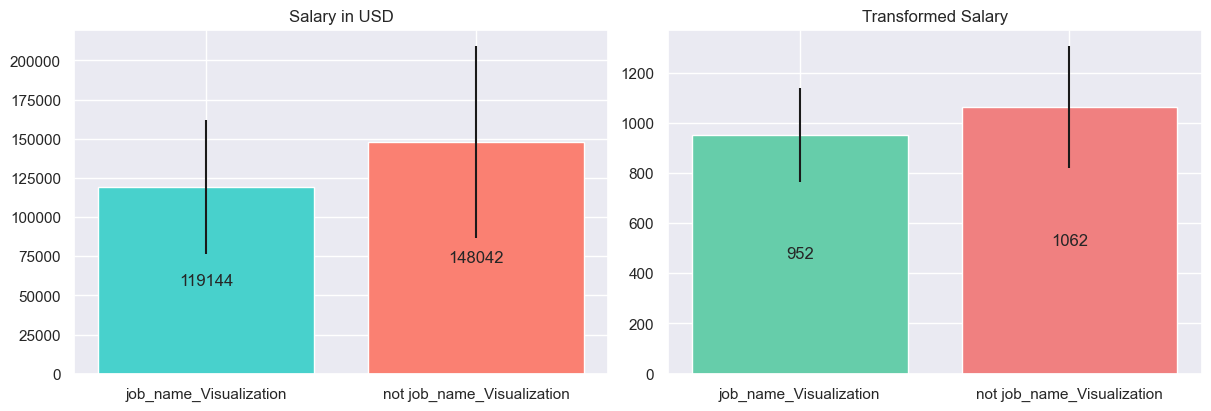

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Machine                                                    
0                       142522  59091  12486               1040  239
1                       184020  62336   1901               1201  231

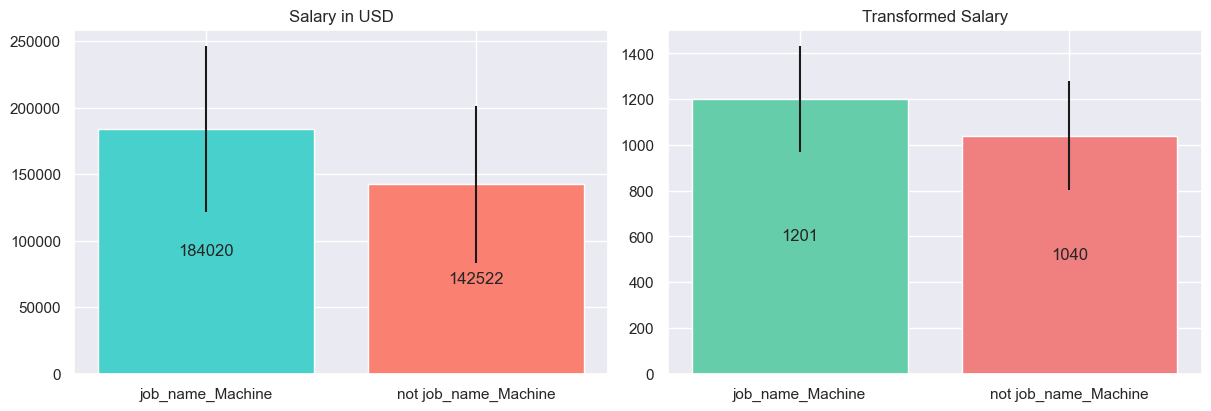

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Operations                                                    
0                          148175  61152  14309               1062  244
1                          117005  55428     78                933  233

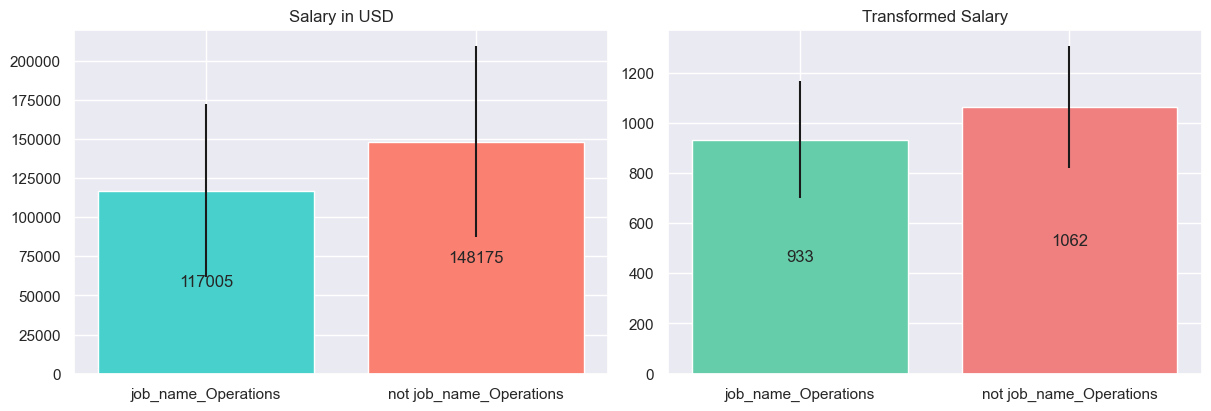

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Intelligence                                                    
0                            149138  61377  13747               1066  244
1                            123674  50648    640                965  218

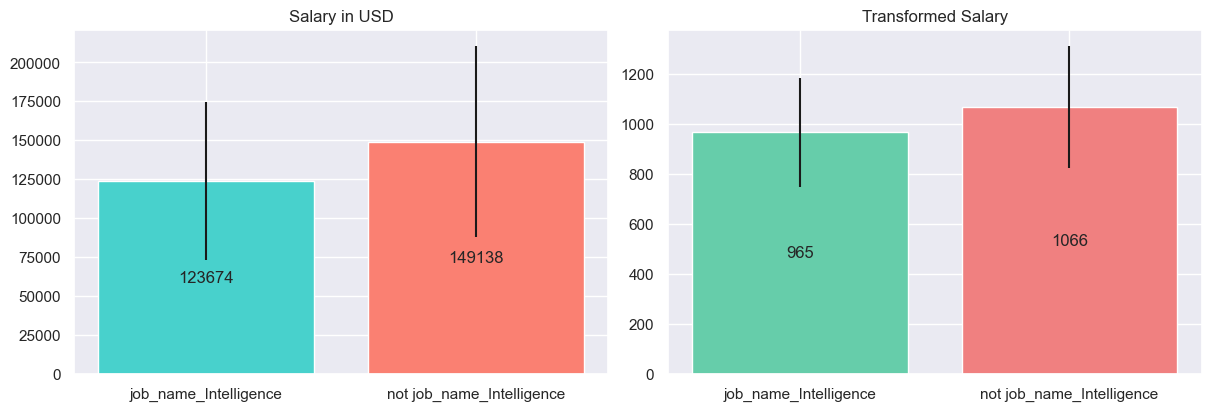

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Business                                                    
0                        149211  61351  13732               1067  244
1                        122746  50942    655                960  221

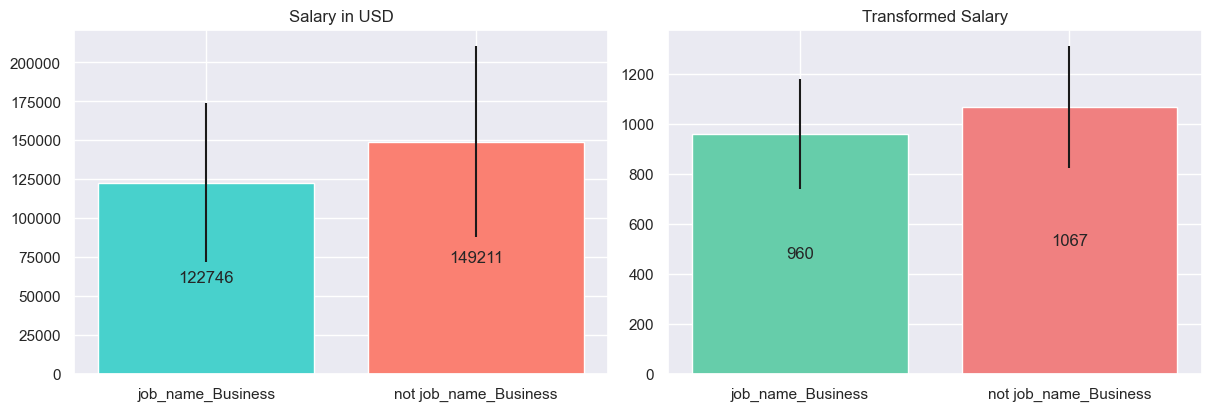

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Cloud                                                    
0                     147999  61178  14368               1062  244
1                     153219  49975     19               1093  191

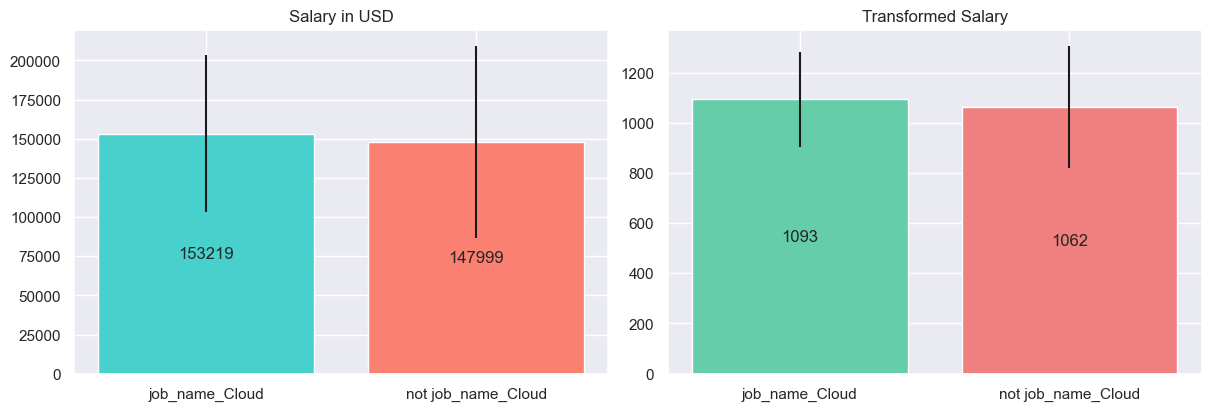

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Modeler                                                    
0                       148070  61211  14339               1062  244
1                       128646  41086     48                995  171

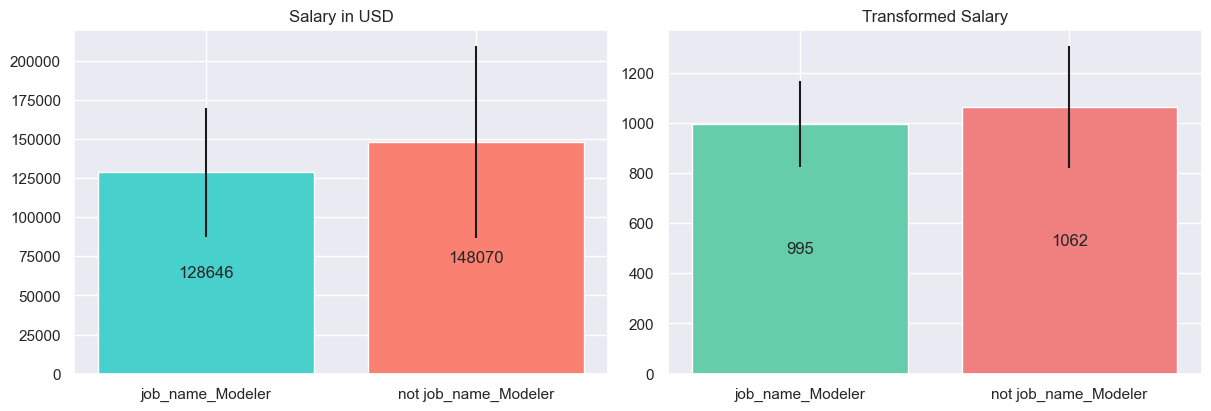

salary_in_usd              transformed_salary     
                           mean    std count               mean  std
job_name_Engineer                                                   
0                        139999  59908  8338               1029  243
1                        159042  61164  6049               1107  237

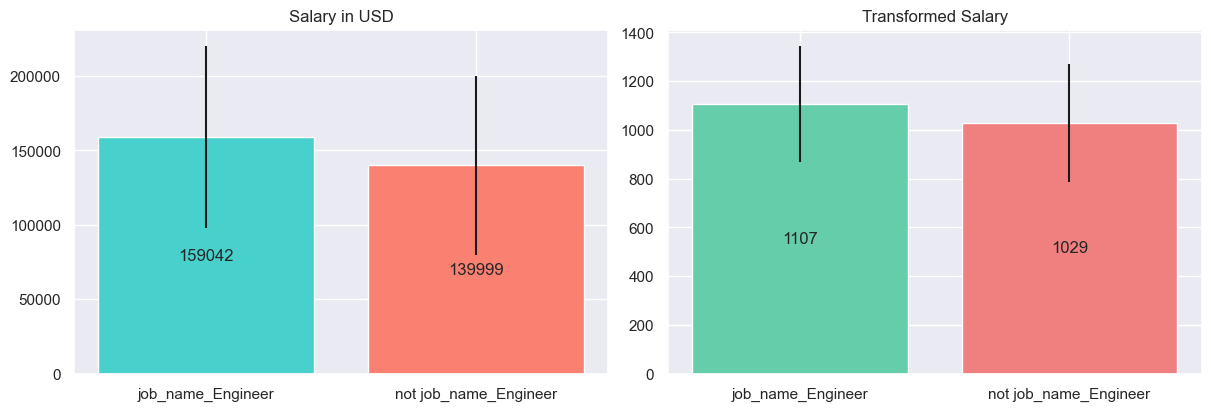

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Finance                                                    
0                       148023  61141  14380               1062  244
1                       112471  97906      7                881  374

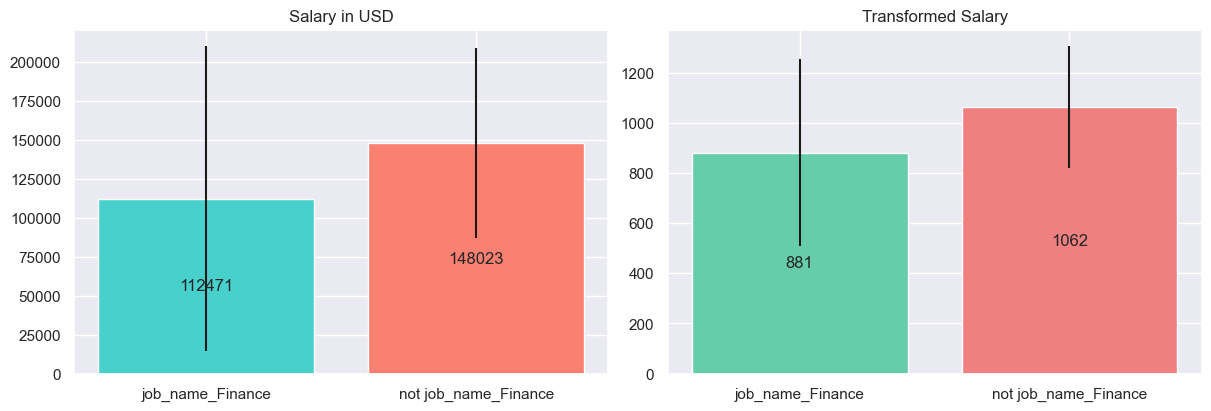

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Research                                                    
0                        146714  60419  13549               1057  242
1                        168889  68896    838               1139  263

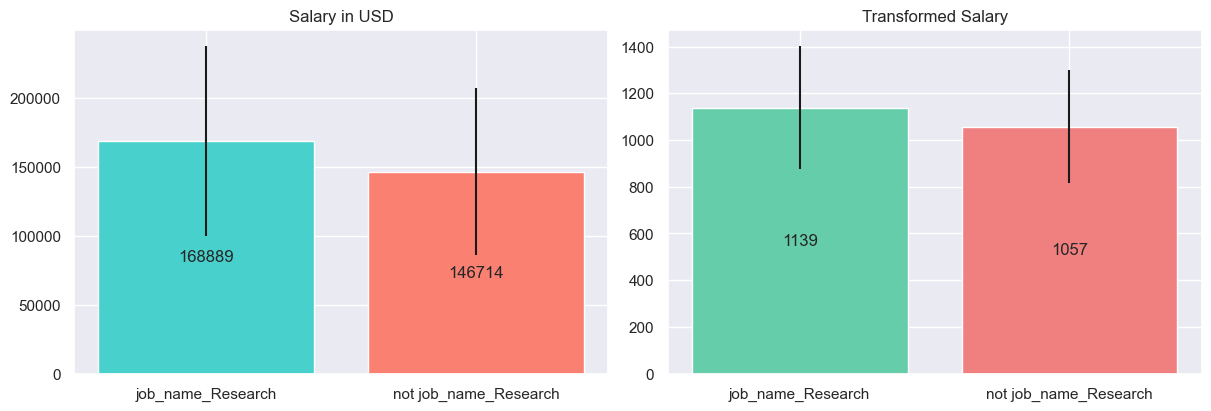

salary_in_usd              transformed_salary     
                            mean    std count               mean  std
job_name_Scientist                                                   
0                         142262  60815  9894               1038  244
1                         160654  60024  4493               1113  235

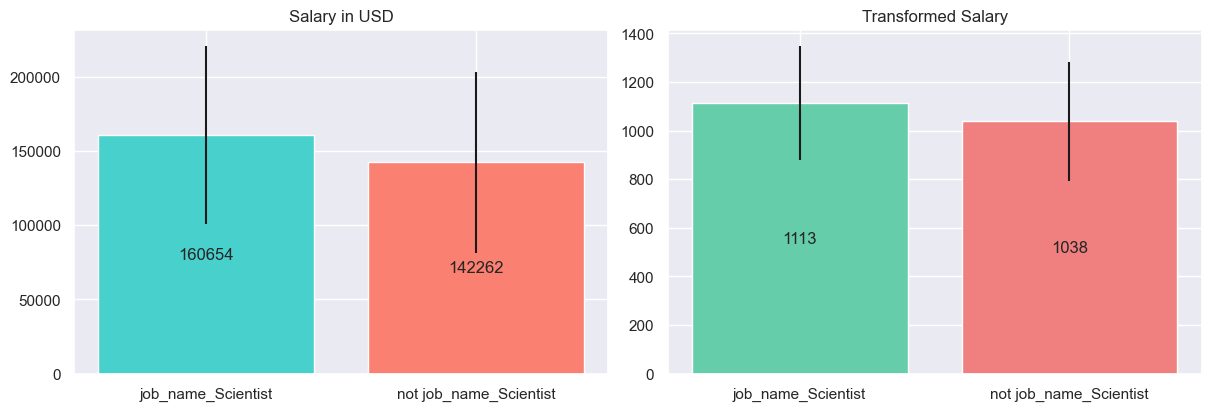

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Strategist                                                    
0                          148084  61165  14359               1062  244
1                          107593  45466     28                900  182

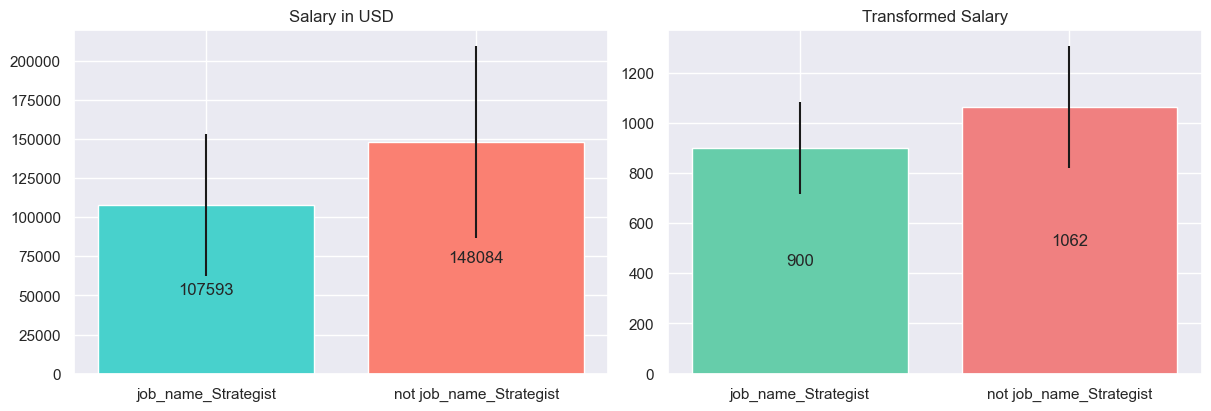

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Manager                                                    
0                       148342  61177  13947               1063  244
1                       137349  59843    440               1020  237

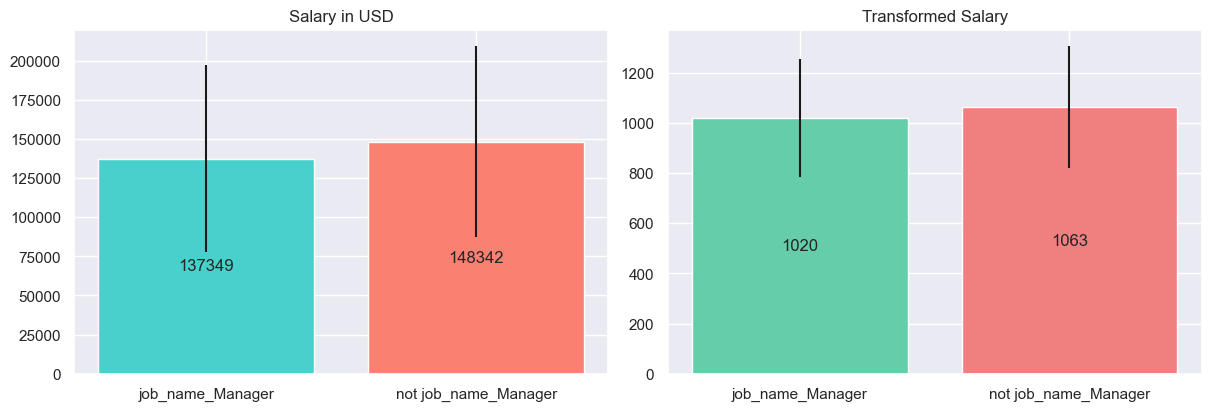

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EN                                                    
0                          152469  59955  13309               1081  235
1                           92901  47629   1078                820  224

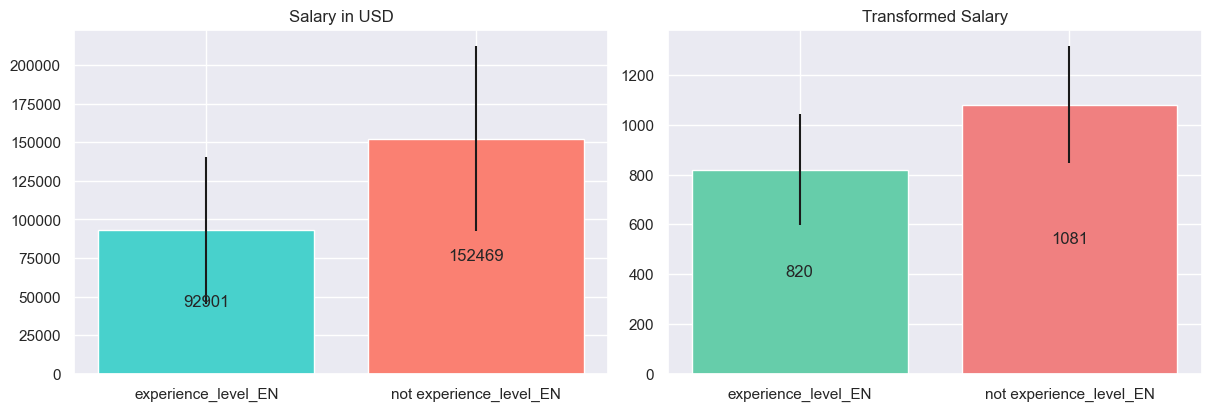

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EX                                                    
0                          146767  60653  13969               1057  243
1                          189405  63741    418               1221  230

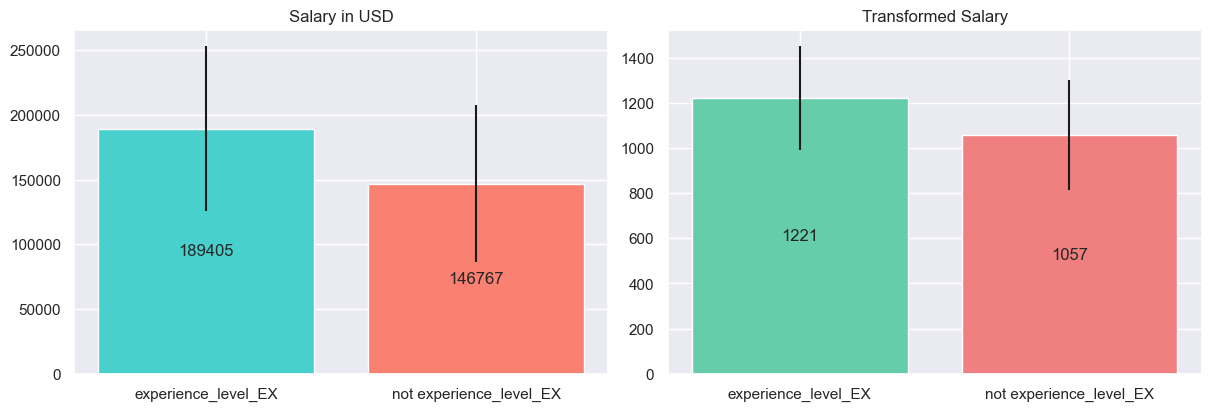

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_MI                                                    
0                          155938  61265  10976               1094  240
1                          122480  53366   3411                958  227

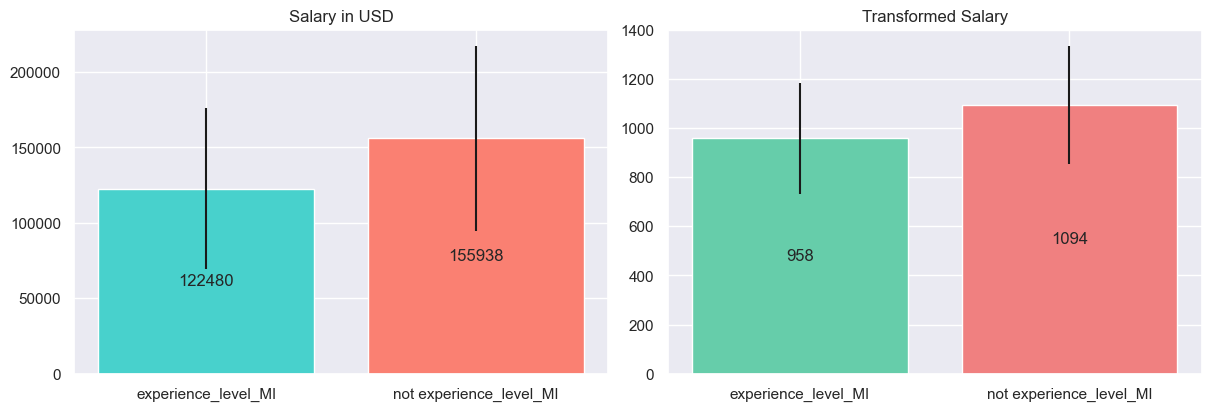

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
experience_level_SE                                                   
0                          121683  58276  4907                950  248
1                          161631  58100  9480               1120  221

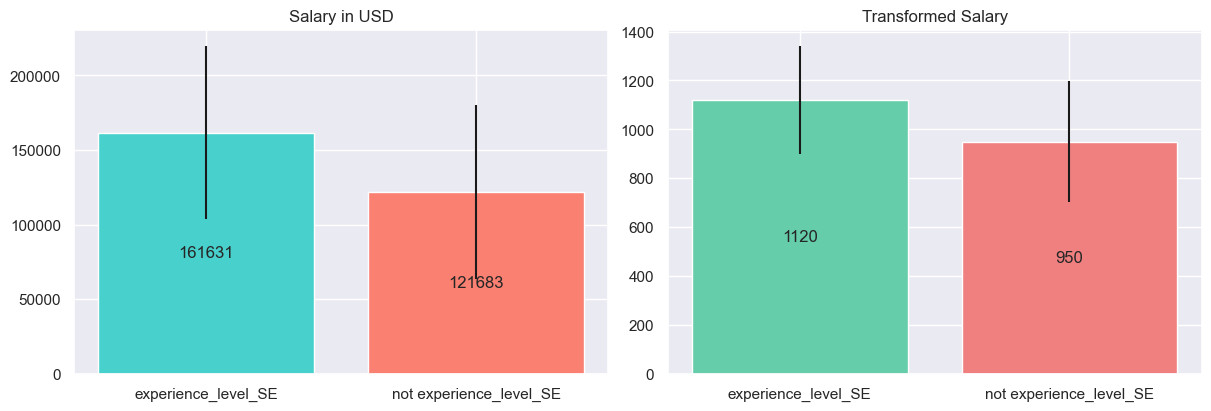

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_CT                                                    
0                         148067  61119  14366               1062  244
1                         106066  77594     21                859  324

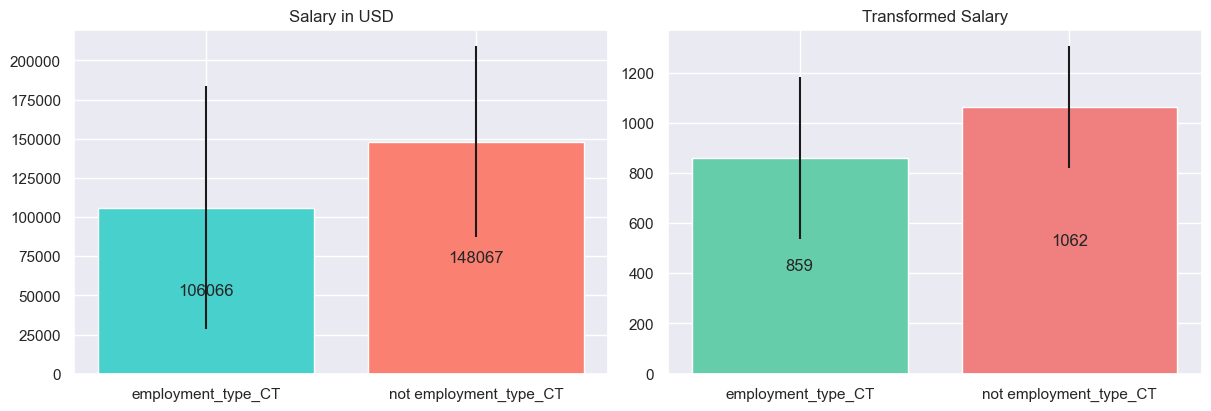

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FL                                                    
0                         148054  61137  14380               1062  244
1                          48646  26666      7                580  168

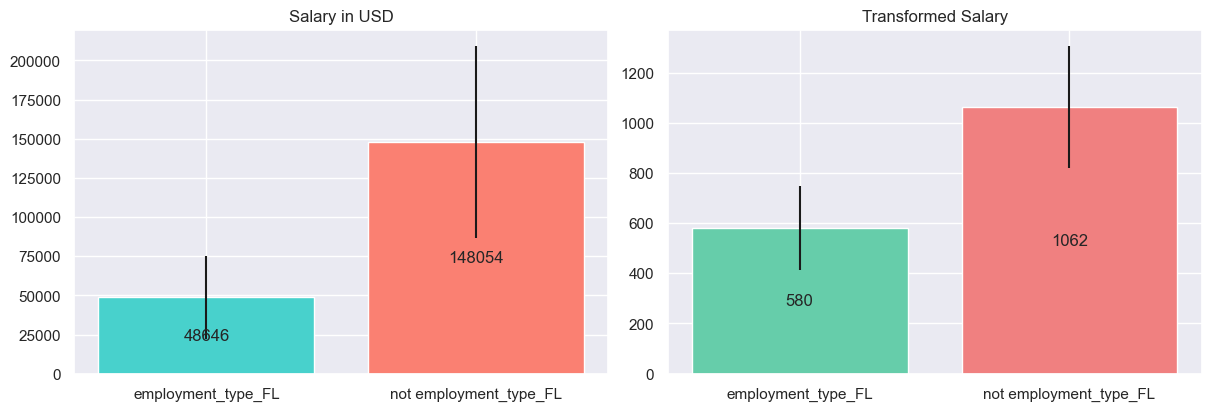

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FT                                                    
0                          79629  63940     46                729  297
1                         148225  61034  14341               1063  243

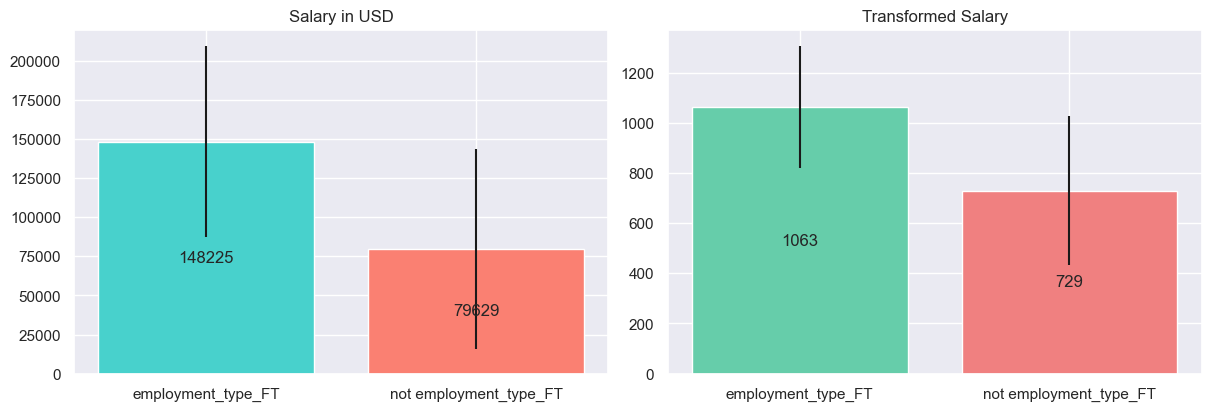

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_PT                                                    
0                         148115  61106  14369               1062  243
1                          60835  43073     18                636  248

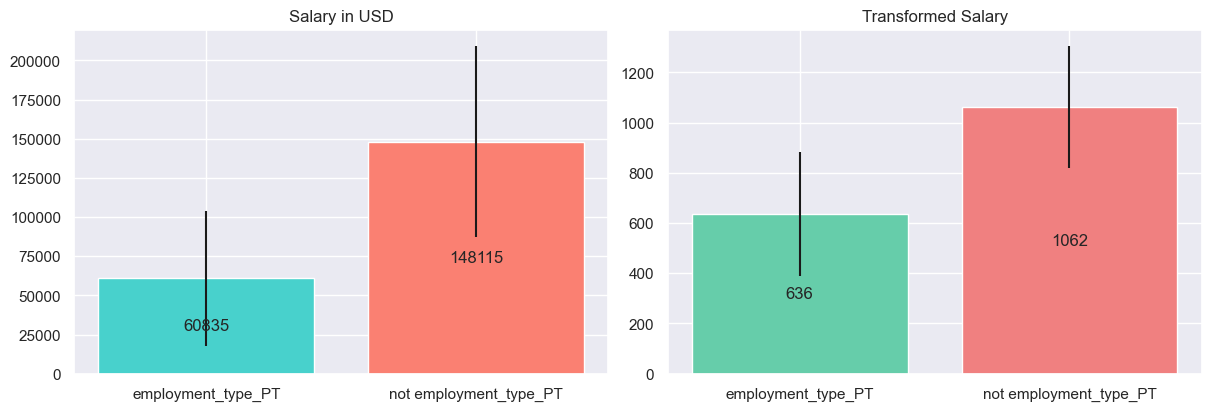

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_AUD                                                    
0                          148058  61154  14376               1062  244
1                           79662  27474     11                768  144

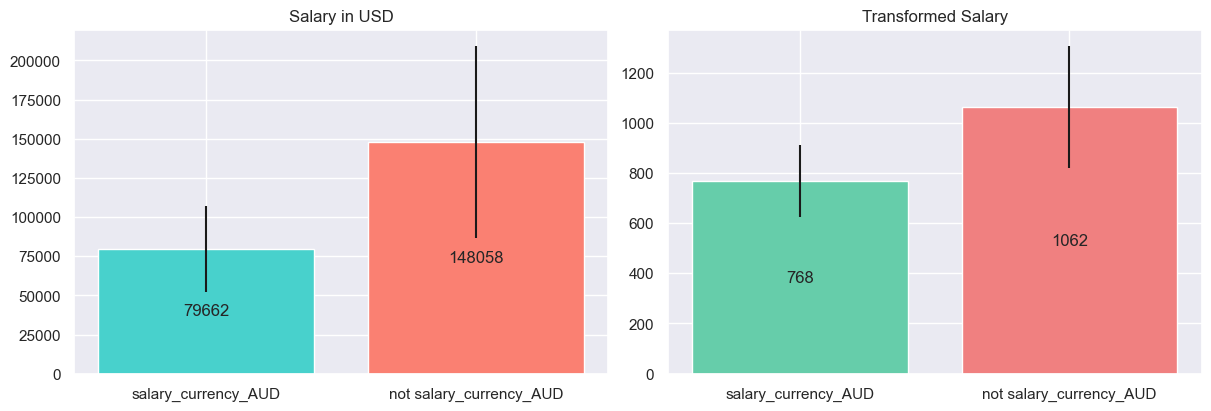

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CAD                                                    
0                          148139  61149  14339               1062  244
1                          108122  52213     48                895  222

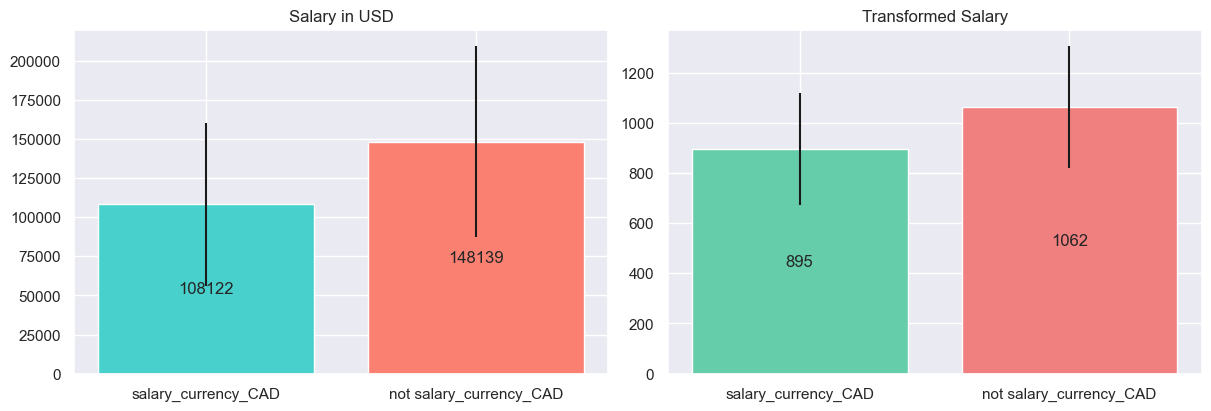

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CHF                                                    
0                          148011  61153  14380               1062  244
1                          137305  85486      7               1009  307

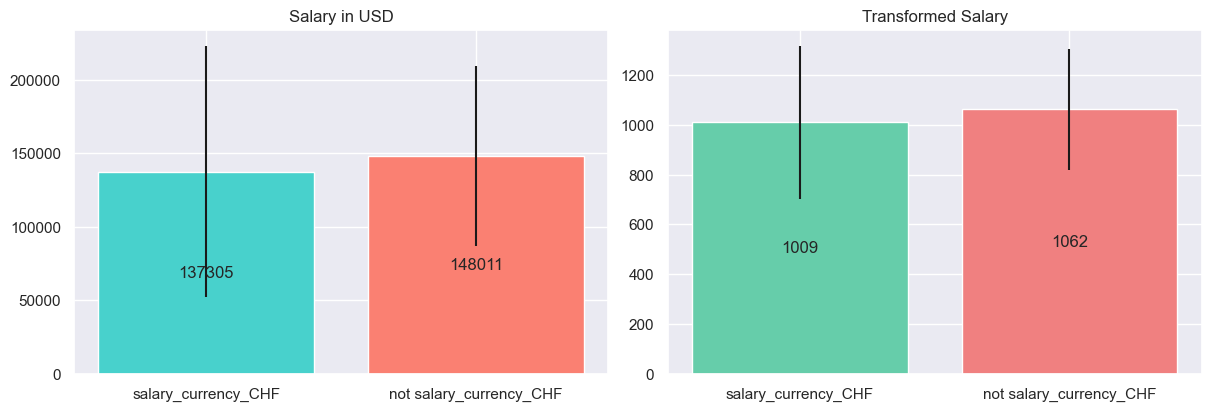

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_EUR                                                    
0                          150371  60108  13992               1073  237
1                           64224  32542    395                676  168

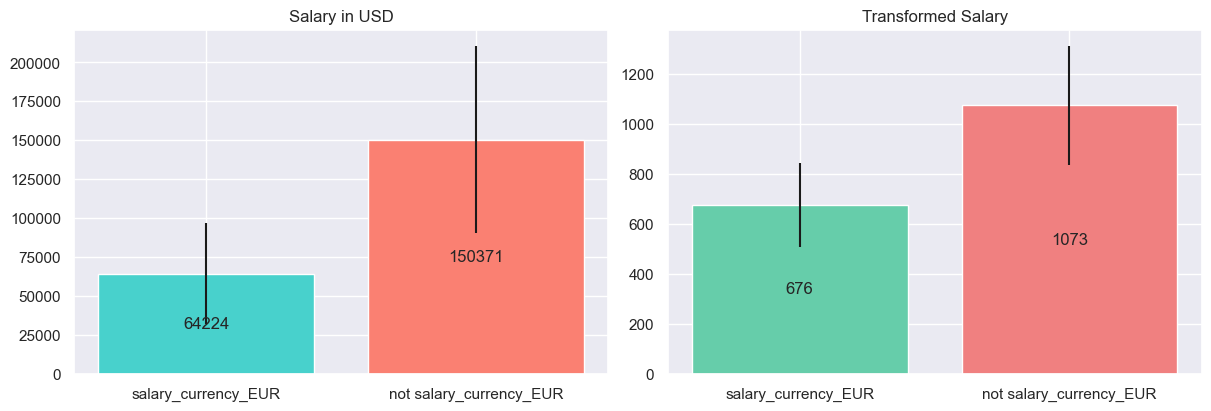

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_GBP                                                    
0                          150790  60313  13840               1074  238
1                           77561  34633    547                751  171

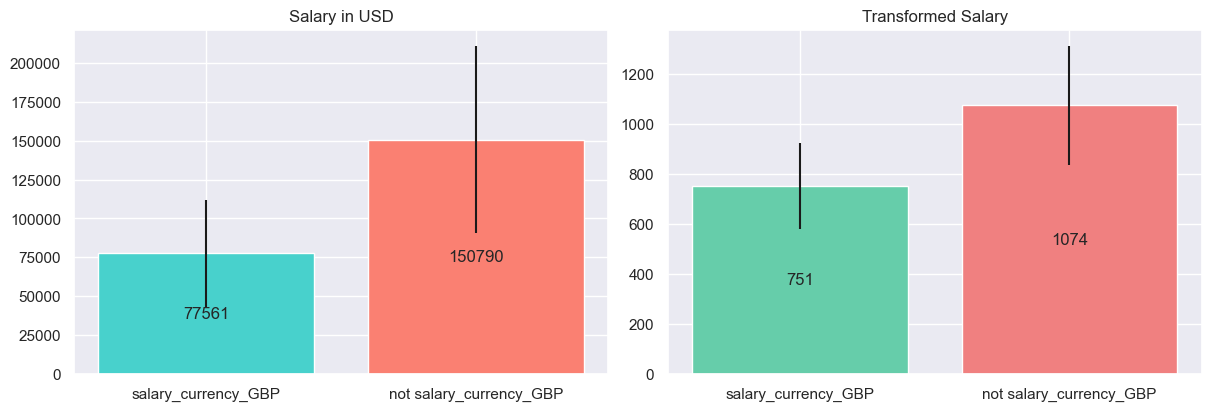

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_INR                                                    
0                          148396  60893  14338               1064  242
1                           33910  19277     49                476  135

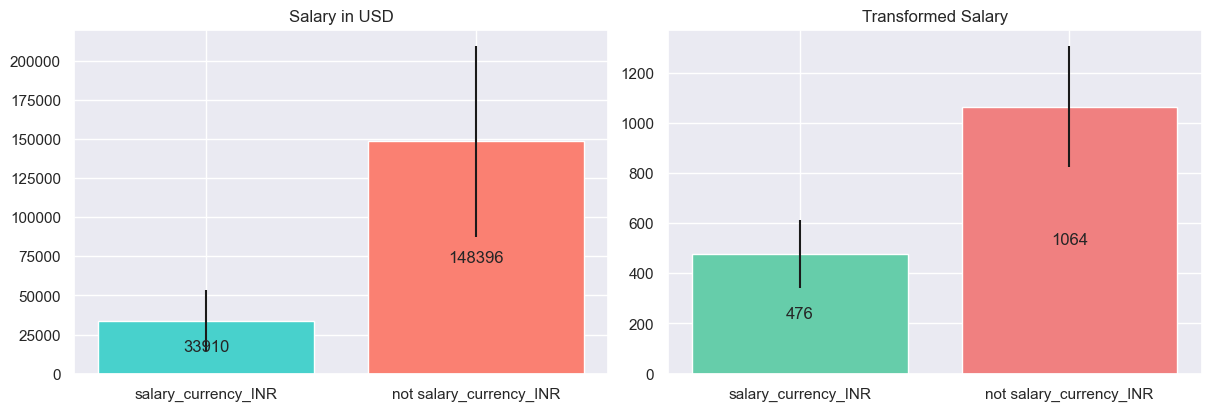

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_PLN                                                    
0                          148052  61134  14381               1062  244
1                           36295  11609      6                505   93

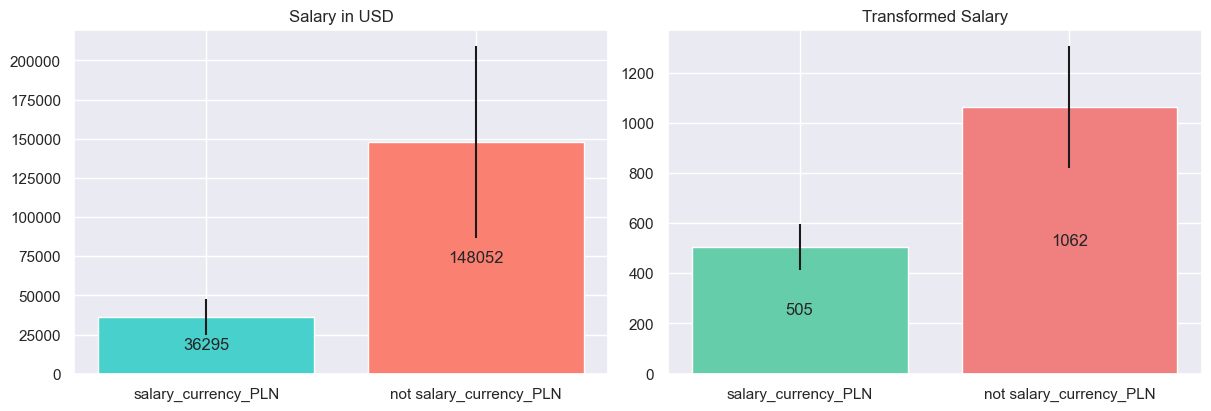

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_USD                                                    
0                           72155  37366   1063                718  188
1                          154057  58588  13324               1089  226

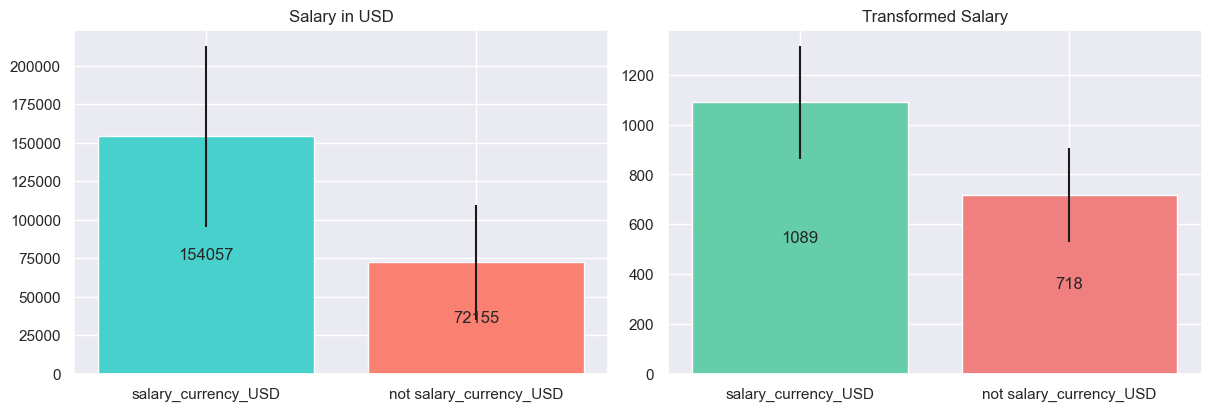

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AR                                                    
0                            148071  61139  14376               1062  244
1                             62272  18504     11                675  111

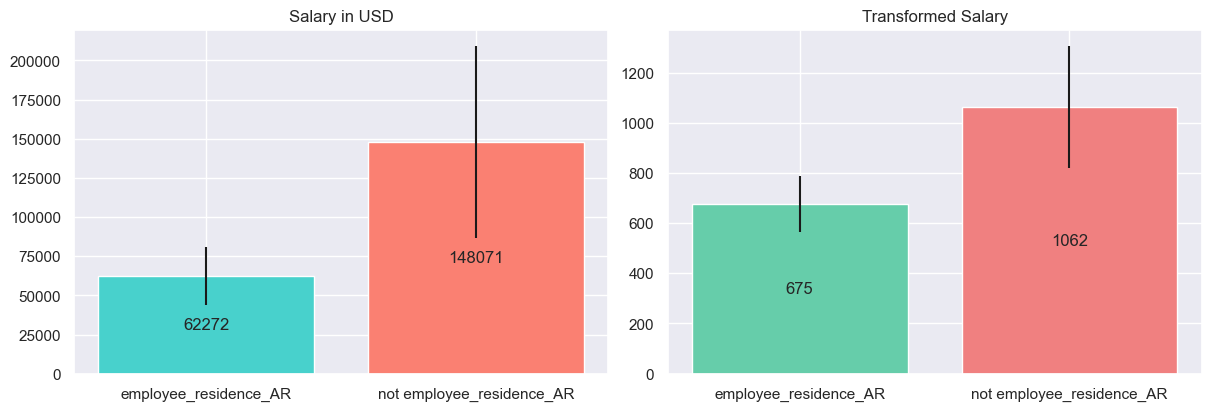

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AT                                                    
0                            148061  61148  14377               1062  244
1                             68378  15101     10                714   85

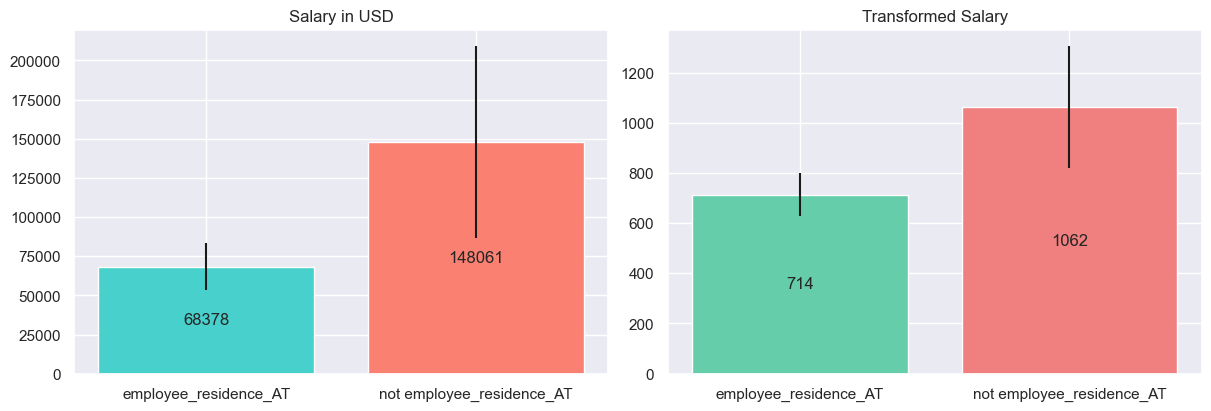

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AU                                                    
0                            148046  61118  14339               1062  244
1                            135952  73275     48               1002  292

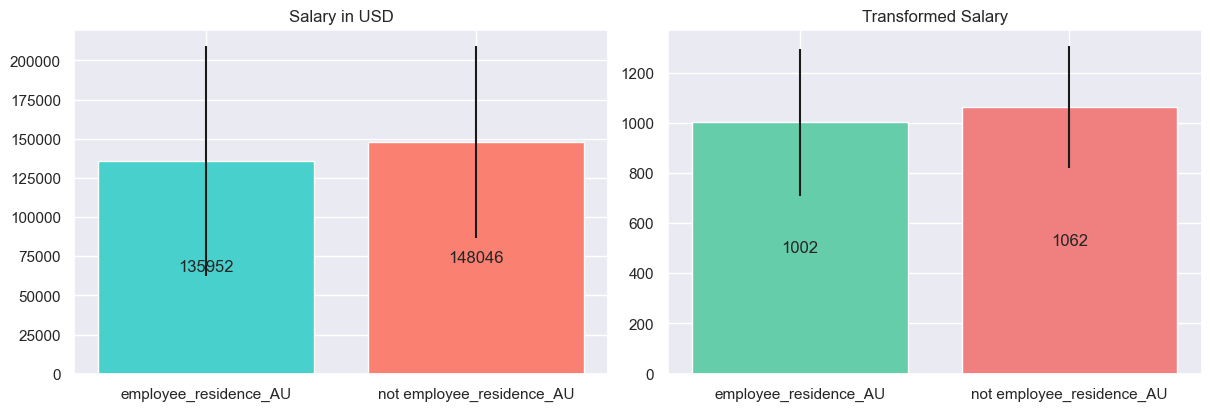

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_BR                                                    
0                            148108  61127  14368               1062  244
1                             70263  33412     19                710  179

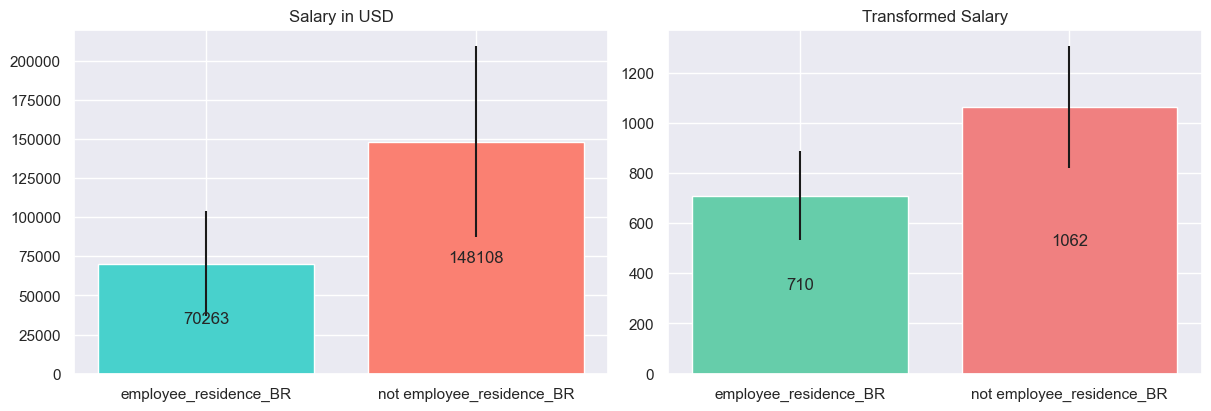

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CA                                                    
0                            148099  61229  14010               1062  244
1                            144549  58649    377               1051  230

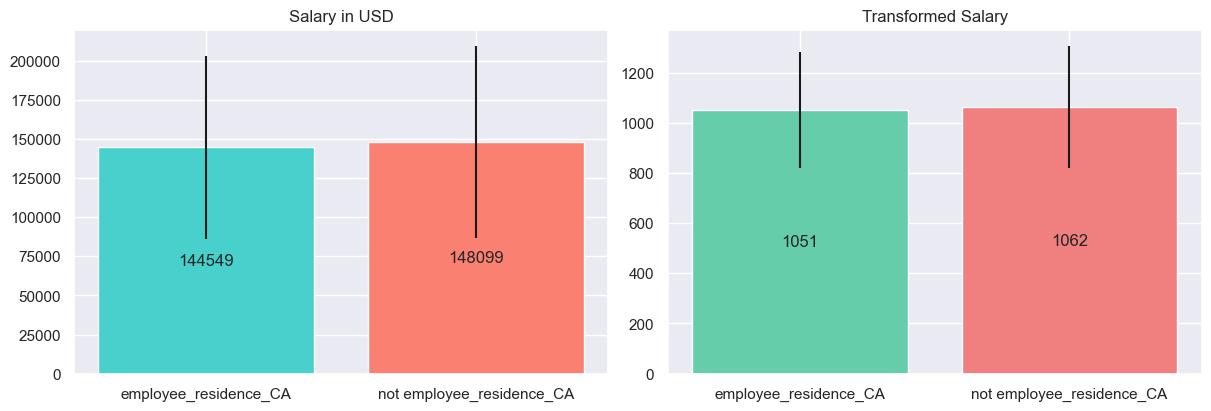

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CH                                                    
0                            148011  61153  14380               1062  244
1                            137305  85486      7               1009  307

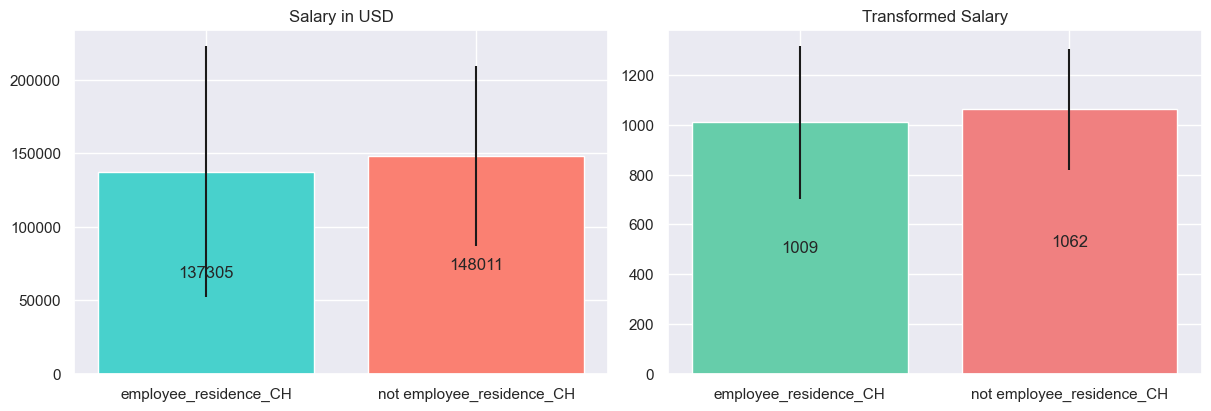

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CO                                                    
0                            148082  61147  14371               1062  244
1                             79115  30019     16                762  162

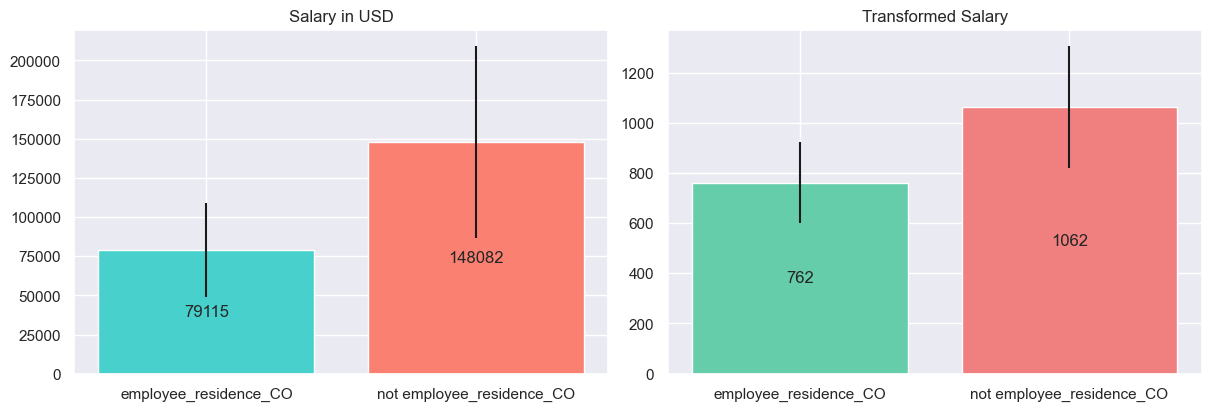

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_DE                                                    
0                            148310  61078  14299               1063  243
1                             98470  54835     88                843  243

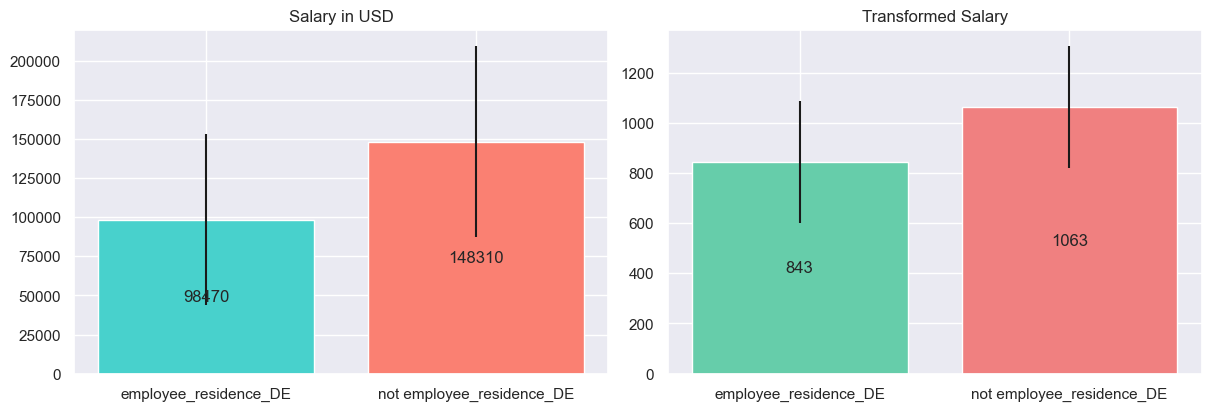

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EE                                                    
0                            148085  61119  14376               1062  243
1                             43941   8749     11                564   60

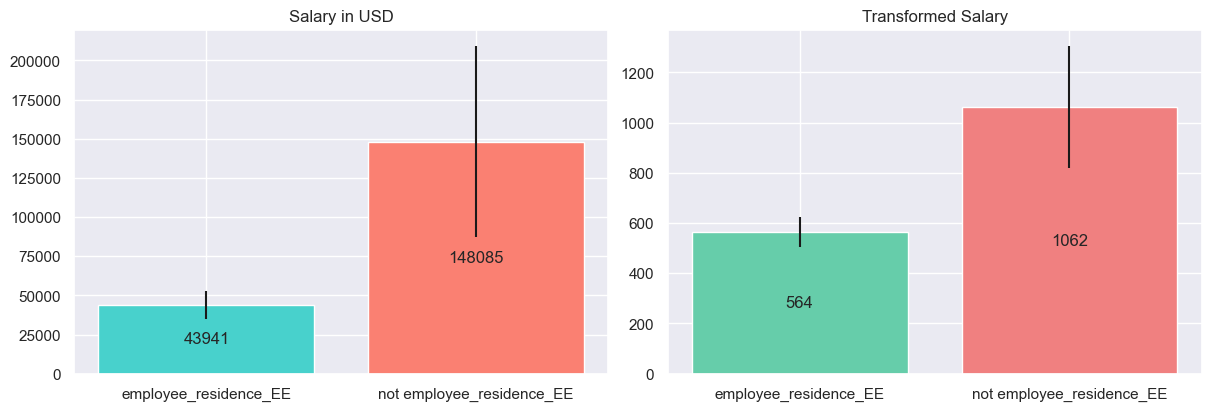

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EG                                                    
0                            148018  61156  14373               1062  244
1                            135807  70464     14               1000  303

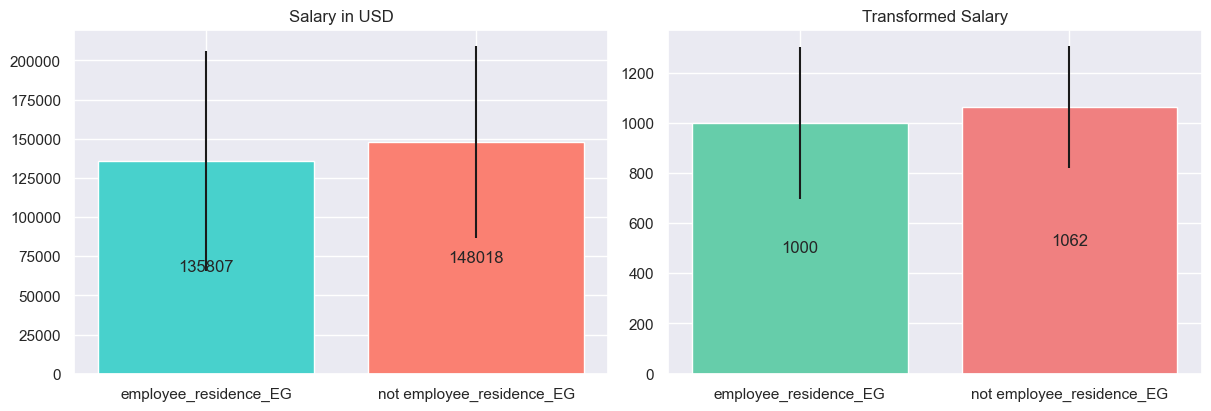

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ES                                                    
0                            148808  60746  14259               1065  241
1                             58668  36987    128                640  178

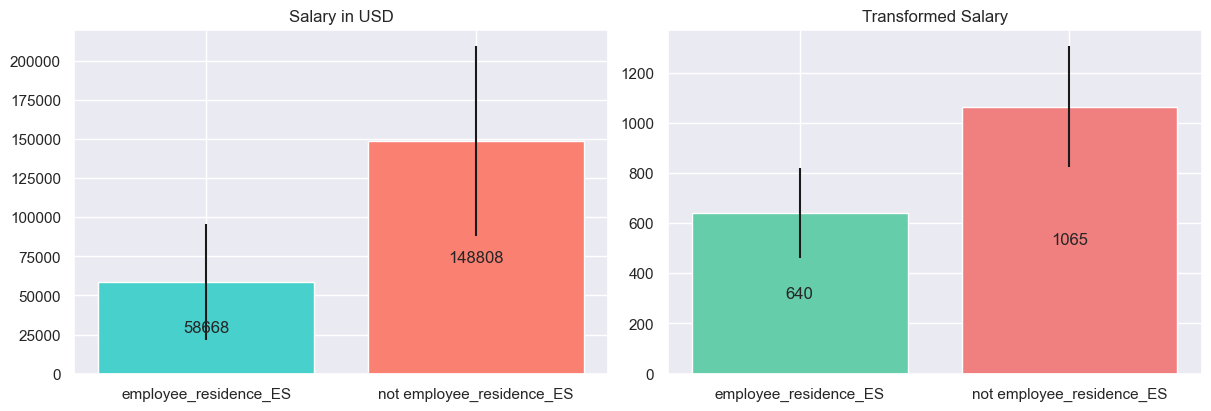

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_FR                                                    
0                            148280  61029  14323               1063  243
1                             86612  60853     64                778  263

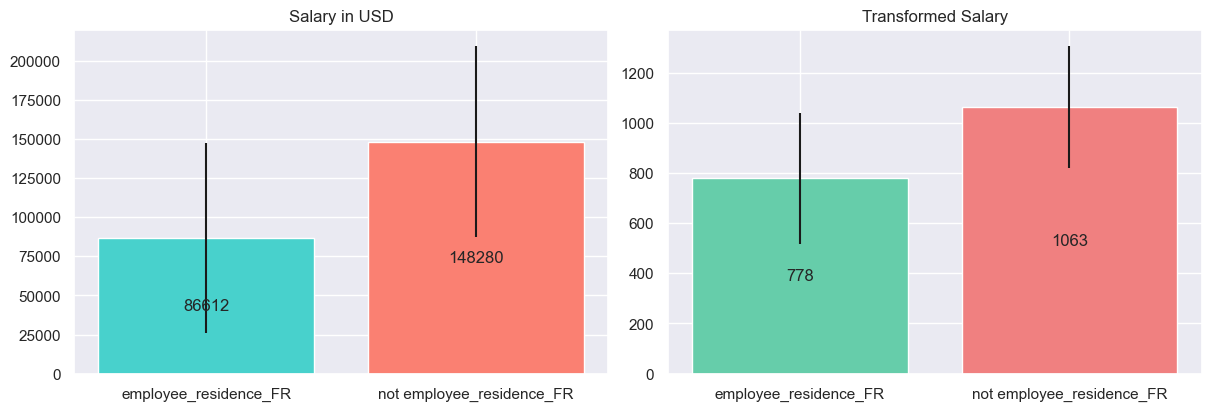

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GB                                                    
0                            150545  60427  13754               1073  239
1                             92835  50075    633                819  226

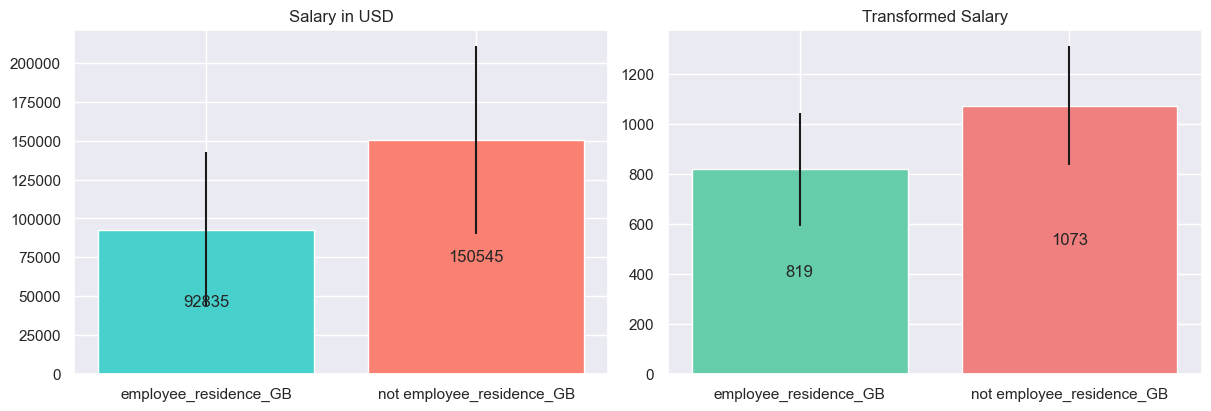

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GR                                                    
0                            148113  61109  14371               1062  243
1                             51692  21262     16                604  142

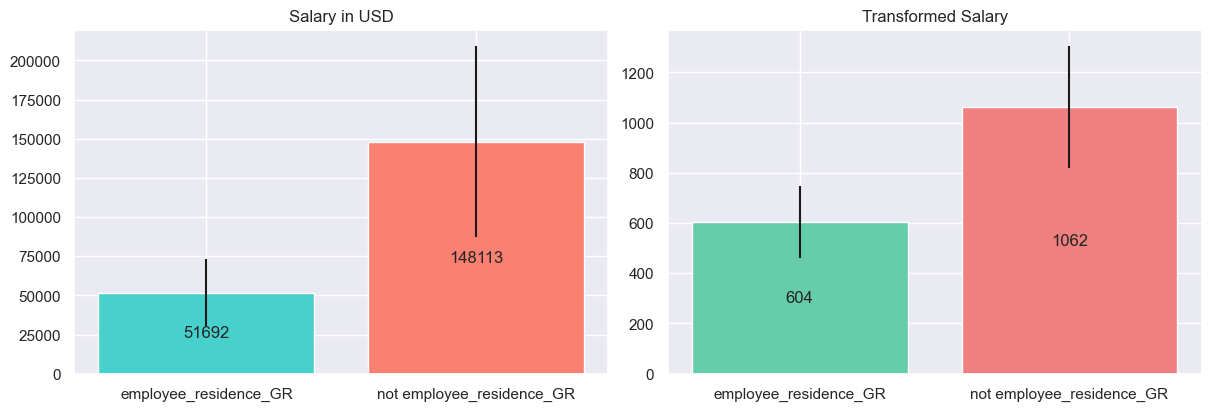

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IE                                                    
0                            148042  61169  14375               1062  244
1                            104694  33896     12                892  147

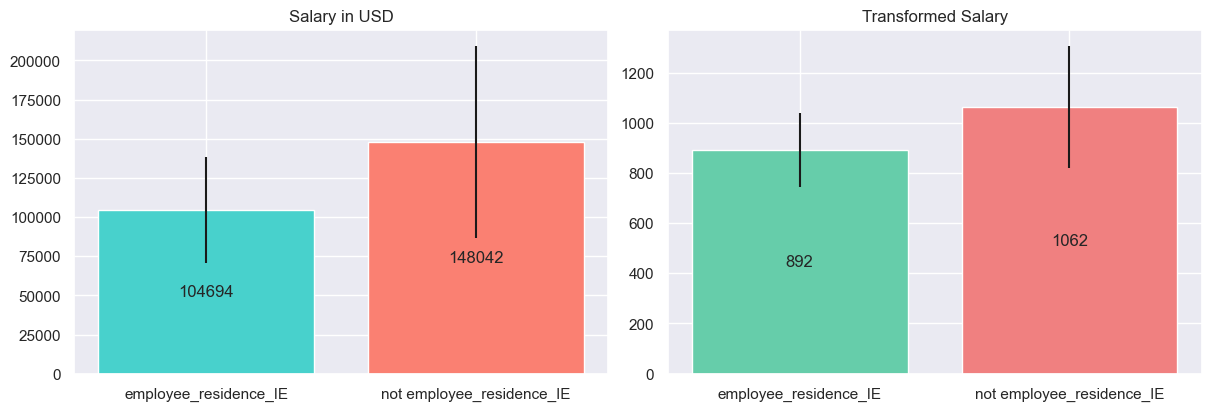

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IN                                                    
0                            148470  60860  14321               1064  241
1                             47248  39994     66                551  226

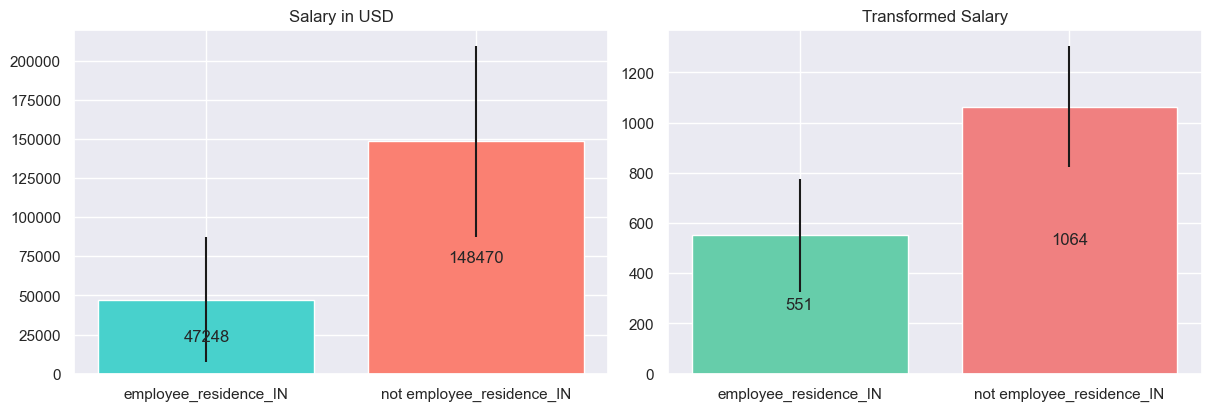

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IT                                                    
0                            148142  61094  14366               1062  243
1                             54867  30538     21                617  176

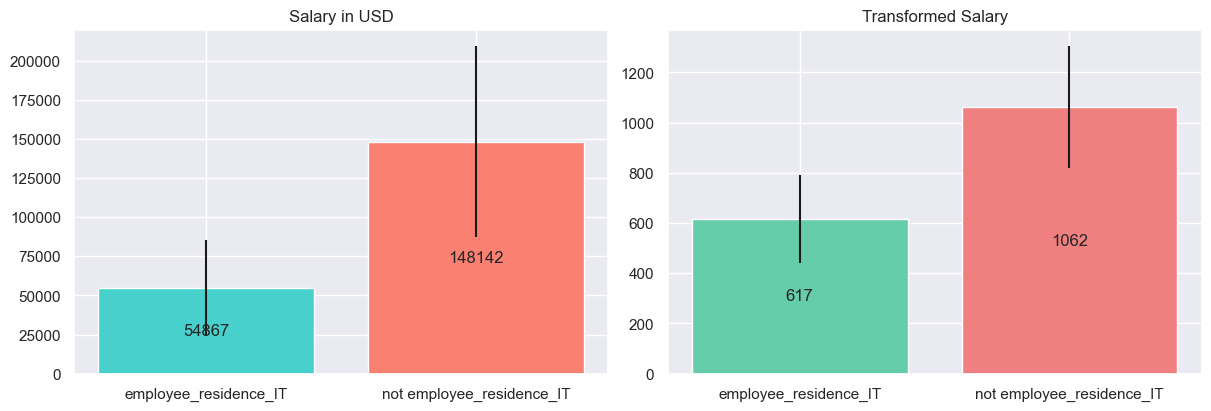

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LT                                                    
0                            148094  61133  14371               1062  244
1                             68553  29287     16                704  159

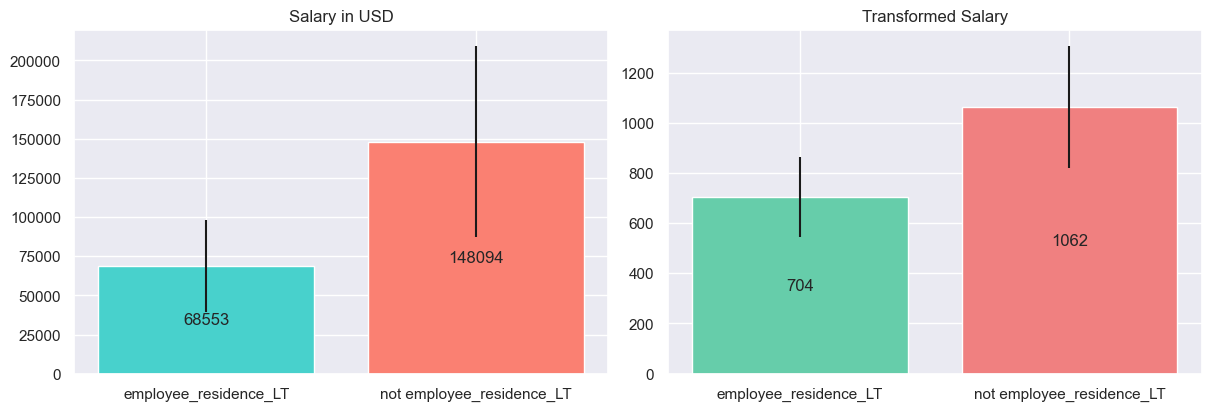

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LV                                                    
0                            148096  61121  14373               1062  243
1                             54734  19875     14                628  120

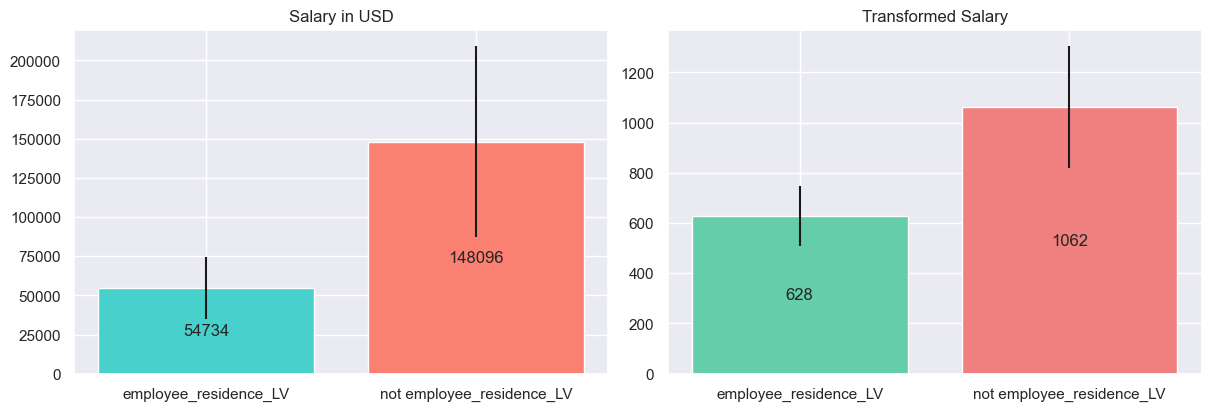

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_MX                                                    
0                            148055  61132  14375               1062  244
1                             89258  72868     12                768  346

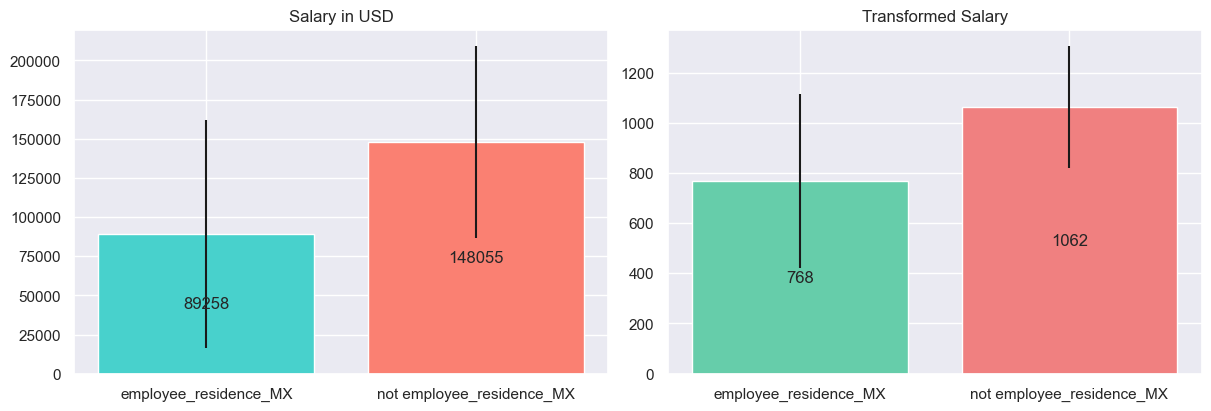

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NG                                                    
0                            148085  61112  14375               1062  243
1                             52416  49059     12                582  250

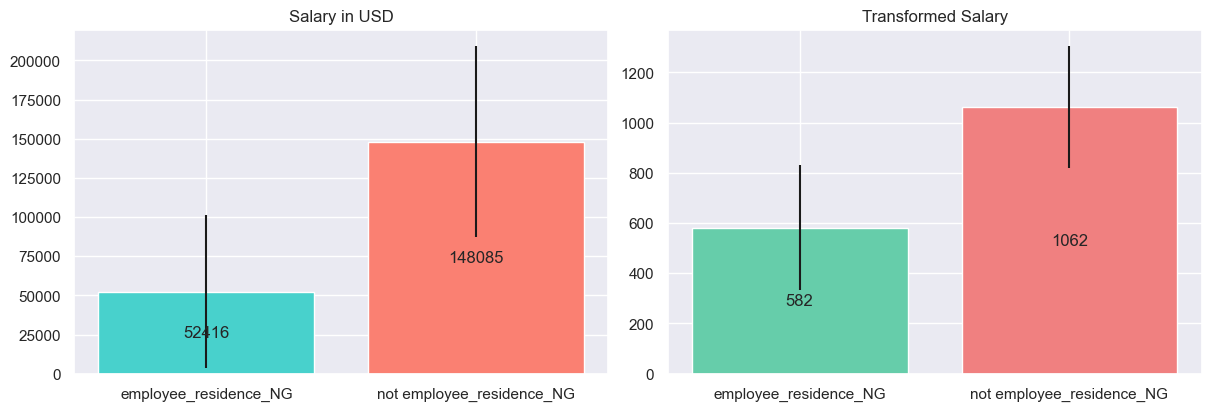

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NL                                                    
0                            148145  61130  14359               1062  244
1                             76752  28581     28                751  151

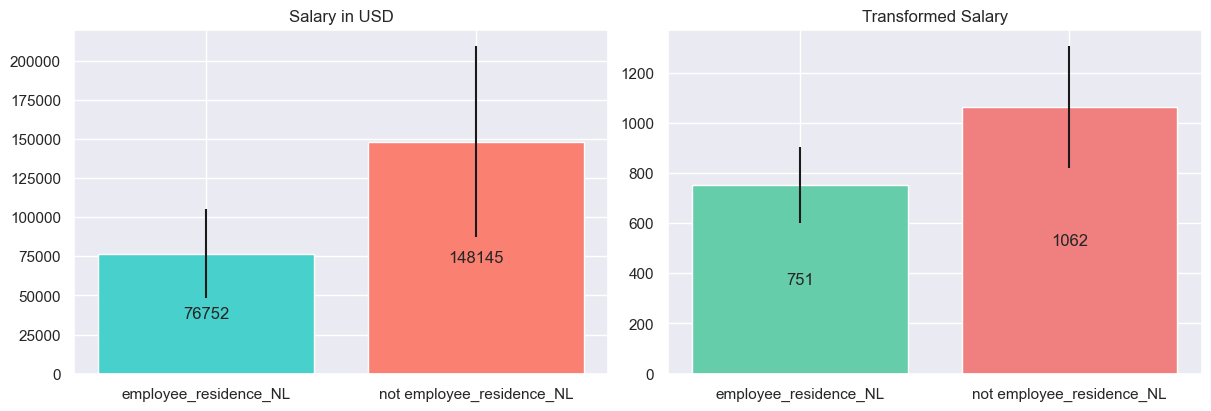

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NZ                                                    
0                            148004  61171  14382               1062  244
1                            152218  35137      5               1097  132

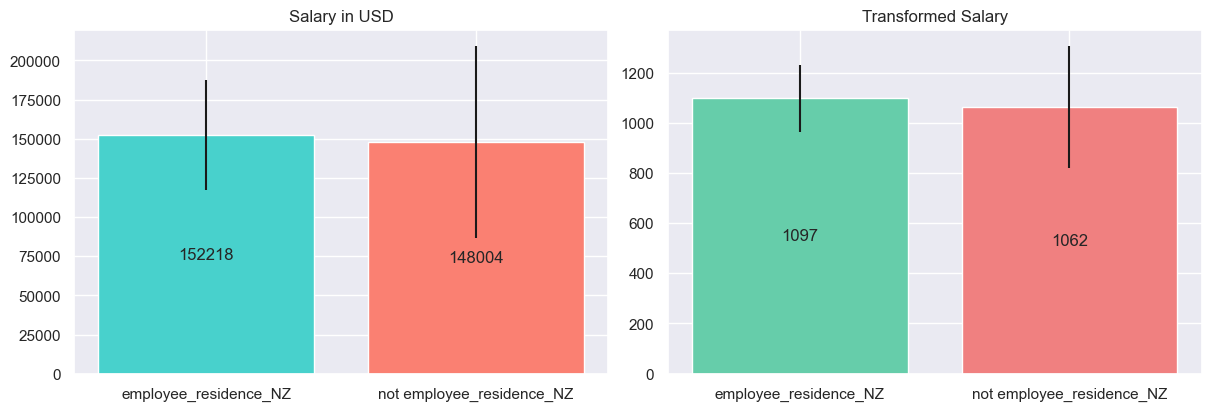

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PH                                                    
0                            148053  61139  14380               1062  244
1                             51337  24241      7                601  152

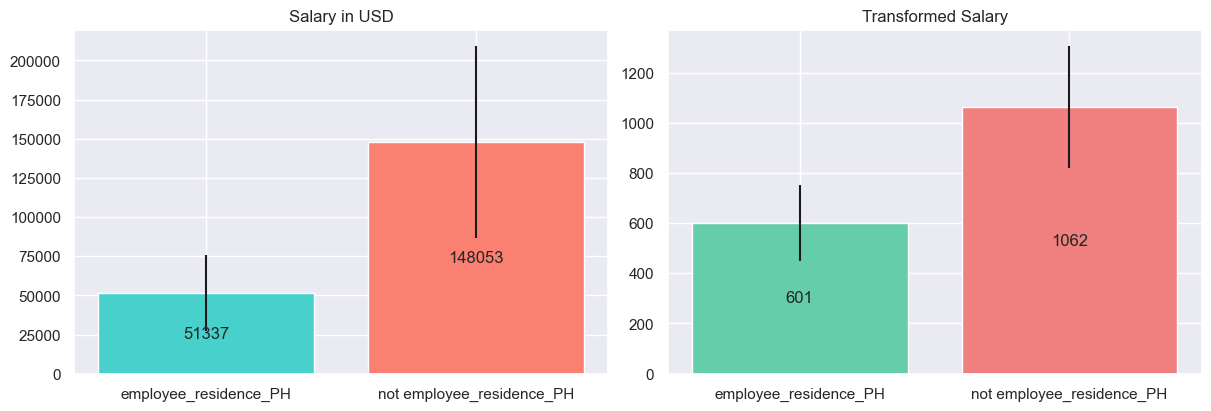

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PL                                                    
0                            148073  61133  14373               1062  244
1                             79055  54735     14                736  275

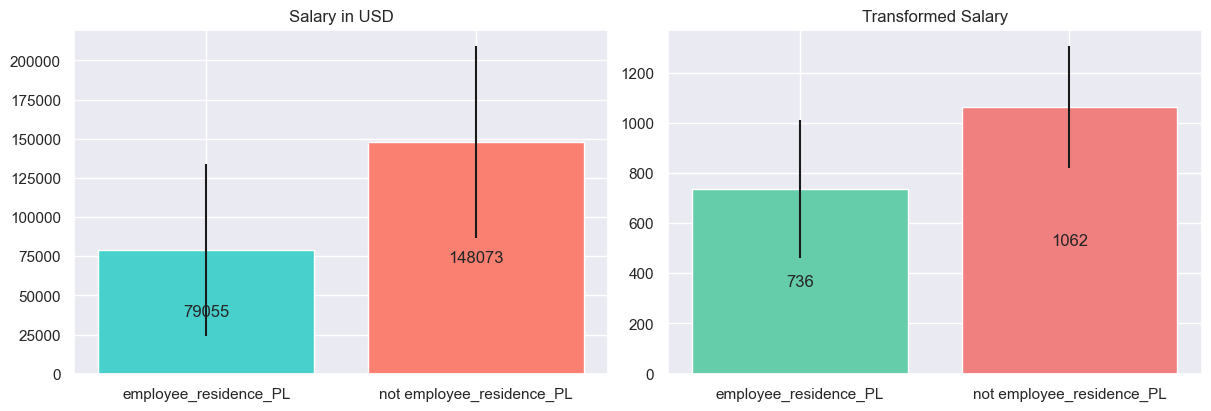

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PT                                                    
0                            148202  61063  14357               1063  243
1                             53920  28464     30                613  167

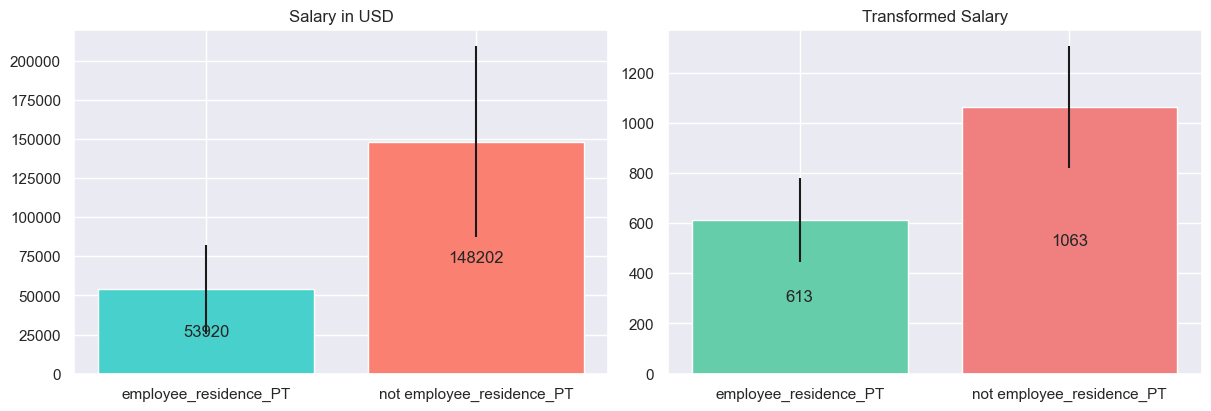

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_SI                                                    
0                            148044  61145  14381               1062  244
1                             56186  28245      6                630  169

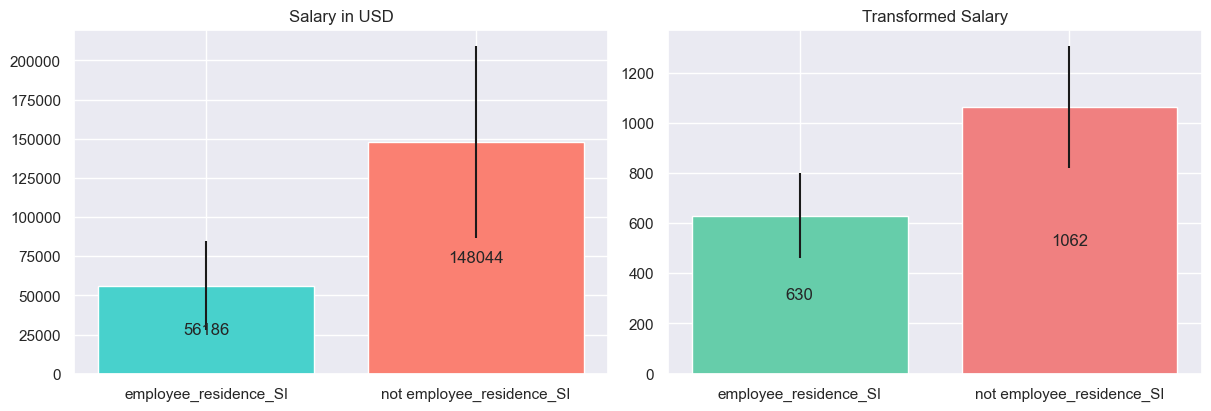

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_UA                                                    
0                            148044  61143  14376               1062  244
1                             98272  71246     11                826  316

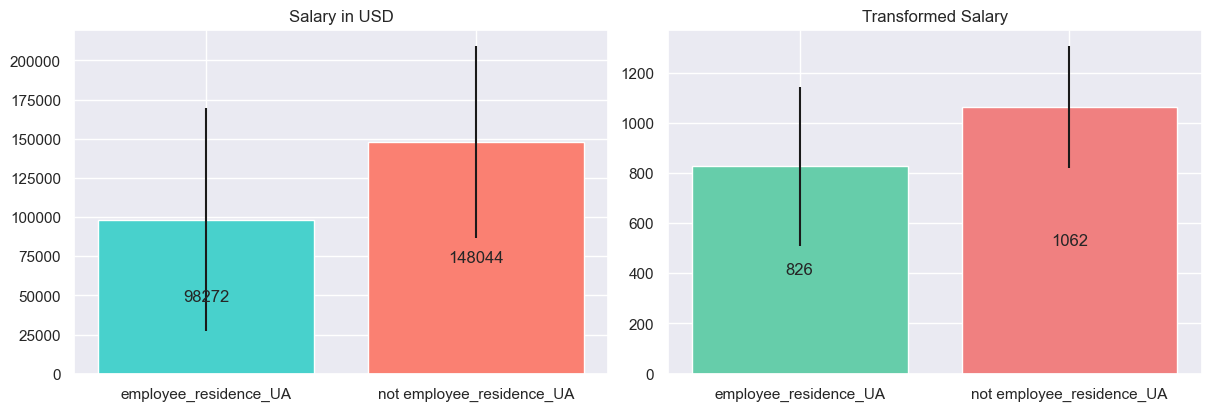

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_US                                                    
0                             97632  59312   1710                832  267
1                            154801  58163  12677               1093  223

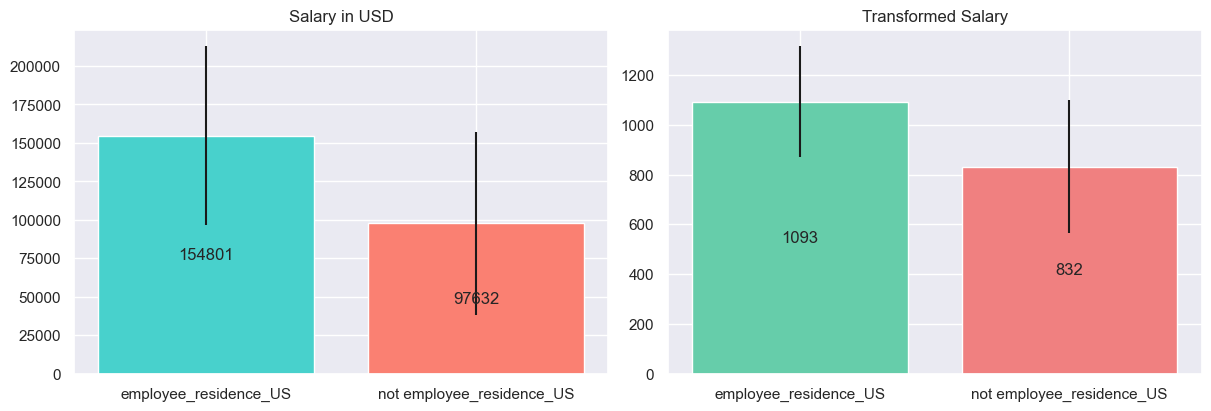

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ZA                                                    
0                            148094  61124  14373               1062  244
1                             57308  24142     14                641  136

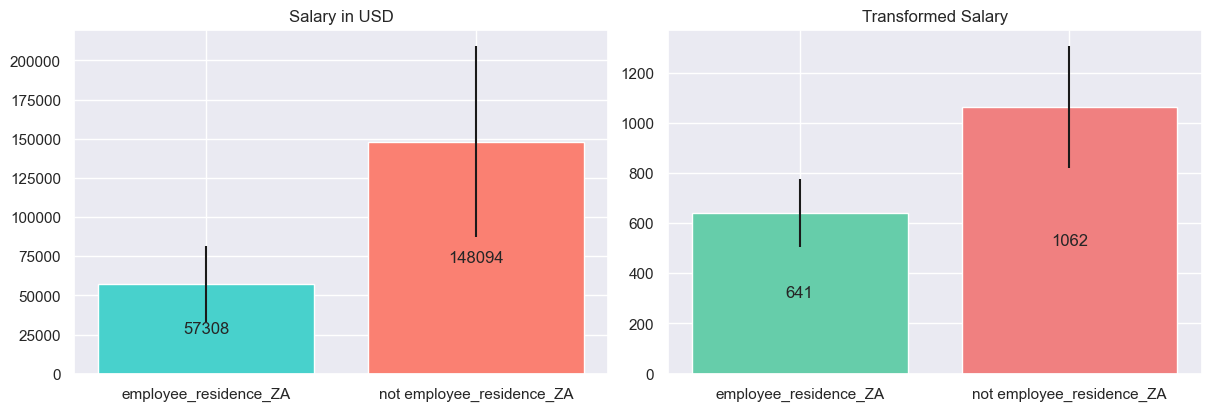

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
remote_ratio_Hybrid                                                    
0                          148921  60767  14191               1066  241
1                           81714  52930    196                753  255

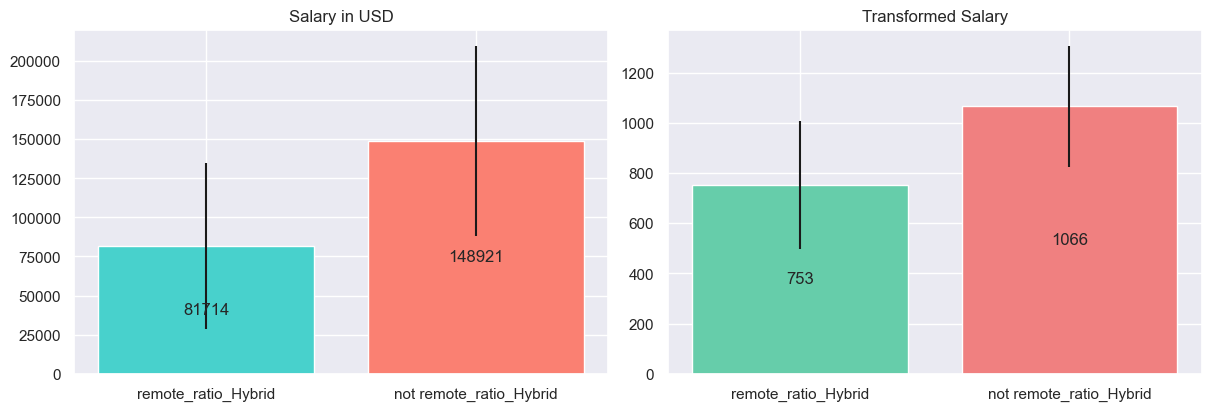

salary_in_usd              transformed_salary     
                              mean    std count               mean  std
remote_ratio_On_Site                                                   
0                           142338  58766  4793               1039  242
1                           150837  62137  9594               1073  244

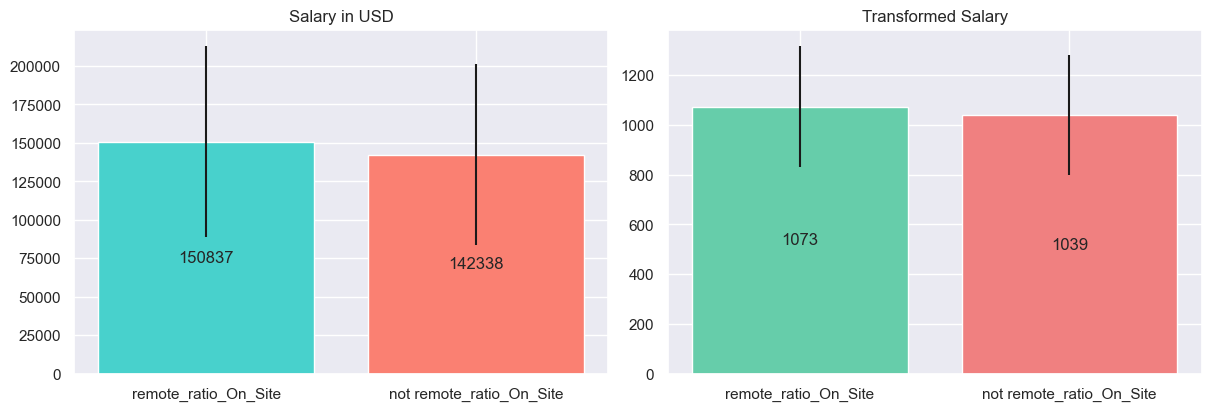

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
remote_ratio_Remote                                                   
0                          149453  62715  9790               1067  248
1                          144923  57606  4597               1051  234

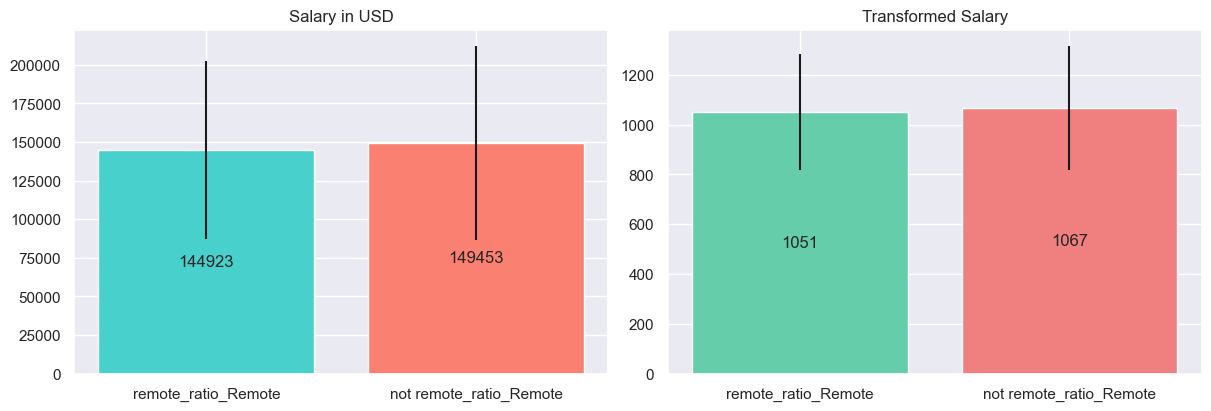

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AR                                                    
0                          148044  61153  14380               1062  244
1                           69571  17299      7                719   98

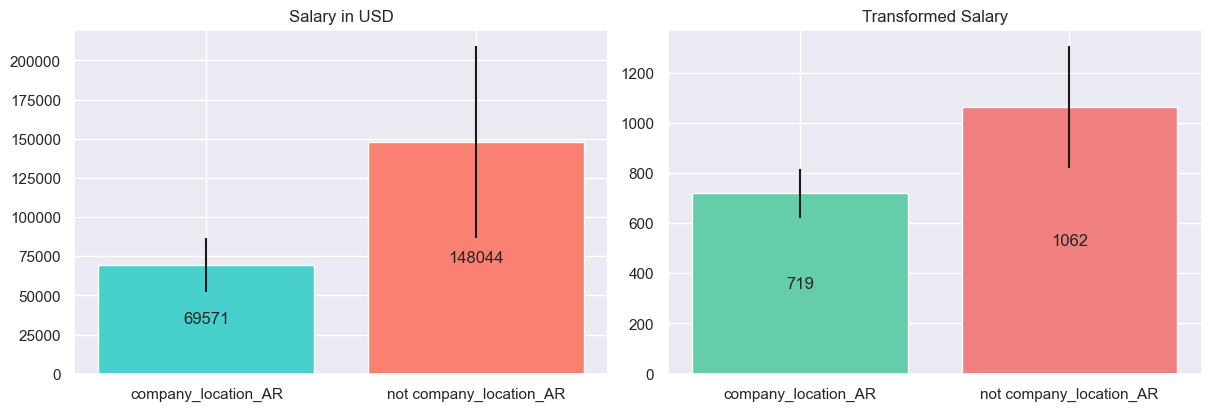

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AT                                                    
0                          148061  61148  14377               1062  244
1                           68479  15045     10                714   84

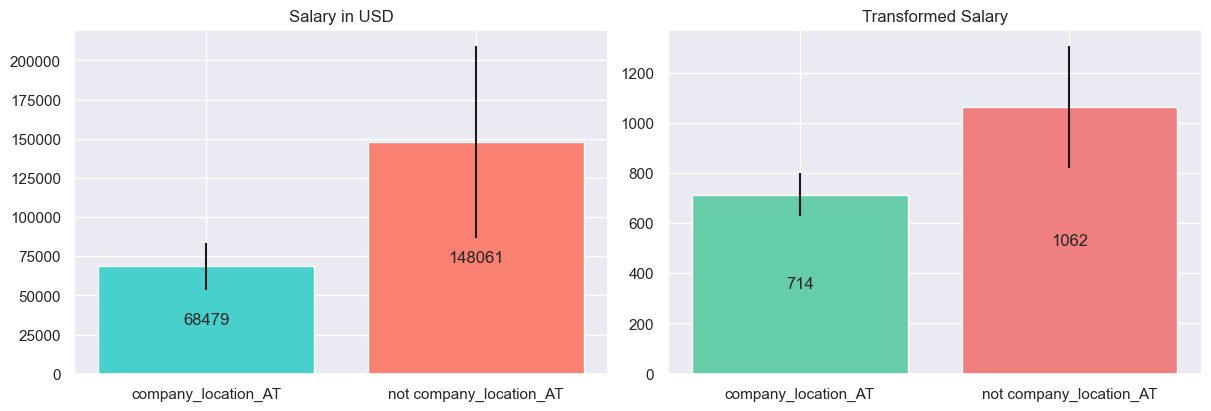

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AU                                                    
0                          148051  61117  14337               1062  244
1                          134934  72972     50                997  293

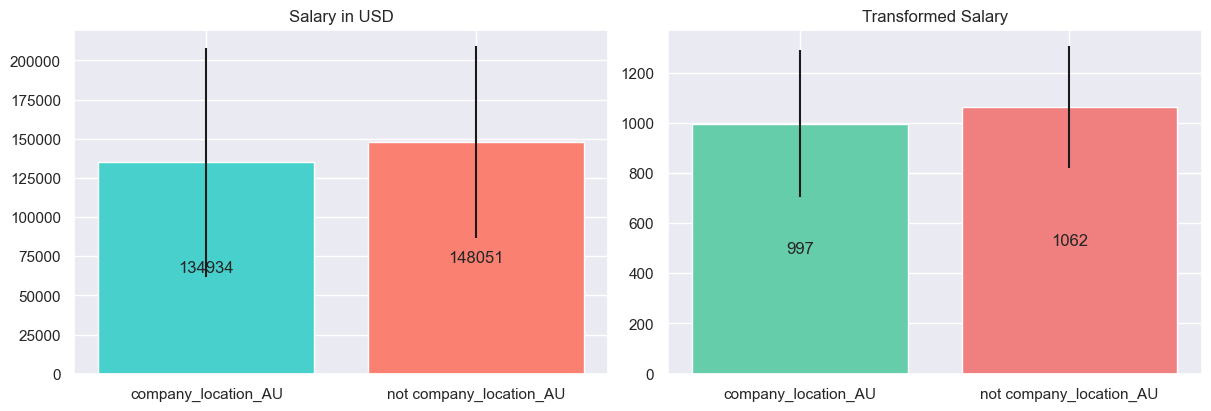

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_BR                                                    
0                          148106  61124  14370               1062  244
1                           63235  25395     17                675  148

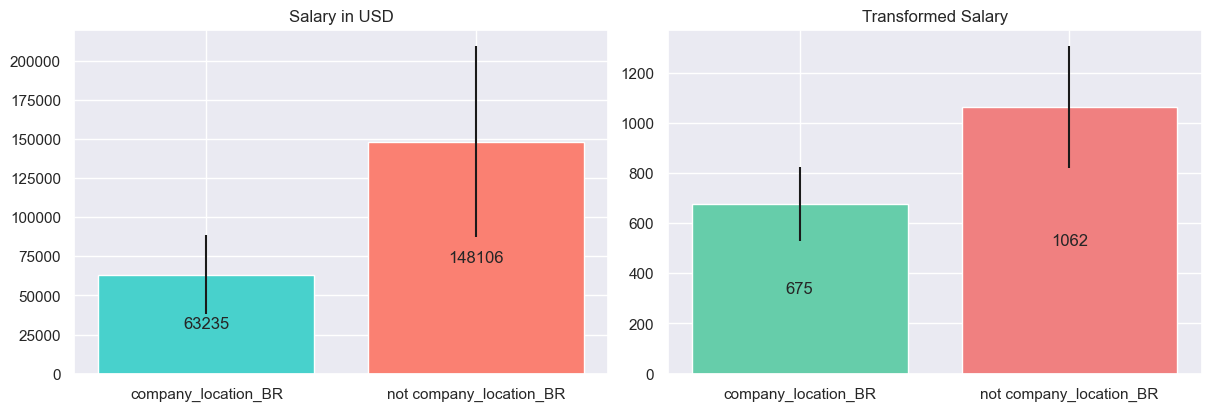

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CA                                                    
0                          148107  61214  14008               1062  244
1                          144244  59232    379               1049  234

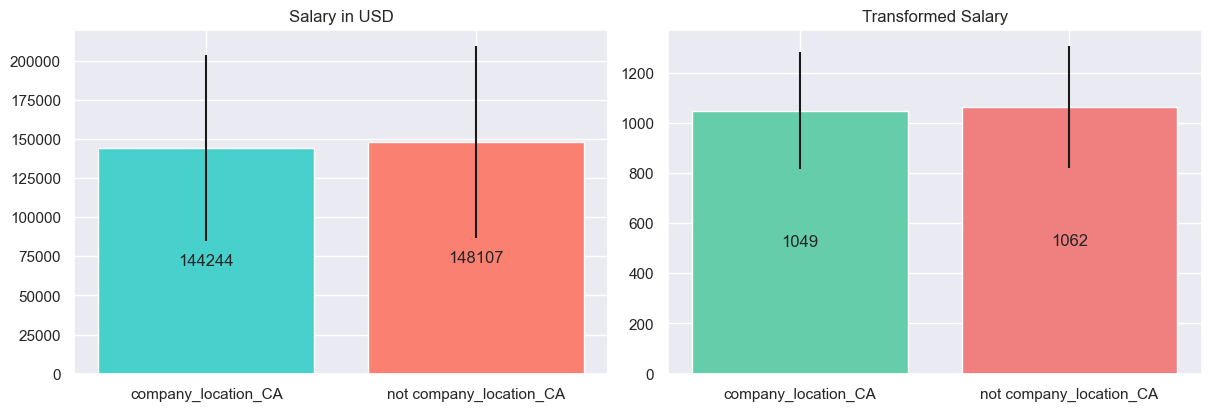

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CH                                                    
0                          148019  61147  14379               1062  244
1                          123182  88654      8                935  354

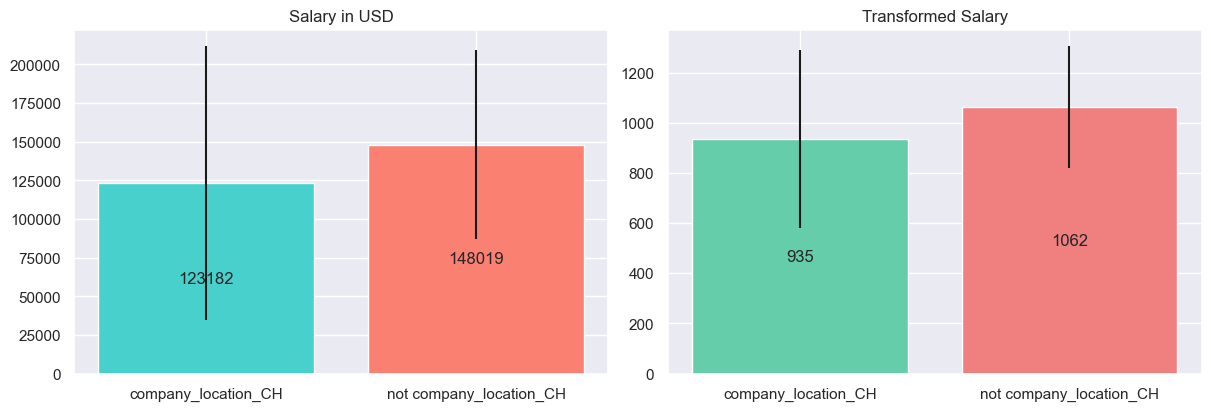

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CO                                                    
0                          148082  61147  14371               1062  244
1                           79115  30019     16                762  162

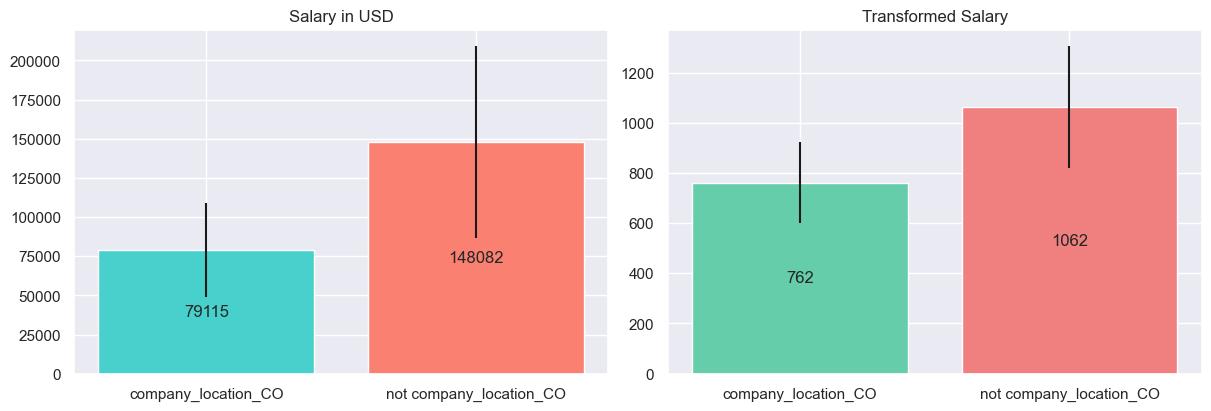

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_DE                                                    
0                          148346  61055  14295               1063  243
1                           95050  54872     92                826  245

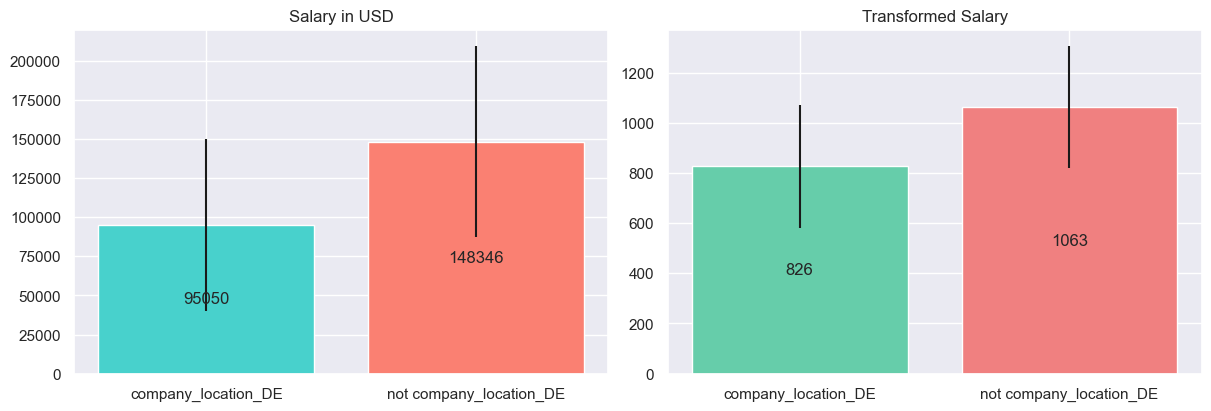

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EE                                                    
0                          148085  61119  14376               1062  243
1                           43941   8749     11                564   60

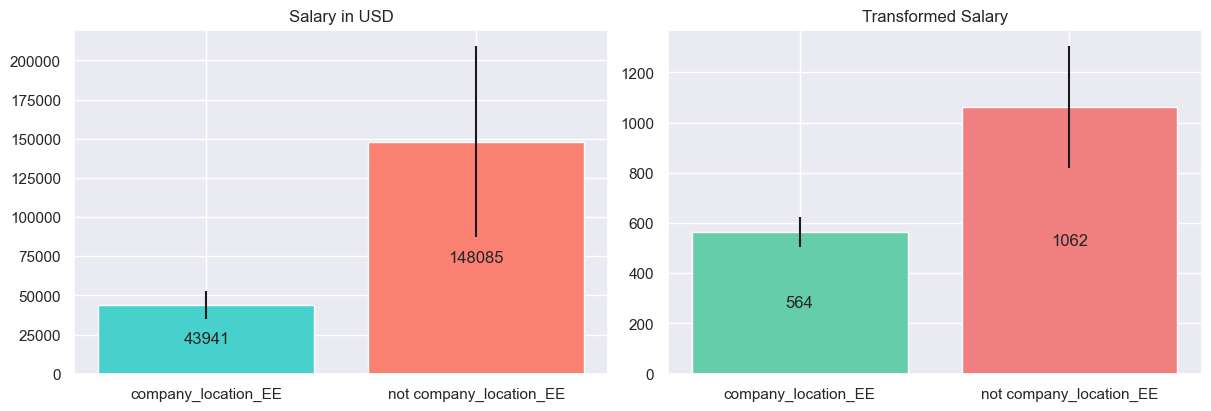

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EG                                                    
0                          148012  61157  14374               1062  244
1                          140869  70642     13               1021  305

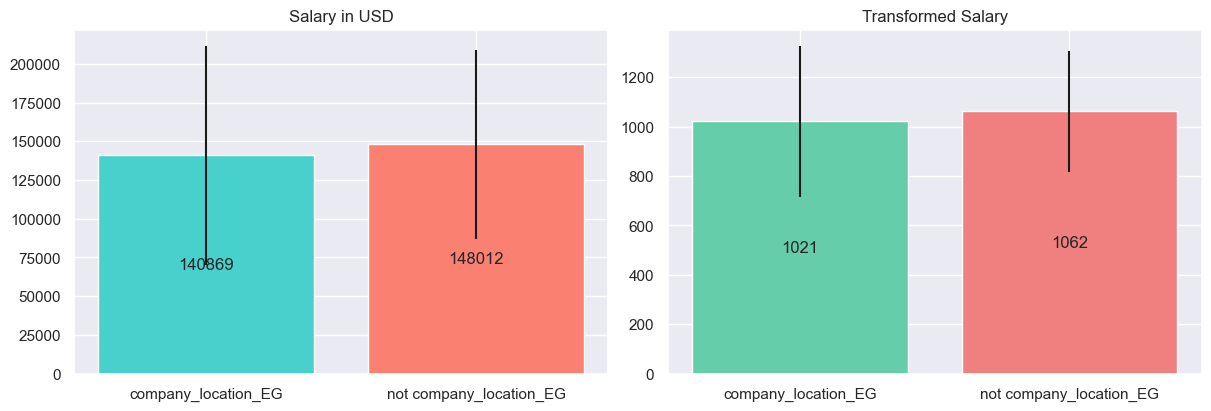

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ES                                                    
0                          148810  60743  14261               1065  241
1                           56932  34523    126                632  167

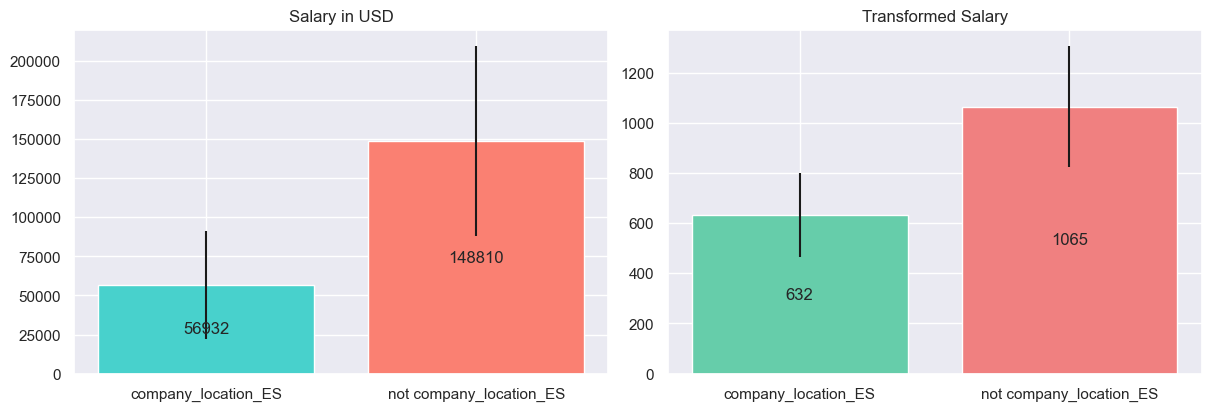

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_FR                                                    
0                          148264  61055  14328               1063  243
1                           85337  55472     59                774  251

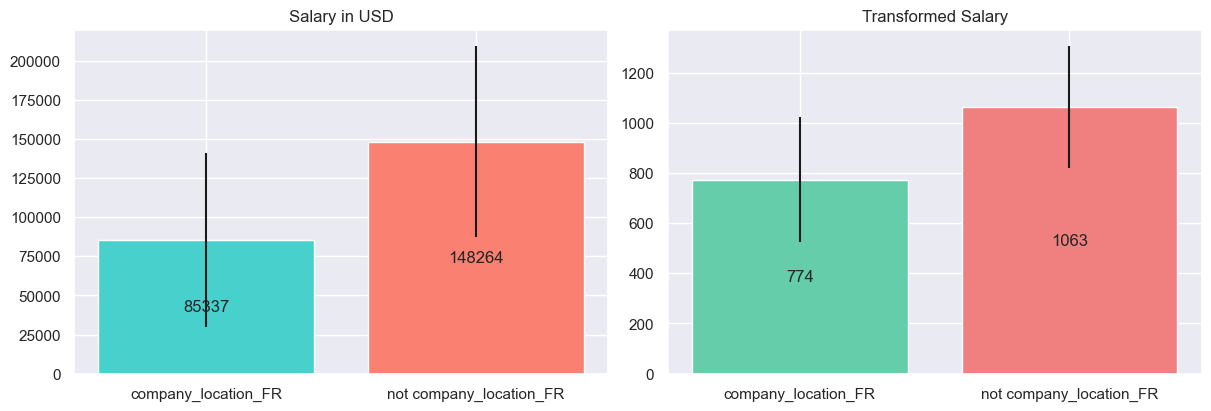

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GB                                                    
0                          150574  60416  13749               1073  239
1                           92665  49987    638                818  226

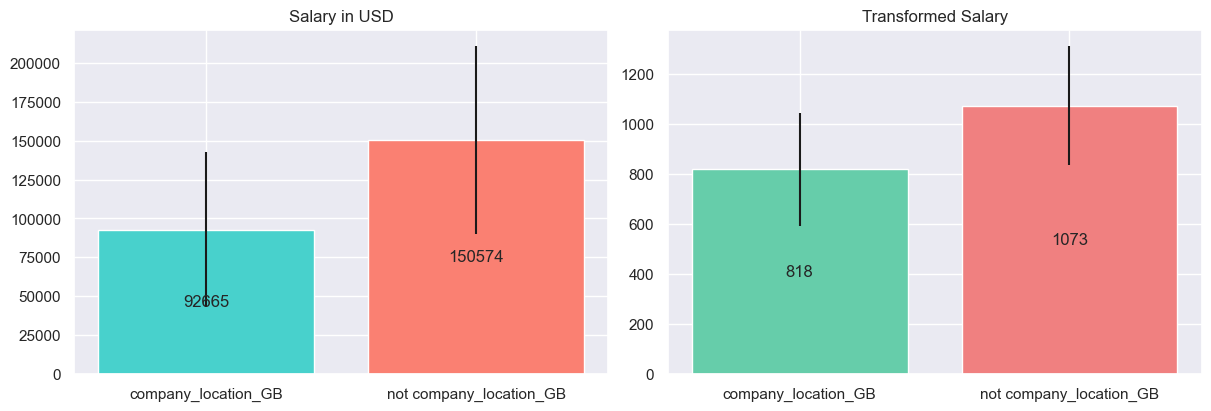

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GR                                                    
0                          148099  61117  14373               1062  243
1                           52260  21279     14                608  141

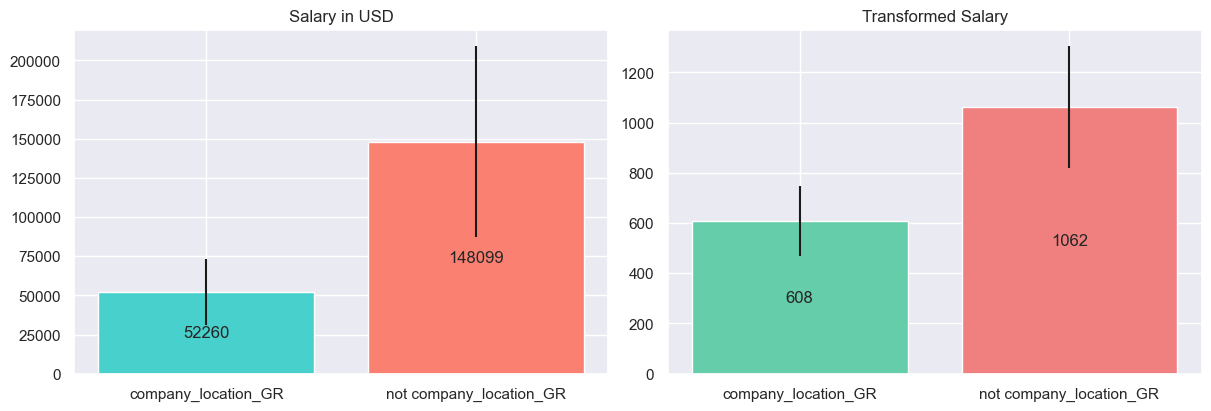

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IE                                                    
0                          148042  61169  14375               1062  244
1                          104694  33896     12                892  147

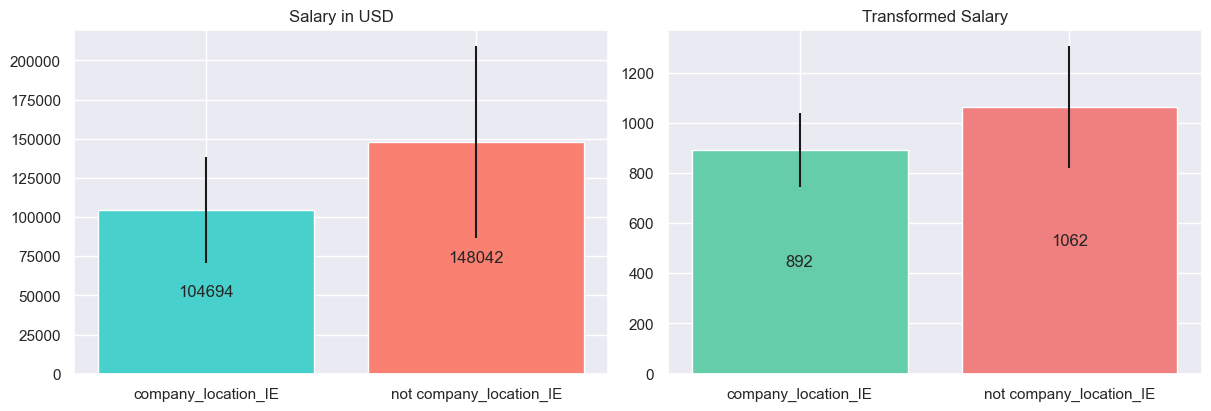

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IN                                                    
0                          148430  60876  14330               1064  241
1                           41360  34229     57                515  203

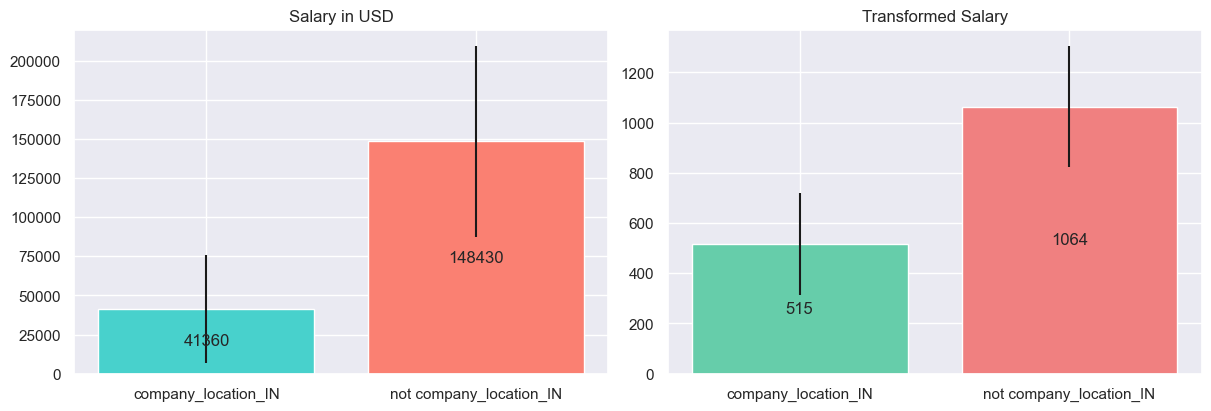

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IT                                                    
0                          148101  61114  14373               1062  243
1                           49600  18169     14                593  125

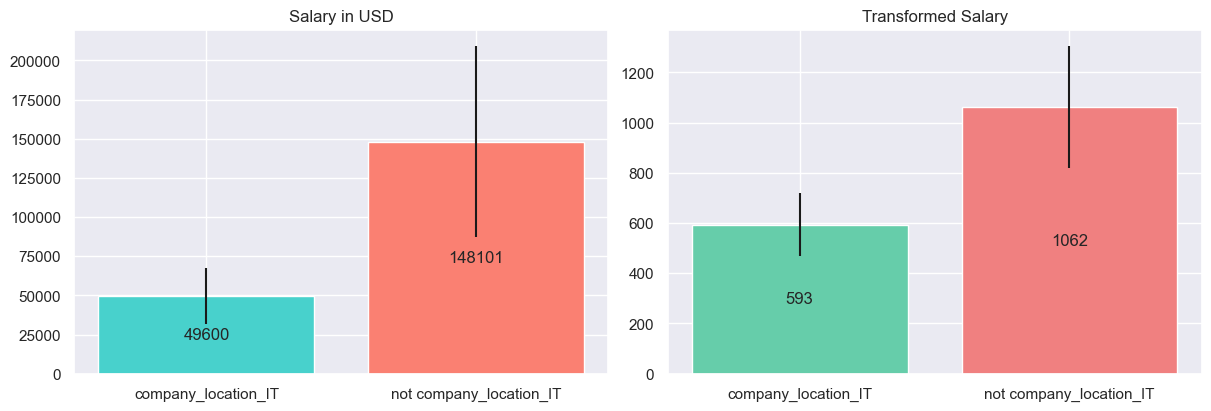

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LT                                                    
0                          148094  61133  14371               1062  244
1                           68553  29287     16                704  159

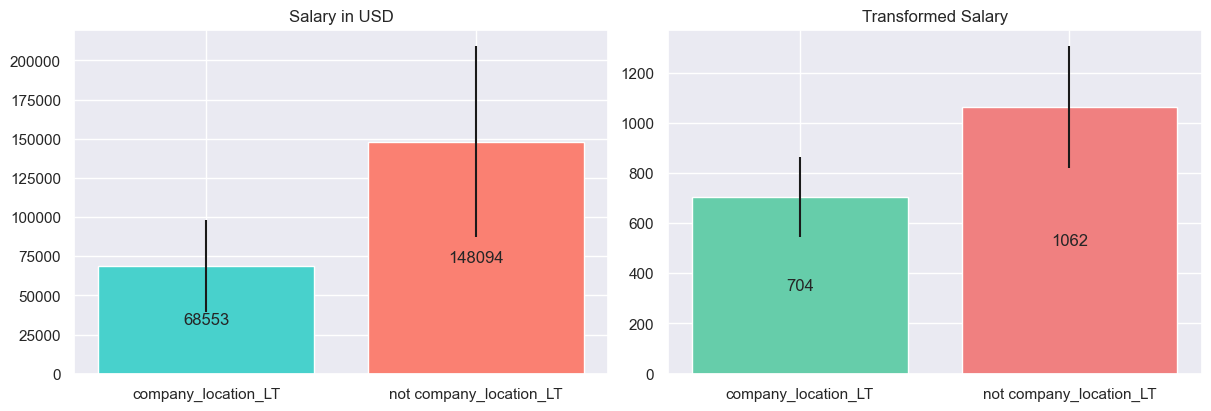

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LV                                                    
0                          148096  61121  14373               1062  243
1                           54734  19875     14                628  120

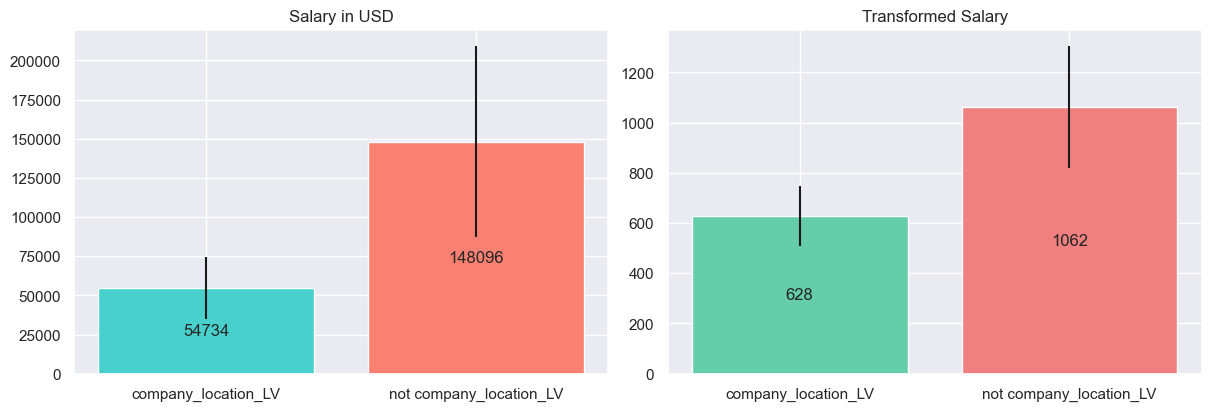

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_MX                                                    
0                          148061  61130  14374               1062  244
1                           87007  70236     13                761  332

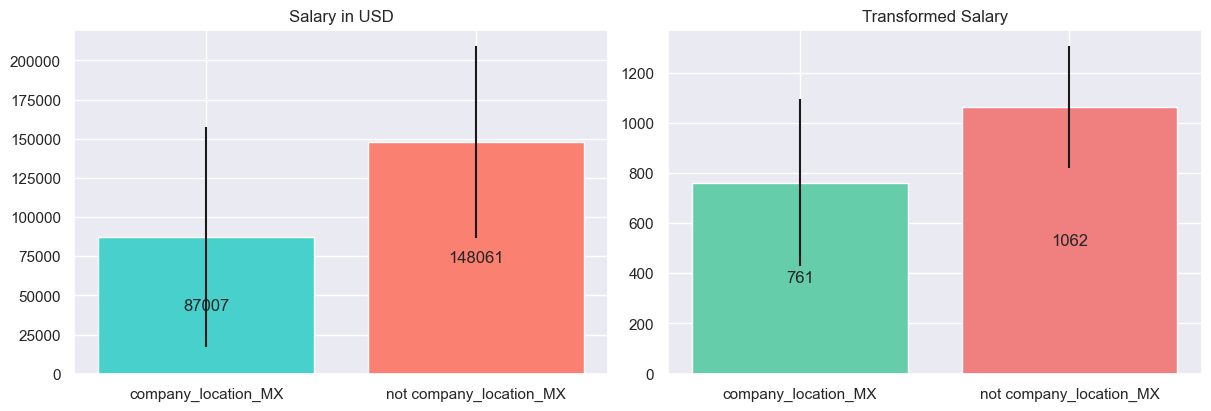

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NG                                                    
0                          148060  61130  14378               1062  244
1                           60444  54127      9                632  262

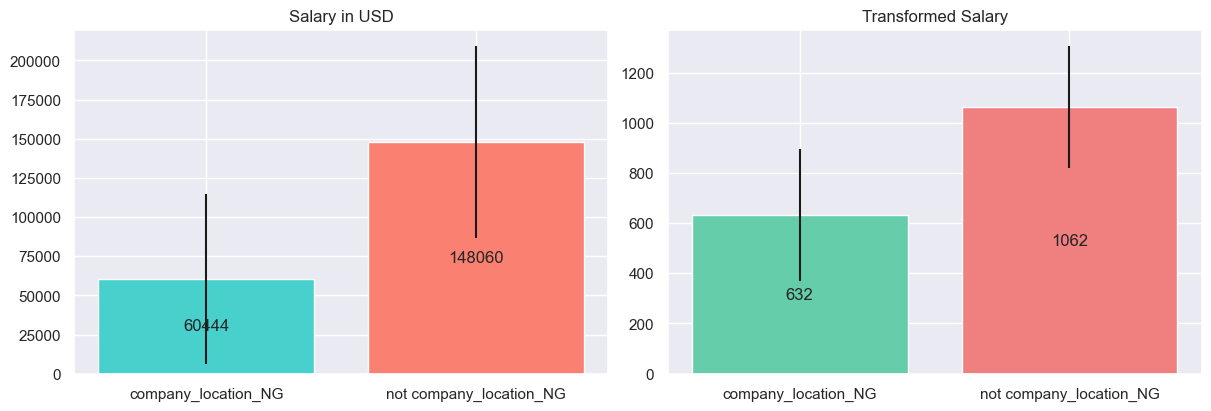

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NL                                                    
0                          148146  61127  14359               1062  244
1                           76171  30171     28                746  163

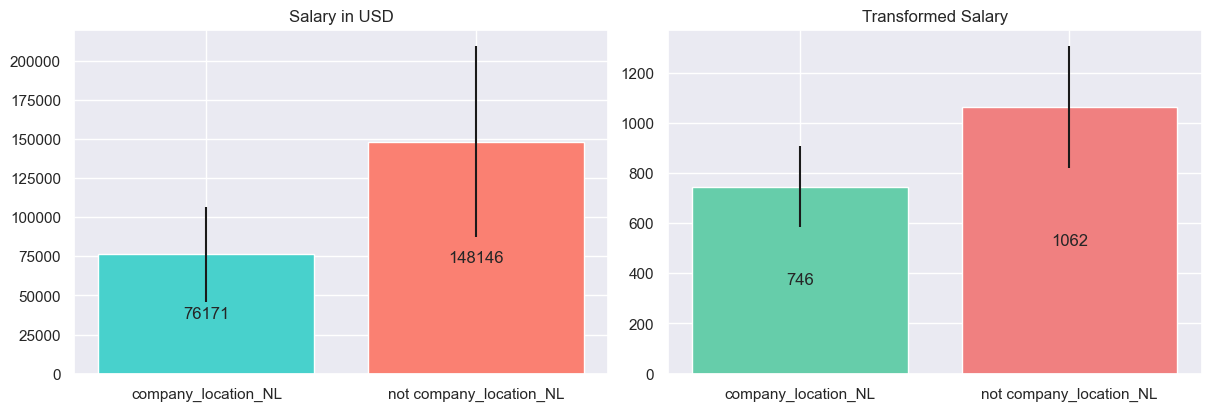

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NZ                                                    
0                          148004  61171  14382               1062  244
1                          152218  35137      5               1097  132

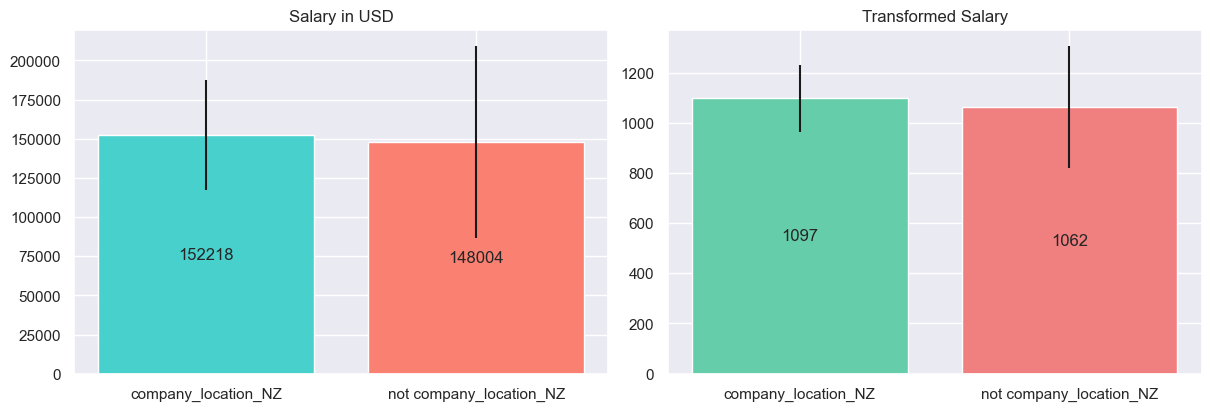

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PH                                                    
0                          148038  61148  14382               1062  244
1                           55720  27981      5                626  177

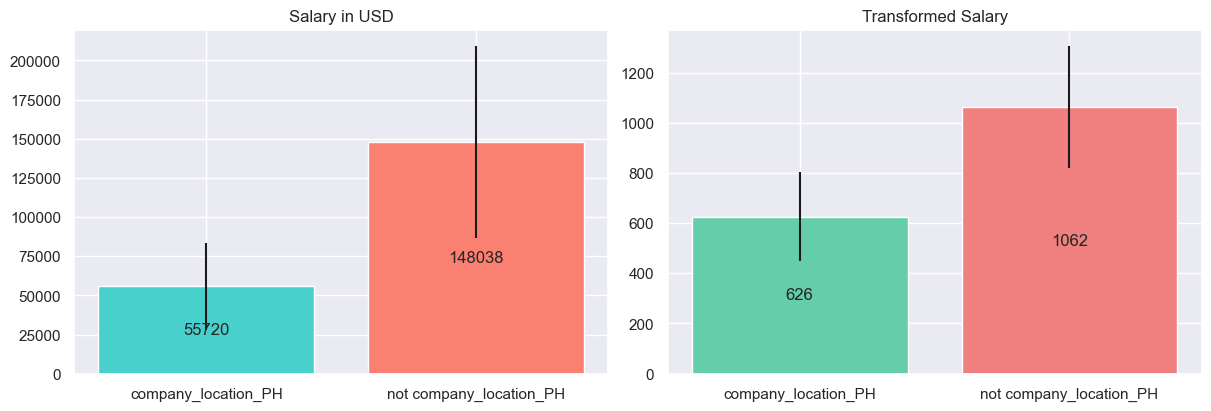

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PL                                                    
0                          148061  61142  14374               1062  244
1                           86787  56866     13                778  275

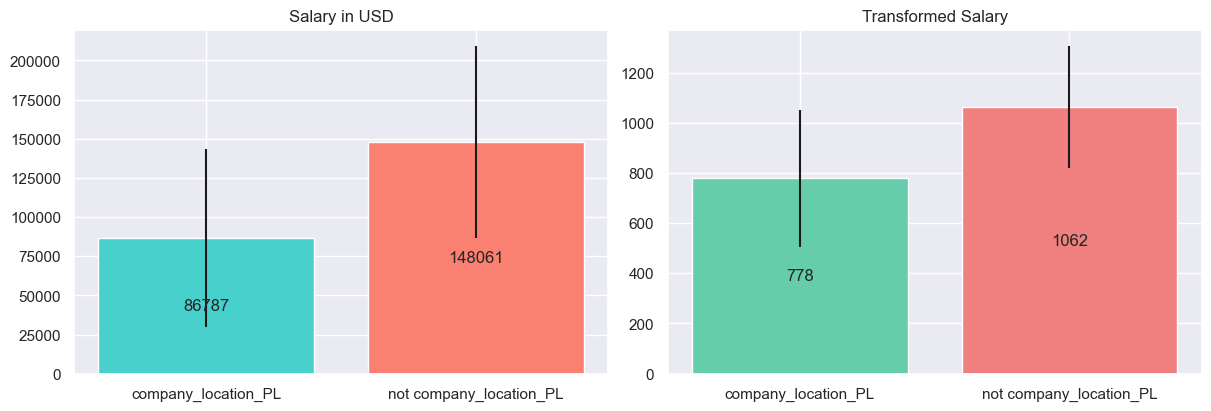

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PT                                                    
0                          148188  61069  14360               1063  243
1                           51115  22826     27                599  146

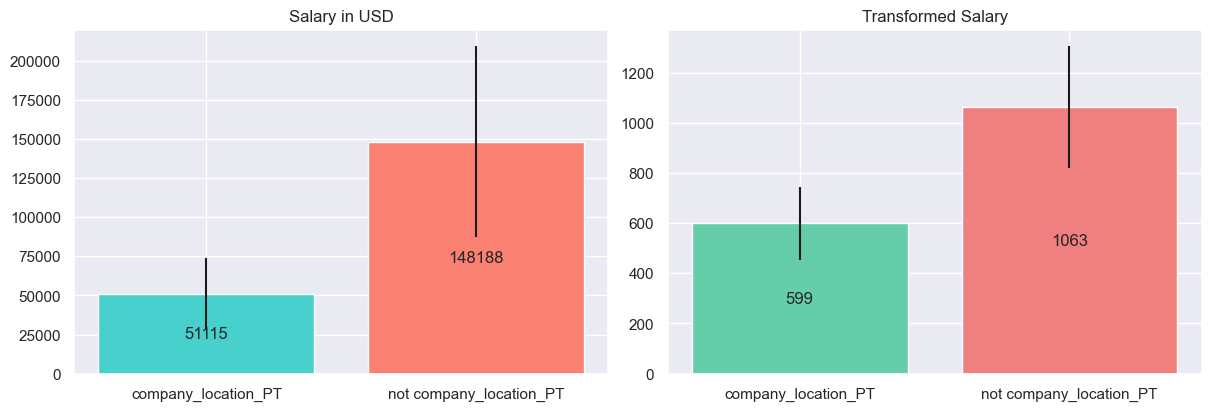

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_SI                                                    
0                          148044  61145  14381               1062  244
1                           56186  28245      6                630  169

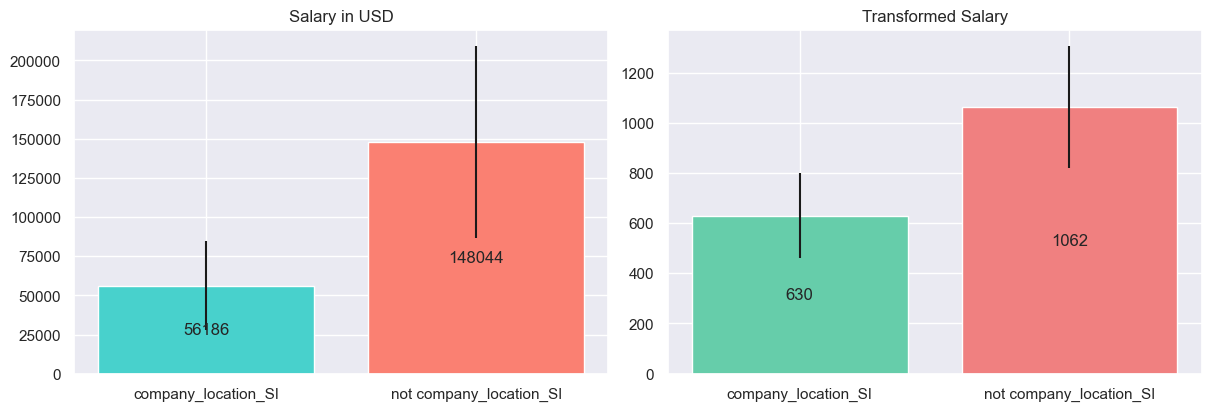

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_UA                                                    
0                          148035  61149  14377               1062  244
1                          105600  70596     10                866  301

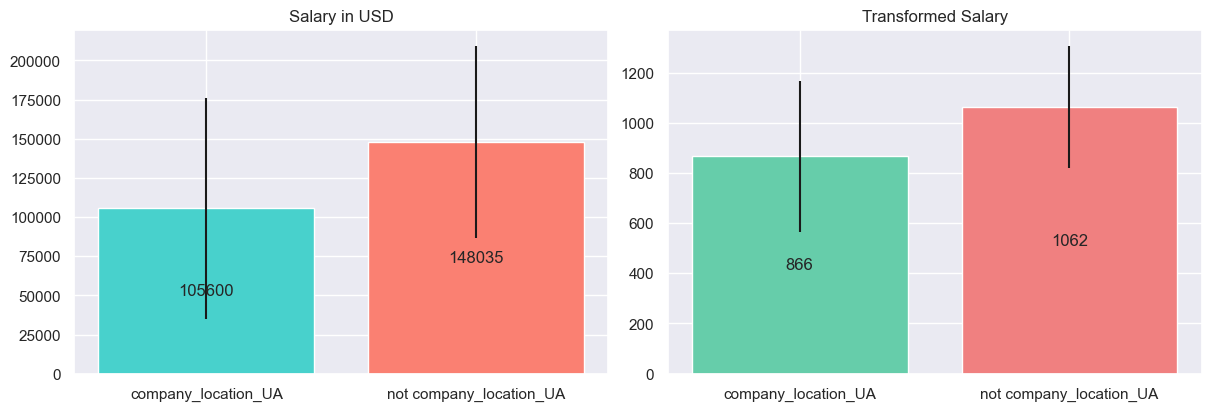

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_US                                                    
0                           97894  59263   1683                834  267
1                          154644  58265  12704               1092  224

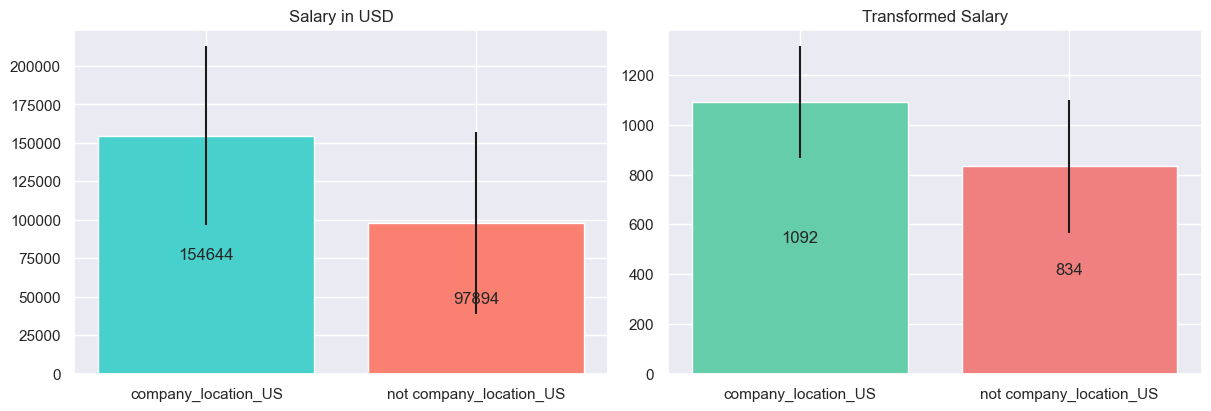

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ZA                                                    
0                          148094  61124  14373               1062  244
1                           57308  24142     14                641  136

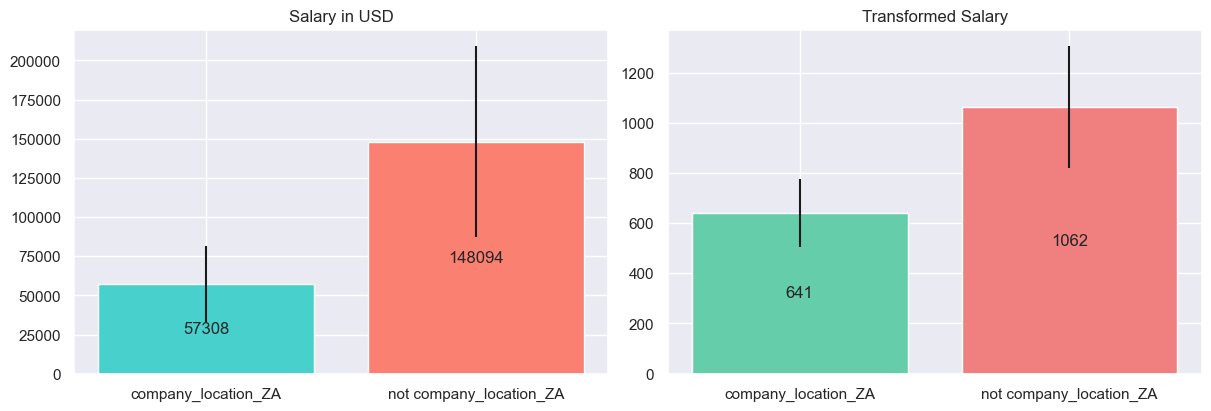

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_L                                                    
0                     148411  60582  13475               1064  240
1                     142018  68945    912               1027  291

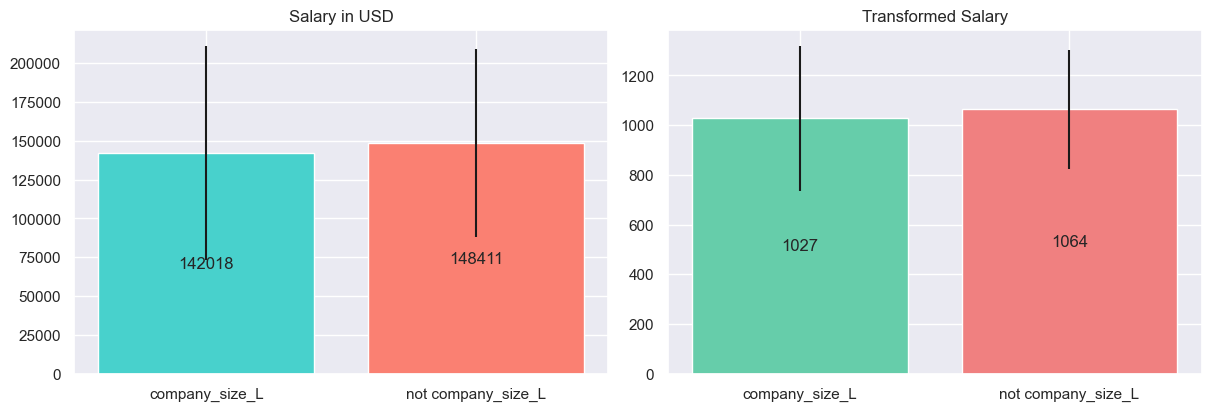

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_M                                                    
0                     135688  69440   1039                998  297
1                     148964  60370  13348               1067  238

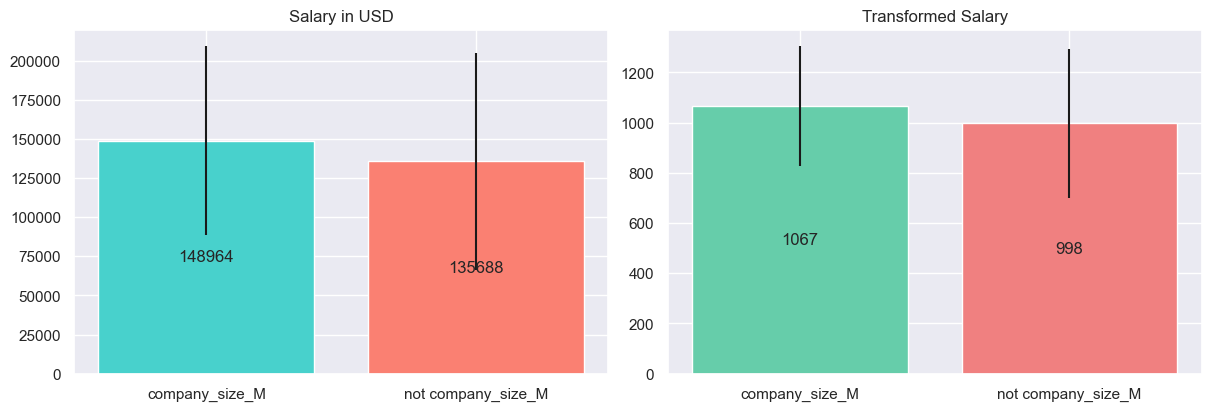

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_S                                                    
0                     148520  60975  14260               1064  242
1                      90231  54618    127                797  262

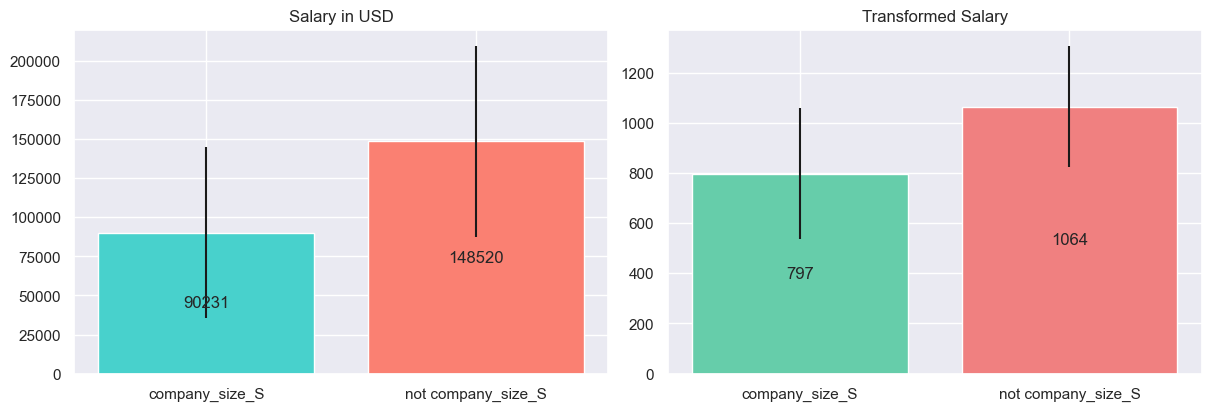

In [38]:
diffs = {}

aux = new_X.groupby('work_year')[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
display(aux)
for year in aux.index:
    diffs['work_year_' + str(year)] = aux.loc[year,('transformed_salary', 'mean')] - avg
    diffs['work_year_' + str(year)] = (diffs['work_year_' + str(year)], 
                                       abs(diffs['work_year_' + str(year)])/aux.loc[year,('transformed_salary', 'std')],
                                       aux.loc[year,('salary_in_usd', 'count')])

for var in new_X.columns[1:-2]:
    aux = new_X.groupby(var)[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
    display(aux)
    diffs[var] = aux.loc[1,('transformed_salary', 'mean')] - avg
    diffs[var] = (diffs[var], 
                  abs(diffs[var])/aux.loc[1,('transformed_salary', 'std')], 
                  aux.loc[1,('salary_in_usd', 'count')])
    plotting(var)

In [40]:
diffs = pd.DataFrame(diffs, index=['differences', 'abs_z_score', 'counts']).transpose()
diffs.sort_values('abs_z_score', ascending=False)

differences  abs_z_score   counts
job_name_Insight         -480.191452     9.799826     12.0
employee_residence_EE    -498.191452     8.303191     11.0
company_location_EE      -498.191452     8.303191     11.0
salary_currency_PLN      -557.191452     5.991306      6.0
salary_currency_INR      -586.191452     4.342159     49.0
company_location_AT      -348.191452     4.145136     10.0
employee_residence_AT    -348.191452     4.096370     10.0
job_name_Associate       -354.191452     4.071166      5.0
company_location_IT      -469.191452     3.753532     14.0
employee_residence_LV    -434.191452     3.618262     14.0
company_location_LV      -434.191452     3.618262     14.0
company_location_AR      -343.191452     3.501954      7.0
employee_residence_AR    -387.191452     3.488211     11.0
employee_residence_GR    -458.191452     3.226700     16.0
company_location_GR      -454.191452     3.221216     14.0
company_location_PT      -463.191452     3.172544     27.0
employee_residence_ZA    -421.191452     3.096996     14.0
company_location_ZA      -421.191452     3.096996     14.0
employee_residence_PH    -461.191452     3.034154      7.0
employment_type_FL       -482.191452     2.870187      7.0
company_location_IN      -547.191452     2.695524     57.0
employee_residence_PT    -449.191452     2.689769     30.0
company_location_BR      -387.191452     2.616158     17.0
company_location_ES      -430.191452     2.575997    126.0
employee_residence_SI    -432.191452     2.557346      6.0
company_location_SI      -432.191452     2.557346      6.0
employee_residence_IT    -445.191452     2.529497     21.0
company_location_PH      -436.191452     2.464358      5.0
employee_residence_ES    -422.191452     2.371862    128.0
salary_currency_EUR      -386.191452     2.298759    395.0
employee_residence_IN    -511.191452     2.261909     66.0
employee_residence_LT    -358.191452     2.252776     16.0
company_location_LT      -358.191452     2.252776     16.0
employee_residence_NL    -311.191452     2.060871     28.0
salary_currency_AUD      -294.191452     2.042996     11.0
employee_residence_BR    -352.191452     1.967550     19.0
company_location_NL      -316.191452     1.939825     28.0
employee_residence_NG    -480.191452     1.920766     12.0
employee_residence_CO    -300.191452     1.853034     16.0
company_location_CO      -300.191452     1.853034     16.0
salary_currency_GBP      -311.191452     1.819833    547.0
employment_type_PT       -426.191452     1.718514     18.0
company_location_NG      -430.191452     1.641952      9.0
job_name_Quality         -273.191452     1.400982     29.0
remote_ratio_Hybrid      -309.191452     1.212515    196.0
employee_residence_PL    -326.191452     1.186151     14.0
work_abroad              -316.191452     1.166758     63.0
employee_residence_IE    -170.191452     1.157765     12.0
company_location_IE      -170.191452     1.157765     12.0
job_name_Specialist      -222.191452     1.157247    137.0
company_location_FR      -288.191452     1.148173     59.0
job_name_Big             -330.191452     1.104319     12.0
experience_level_EN      -242.191452     1.081212   1078.0
employee_residence_FR    -284.191452     1.080576     64.0
company_location_GB      -244.191452     1.080493    638.0
employee_residence_GB    -243.191452     1.076068    633.0
company_location_PL      -284.191452     1.033423     13.0
company_size_S           -265.191452     1.012181    127.0
job_name_Director         211.808548     1.003832     39.0
company_location_DE      -236.191452     0.964047     92.0
company_location_MX      -301.191452     0.907203     13.0
employee_residence_DE    -219.191452     0.902022     88.0
job_name_Strategist      -162.191452     0.891162     28.0
job_name_Analyst         -170.191452     0.877276   2586.0
employee_residence_MX    -294.191452     0.850264     12.0
work_year_2020           -234.191452     0.845457     61.0
job_name_Integration     -156.191452     0.780957     45.0
job_name_Deve

In [41]:
diffs.sort_values('differences', ascending=False)

differences  abs_z_score   counts
job_name_Director         211.808548     1.003832     39.0
job_name_Head             207.808548     0.755667     62.0
experience_level_EX       158.808548     0.690472    418.0
job_name_Applied          142.808548     0.673625    402.0
job_name_Machine          138.808548     0.600903   1901.0
job_name_Prompt           118.808548     0.528038     14.0
job_name_Deep             117.808548     0.316690     13.0
job_name_Infrastructure    97.808548     0.477115     47.0
job_name_Decision          87.808548     0.737887     38.0
job_name_Software          80.808548     0.276742     29.0
job_name_Research          76.808548     0.292048    838.0
job_name_Robotics          70.808548     0.310564     14.0
job_name_Architect         68.808548     0.329228    386.0
job_name_Vision            67.808548     0.209286     32.0
experience_level_SE        57.808548     0.261577   9480.0
job_name_Scientist         50.808548     0.216207   4493.0
job_name_Engineer          44.808548     0.189066   6049.0
job_name_AI                34.808548     0.118396    160.0
company_location_NZ        34.808548     0.263701      5.0
employee_residence_NZ      34.808548     0.263701      5.0
job_name_Cloud             30.808548     0.161301     19.0
job_name_Principal         30.808548     0.133950     17.0
employee_residence_US      30.808548     0.138155  12677.0
company_location_US        29.808548     0.133074  12704.0
salary_currency_USD        26.808548     0.118622  13324.0
work_year_2023             18.808548     0.078697   8384.0
job_name_Product           14.808548     0.071539     37.0
job_name_Analytics         11.808548     0.059639    475.0
remote_ratio_On_Site       10.808548     0.044297   9594.0
company_size_M              4.808548     0.020204  13348.0
employment_type_FT          0.808548     0.003327  14341.0
job_name_Database          -3.191452     0.020724     13.0
work_year_2024             -7.191452     0.029234   4158.0
remote_ratio_Remote       -11.191452     0.047827   4597.0
employee_residence_CA     -11.191452     0.048658    377.0
company_location_CA       -13.191452     0.056374    379.0
job_name_Lead             -27.191452     0.095745     92.0
company_size_L            -35.191452     0.120933    912.0
job_name_Ops              -39.191452     0.166772     23.0
company_location_EG       -41.191452     0.135054     13.0
job_name_Manager          -42.191452     0.178023    440.0
job_name_Practitioner     -48.191452     0.253639     16.0
employee_residence_CH     -53.191452     0.173262      7.0
work_year_2022            -53.191452     0.226347   1607.0
salary_currency_CHF       -53.191452     0.173262      7.0
employee_residence_AU     -60.191452     0.206135     48.0
employee_residence_EG     -62.191452     0.205252     14.0
company_location_AU       -65.191452     0.222496     50.0
job_name_Modeler          -67.191452     0.392932     48.0
job_name_NLP              -94.191452     0.286296     15.0
job_name_Intelligence     -97.191452     0.445832    640.0
job_name_Business        -102.191452     0.462405    655.0
experience_level_MI      -104.191452     0.458993   3411.0
job_name_Visualization   -110.191452     0.589259     18.0
job_name_ETL             -119.191452     0.482556     31.0
company_location_CH      -127.191452     0.359298      8.0
job_name_Operations      -129.191452     0.554470     78.0
job_name_Developer       -155.191452     0.779857    215.0
job_name_Integration     -156.191452     0.780957     45.0
job_name_Strategist      -162.191452     0.891162     28.0
salary_currency_CAD      -167.191452     0.753115     48.0
employee_residence_IE    -170.191452     1.157765     12.0
company_location_IE      -170.191452     1.157765     12.0
job_name_Analyst         -170.191452     0.877276   2586.0
job_name_Finance         -181.191452     0.484469      7.0
company_location_UA      -196.191452     0.651799     10.0
work_year_2021           -202.191452     0.722112    177.0
employment_ty